In [1357]:
# 데이터 분석을 위한 모듈 IMPORT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# JOIN

In [1358]:
# 2016 ~ 2020 팀투수, 팀타자, 경기, 개인타자, 선수 dataset 불러오기

T_P_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2016.csv')
T_H_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2016.csv')
G_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2016.csv', encoding='CP949')
PH_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2016.csv')
P_P_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2016.csv')
P_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2016.csv' , encoding = 'CP949')

T_P_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2017.csv')
T_H_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2017.csv')
G_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2017.csv', encoding='CP949')
PH_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2017.csv')
P_P_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2017.csv')
P_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2017.csv' , encoding = 'CP949')

T_P_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2018.csv')
T_H_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2018.csv')
G_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2018.csv', encoding='CP949')
PH_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2018.csv')
P_P_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2018.csv')
P_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2018.csv' , encoding = 'CP949')

T_P_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2019.csv')
T_H_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2019.csv')
G_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2019.csv', encoding='CP949')
PH_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2019.csv')
P_P_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2019.csv')
P_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2019.csv' , encoding = 'CP949')

T_P_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/팀투수_2020.csv')
T_H_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/팀타자_2020.csv')
G_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/경기_2020.csv', encoding='CP949')
PH_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/개인타자_2020.csv', encoding='CP949')
P_P_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/개인투수_2020.csv', encoding='CP949')

In [1359]:
# 팀투수, 팀타자, 경기 JOIN하는 함수 만들기

def T_PHG_JOIN(T_P, T_H, G):
    
    T_P = T_P.rename({'PA': 'P_PA', 'AB': 'P_AB', 'HIT': 'P_HIT','H2': 'P_H2', 'H3': 'P_H3', 'HR': 'P_HR', 'SB': 'P_SB', 'CS': 'P_CS', 
                      'SH': 'P_SH', 'SF': 'P_SF', 'BB': 'P_BB', 'IB': 'P_IB', 'HP': 'P_HP', 'KK': 'P_KK', 'GD': 'P_GD', 'ERR': 'P_ERR'},
                     axis='columns')

    T_H = T_H.rename({'ERR': 'H_ERR'}, axis='columns')
    
    T_PH = pd.merge(T_P, T_H, on=['G_ID', 'T_ID', 'GDAY_DS', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')
    T = pd.merge(T_PH, G, on=['G_ID', 'GDAY_DS', 'HEADER_NO'], how='left')
    T.drop(columns=['VISIT_KEY', 'HOME_KEY', 'P_WHIP_RT', 'P2_WHIP_RT', 'CB_WHIP_RT', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN'], inplace=True)
    
    return T

In [1360]:
# 2016 ~ 2020 시즌 별 팀투수, 팀타자, 경기 JOIN하기

T_16 = T_PHG_JOIN(T_P_16, T_H_16, G_16)
T_17 = T_PHG_JOIN(T_P_17, T_H_17, G_17)
T_18 = T_PHG_JOIN(T_P_18, T_H_18, G_18)
T_19 = T_PHG_JOIN(T_P_19, T_H_19, G_19)
T_20 = T_PHG_JOIN(T_P_20, T_H_20, G_20)

# 2016 ~ 2020 시즌 합치기

TEAM = pd.concat([T_16, T_17, T_18, T_19, T_20])
TEAM = TEAM.reset_index(drop=True)

In [1361]:
# 타자 기준 이닝 수 추가하기

INN2 = TEAM[['G_ID', 'T_ID', 'VS_T_ID', 'INN2']]

INN2['MY_ID'] = INN2['T_ID']
INN2['T_ID'] = INN2['VS_T_ID']
INN2['VS_T_ID'] = INN2['MY_ID']
INN2 = INN2.rename({'INN2': 'H_INN2'}, axis='columns')
INN2.drop(['MY_ID'], axis=1, inplace=True)

TEAM = pd.merge(TEAM, INN2, on=['G_ID', 'T_ID', 'VS_T_ID'], how='inner')

# 강우콜드 이상치 처리

In [1362]:
# 점수차를 알 수 있는 'RUN_R' 변수 생성
# 9회 or 연장에서의 콜드경기를 찾기 위해 변수 WLS, TB_SC, INN2를 합친 WL_TB_INN2 생성

TEAM['RUN_R'] = TEAM['RUN'] - TEAM['R']
TEAM['INN_S'] = TEAM['INN2'].astype('str')
TEAM['WL_TB_INN2'] = TEAM['WLS'] + TEAM['TB_SC'] + TEAM['INN_S']

TEAM.drop(['INN_S'], axis=1, inplace=True)

#### 통상적인 콜드게임(INN2<=23인 경기) 추출

In [1363]:
RAIN = TEAM[(TEAM['INN2'] <= 23)|(TEAM['H_INN2'] <= 23)]

In [1364]:
RAIN

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
36,20160406SKLT0,20160406,LT,SK,0,B,0.0,W,0.0,15.0,74.0,21.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,31.0,27.0,11.0,11.0,14.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,5.0,수,사직,15.0,10.0,WB15.0
37,20160406SKLT0,20160406,SK,LT,0,T,0.0,L,0.0,15.0,112.0,31.0,27.0,14.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,11.0,21.0,16.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,1.0,1.0,5.0,수,사직,15.0,-10.0,LT15.0
2206,20170702HTLG0,20170702,LG,HT,0,B,0.0,L,0.0,20.0,138.0,41.0,34.0,14.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,4.0,1.0,2.0,7.0,0.0,2.0,0.0,0.0,13.0,11.0,26.0,22.0,4.0,4.0,8.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,4.0,1.0,1.0,4.0,일,잠실,18.0,-9.0,LB20.0
2207,20170702HTLG0,20170702,HT,LG,0,T,0.0,W,0.0,18.0,109.0,26.0,22.0,8.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,4.0,4.0,41.0,34.0,12.0,13.0,14.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,4.0,1.0,2.0,7.0,0.0,0.0,8.0,일,잠실,20.0,9.0,WT18.0
2210,20170702SSSK0,20170702,SK,SS,0,B,0.0,W,1.0,15.0,114.0,29.0,24.0,10.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,5.0,5.0,25.0,25.0,6.0,6.0,12.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,일,문학,13.0,1.0,WB15.0
2211,20170702SSSK0,20170702,SS,SK,0,T,0.0,L,0.0,13.0,76.0,25.0,25.0,12.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,6.0,29.0,24.0,5.0,5.0,10.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,4.0,1.0,0.0,9.0,일,문학,15.0,-1.0,LT13.0
2212,20170702WOKT0,20170702,KT,WO,0,B,1.0,L,0.0,18.0,116.0,30.0,27.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,5.0,5.0,19.0,17.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,3.0,일,수원,15.0,-4.0,LB18.0
2213,20170702WOKT0,20170702,WO,KT,0,T,1.0,W,0.0,15.0,75.0,19.0,17.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,27.0,5.0,5.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,7.0,일,수원,18.0,4.0,WT15.0
2252,20170709HHLG0,20170709,LG,HH,0,B,0.0,W,0.0,18.0,92.0,23.0,23.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,27.0,23.0,3.0,3.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0,0.0,0.0,6.0,일,잠실,18.0,1.0,WB18.0
2253,20170709HHLG0,20170709,HH,LG,0,T,0.0,L,0.0,18.0,102.0,27.0,23.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,3.0,3.0,23.0,23.0,1.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,일,잠실,18.0,-1.0,LT18.0


#### 9회나 연장에서 강우콜드 & 무승부 경기에서 강우콜드 추출

In [1365]:
# WT24 WT25 WT26: 9회말 강우콜드, WT28 WT29: 10회말 강우콜드, 
# WT31 WT32: 11회말 강우콜드, WT34 WT35: 12회말 강우콜드

# WB24 WB25 WB26: 9회초 강우콜드, WB28 WB29: 10회초 강우콜드, 
# WB31 WB32: 11회초 강우콜드, WB34 WB35: 12회초 강우콜드

# 이닝 수가 36이 아닌데 무승부인 경우는 강우콜드

In [1366]:
RAIN2 = TEAM[TEAM['WL_TB_INN2'].isin(['WT24', 'WT25', 'WT26', 'WB24', 'WB25', 'WB26', 'WT28', 'WT29', 'WB28', 'WB29', 'WT31', 'WT32', 
                                      'WB31', 'WB32', 'WT34', 'WT35', 'WB34', 'WB35', 'DB24', 'DB25', 'DB26', 'DB27', 'DB28', 'DB29', 
                                      'DB30', 'DB31', 'DB32', 'DB33', 'DB34', 'DB35'])]

# 찾은 경기 중 RAIN1과 겹치지 않는 경기는 9경기
# '20170625HHSS0', '20180626SSHH0', '20180809SKNC0', '20200703SKLT0', '20200727SKHH0',
# '20200805SSOB0', '20200811HHWO0', '20200829OBLG0', '20200909HHSS1'

# 찾은 경기 중 RAIN1과 겹치지 않는 경기이고 INN2, H_INN2만 바꿔도 되는 경기는 5경기
# '20170625HHSS0', '20180626SSHH0', '20180809SKNC0', '20200703SKLT0', 
# '20200811HHWO0', '20200727SKHH0', '20200805SSOB0', '20200829OBLG0', '20200909HHSS1'

In [1367]:
# INN2, H_INN2 대체

TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='SS'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='SS'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='HH'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='HH'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20180626SSHH0')&(TEAM['T_ID']=='HH'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20180626SSHH0')&(TEAM['T_ID']=='SS'), 'INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20180809SKNC0')&(TEAM['T_ID']=='NC'), 'INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20180809SKNC0')&(TEAM['T_ID']=='SK'), 'H_INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20200703SKLT0')&(TEAM['T_ID']=='LT'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200703SKLT0')&(TEAM['T_ID']=='SK'), 'INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20200811HHWO0')&(TEAM['T_ID']=='WO'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200811HHWO0')&(TEAM['T_ID']=='HH'), 'INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='SK'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='SK'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='HH'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='HH'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='SS'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='SS'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='OB'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='OB'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='LG'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='LG'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='OB'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='OB'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='LG'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='LG'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='OB'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='OB'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='LG'), 'INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='LG'), 'H_INN2'] = 24.0
TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='SS'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='SS'), 'INN2'] = 24.0

#### 이상치 대체

In [1368]:
# 강우콜드 경기 데이터 확인 

RAIN[['G_ID', 'T_ID', 'VS_T_ID', 'WLS', 'RUN', 'TB_SC', 'INN2', 'RUN_R']]

,G_ID,T_ID,VS_T_ID,WLS,RUN,TB_SC,INN2,RUN_R
36,20160406SKLT0,LT,SK,W,11.0,B,15.0,10.0
37,20160406SKLT0,SK,LT,L,1.0,T,15.0,-10.0
2206,20170702HTLG0,LG,HT,L,4.0,B,20.0,-9.0
2207,20170702HTLG0,HT,LG,W,13.0,T,18.0,9.0
2210,20170702SSSK0,SK,SS,W,6.0,B,15.0,1.0
2211,20170702SSSK0,SS,SK,L,5.0,T,13.0,-1.0
2212,20170702WOKT0,KT,WO,L,1.0,B,18.0,-4.0
2213,20170702WOKT0,WO,KT,W,5.0,T,15.0,4.0
2252,20170709HHLG0,LG,HH,W,3.0,B,18.0,1.0
2253,20170709HHLG0,HH,LG,L,2.0,T,18.0,-1.0


In [1369]:
# 이상치 대체 데이터 채울 빈 데이터프레임 만들기

OUT = TEAM.iloc[0:1]
OUT.drop([OUT.index[0]], inplace=True)

In [1370]:
# 이상치 대체하는 함수 만들기

# GDAY: 대체할 경기의 하한 날짜, GDAY2: 상한 날짜, RUN_R: 하한 점수차, 
# RUN_R2: 상한 점수차, RUN: 하한 득점, RUN2: 상한 득점

def OUTLIER(G_ID, T_ID, VS_T_ID, GDAY, GDAY2, RUN_R, RUN_R2, RUN, RUN2):
    
    global OUT, TEAM
    
    TEAM_OUTLIER = TEAM[(TEAM['T_ID'] == T_ID) & (TEAM['VS_T_ID'] == VS_T_ID)]
    TEAM_OUTLIER = TEAM_OUTLIER[(TEAM_OUTLIER['RUN_R']>=RUN_R) & (TEAM_OUTLIER['RUN_R']<=RUN_R2) & (TEAM_OUTLIER['GDAY_DS']>GDAY) & (TEAM_OUTLIER['GDAY_DS']<GDAY2) & (TEAM_OUTLIER['RUN']>=RUN) & (TEAM_OUTLIER['RUN']<=RUN2)]
    OUTLIER1 = TEAM_OUTLIER[(TEAM_OUTLIER['G_ID']==G_ID) & (TEAM_OUTLIER['T_ID']==T_ID)]
    OUTLIER1_index = list(OUTLIER1.index)
    TEAM_OUTLIER.loc[OUTLIER1_index] = np.nan
    TEAM_OUTLIER = TEAM_OUTLIER.fillna(TEAM_OUTLIER.mean())
    TEAM_OUTLIER = TEAM_OUTLIER.loc[OUTLIER1_index]
    
    OUT_DATA = TEAM[(TEAM['G_ID']==G_ID)&(TEAM['T_ID']==T_ID)]
    TEAM_OUTLIER['G_ID'] = OUT_DATA['G_ID']
    TEAM_OUTLIER['T_ID'] = OUT_DATA['T_ID']
    TEAM_OUTLIER['VS_T_ID'] = OUT_DATA['VS_T_ID']
    TEAM_OUTLIER['TB_SC'] = OUT_DATA['TB_SC']
    TEAM_OUTLIER['WLS'] = OUT_DATA['WLS']
    TEAM_OUTLIER['GWEEK'] = OUT_DATA['GWEEK']
    TEAM_OUTLIER['STADIUM'] = OUT_DATA['STADIUM']
    TEAM_OUTLIER['GDAY_DS'] = OUT_DATA['GDAY_DS']
    TEAM_OUTLIER['HEADER_NO'] = OUT_DATA['HEADER_NO']
    
    OUT = pd.concat([OUT, TEAM_OUTLIER])
    TEAM.drop(TEAM.loc[(TEAM['G_ID']==G_ID)&(TEAM['T_ID']==T_ID)].index, inplace=True)
    
    return OUT

In [1371]:
# 20160406SKLT0 LT vs SK 11:1 10점차 경기 -> LT vs SK 10:3 7점차 경기로 대체
OUTLIER('20160406SKLT0', 'LT', 'SK', 20160000, 20169999, 7, 13, 10, 11)
OUTLIER('20160406SKLT0', 'SK', 'LT', 20160000, 20169999, -13, -7, 1, 3)

# 20170702HTLG0 LG vs HT 4:13 9점차 경기 -> LG vs HT  4:10 6점차 경기로 대체
OUTLIER('20170702HTLG0', 'LG', 'HT', 20170000, 20179999, -11, -6, 4, 4 )
OUTLIER('20170702HTLG0', 'HT', 'LG', 20170000, 20179999, 6, 11, 10, 13)

# 20170702SSSK0 SK vs SS 6:5 1점차 경기 -> SK vs SS  5:4 1점차 경기로 대체
OUTLIER('20170702SSSK0', 'SK', 'SS', 20170000, 20179999, 1, 1, 5, 6)
OUTLIER('20170702SSSK0', 'SS', 'SK', 20170000, 20179999, -1, -1, 4, 5)

# 20170702WOKT0 KT vs WO 1:5 4점차 경기 -> KT vs WO  0:2 2점차 경기로 대체
OUTLIER('20170702WOKT0', 'KT', 'WO', 20170000, 20179999, -4, -2, 0, 2)
OUTLIER('20170702WOKT0', 'WO', 'KT', 20170000, 20179999, 2, 4, 0, 5)

# 20170709HHLG0 LG vs HH 3:2 1점차 경기 -> LG vs HH  4:3 1점차 경기로 대체
OUTLIER('20170709HHLG0', 'LG', 'HH', 20170000, 20179999, 1, 1, 3, 4)
OUTLIER('20170709HHLG0', 'HH', 'LG', 20170000, 20179999, -1, -1, 2, 3)

# 20170820OBKT0 KT vs OB 2:1 1점차 경기 -> KT vs OB  3:2 1점차 경기로 대체
OUTLIER('20170820OBKT0', 'KT', 'OB', 20170000, 20179999, 1, 1, 2, 3)
OUTLIER('20170820OBKT0', 'OB', 'KT', 20170000, 20179999, -1, -1, 1, 2)

# 20180619SKSS0 SK vs SS 6:6 0점차 경기 -> SK vs SS 4:3 1점차 경기로 대체
OUTLIER('20180619SKSS0', 'SK', 'SS', 20180000, 20189999, 0, 1, 4, 6)
OUTLIER('20180619SKSS0', 'SS', 'SK', 20180000, 20189999, -1, 0, 3, 6)

# 20180630NCKT0 KT vs NC 1:0 1점차 경기 -> KT vs NC  3:2 1점차 경기로 대체
OUTLIER('20180630NCKT0', 'KT', 'NC', 20180000, 20189999, 1, 1, 1, 3)
OUTLIER('20180630NCKT0', 'NC', 'KT', 20180000, 20189999, -1, -1, 0, 2)

# 20190407HHLT0 LT vs HH 1:16 15점차 경기 -> LT vs HH  1:5 4점차 경기로 대체
OUTLIER('20190407HHLT0', 'LT', 'HH', 20190000, 20199999, -15, -4, 1, 1)
OUTLIER('20190407HHLT0', 'HH', 'LT', 20190000, 20199999, 4, 15, 5, 16)

# 20200610HTKT0 KT vs HT 0:10 10점차 경기 -> KT vs HT  4:10 6점차 경기로 대체
OUTLIER('20200610HTKT0', 'KT', 'HT', 20200000, 20209999, -10, -6, 0, 4)
OUTLIER('20200610HTKT0', 'HT', 'KT', 20200000, 20209999, 6, 10, 10, 10)

# 20200808LTOB0 OB vs LT 1:1 0점차 경기 -> OB vs LT 4:5 -1점차 경기로 대체
# WLS랑 INN2, H_INN2 
OUTLIER('20200808LTOB0', 'OB', 'LT', 20200000, 20209999, -1, 0, 1, 4)
OUTLIER('20200808LTOB0', 'LT', 'OB', 20200000, 20209999, 0, 1, 1, 5)

# 20200808SSSK0 SK vs SS 4:2 2점차 경기 -> HH vs SK 10:3 7점차 경기로 대체
OUTLIER('20200808SSSK0', 'SK', 'SS', 20200000, 20209999, 2, 2, 4, 6)
OUTLIER('20200808SSSK0', 'SS', 'SK', 20200000, 20209999, -2, -2, 2, 4)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
36,20160406SKLT0,20160406,LT,SK,0,B,0.0,W,0.0,27.0,138.000000,36.000000,33.000000,7.000000,1.000000,0.000000,2.000000,0.0,1.000000,0.0,0.000000,3.000000,0.000000,0.000000,7.0,1.000000,0.000000,0.0,0.0,3.0,3.000000,41.000000,34.000000,9.000000,10.0,11.000000,7.000000,0.000000,1.000000,1.0,0.0,0.000000,0.000000,5.000000,0.0,2.0,5.0,1.000000,1.000000,7.000000,수,사직,24.0,7.0,NaN
37,20160406SKLT0,20160406,SK,LT,0,T,0.0,L,0.0,24.0,150.000000,41.000000,34.000000,11.000000,7.000000,0.000000,1.000000,1.0,0.000000,0.0,0.000000,5.000000,0.000000,2.000000,5.0,1.000000,1.000000,0.0,0.0,10.0,10.000000,36.000000,33.000000,3.000000,3.0,7.000000,1.000000,0.000000,2.000000,0.0,1.0,0.000000,0.000000,3.000000,0.0,0.0,7.0,1.000000,0.000000,6.000000,수,사직,27.0,-7.0,NaN
2206,20170702HTLG0,20170702,LG,HT,0,B,0.0,L,0.0,27.0,152.000000,44.000000,39.000000,13.000000,3.000000,0.000000,1.000000,0.0,0.000000,2.0,1.000000,2.000000,1.000000,0.000000,9.0,1.000000,0.000000,0.0,0.0,10.0,7.000000,40.000000,37.000000,3.000000,4.0,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3.000000,0.0,0.0,6.0,0.000000,3.000000,9.000000,일,잠실,27.0,-6.0,NaN
2207,20170702HTLG0,20170702,HT,LG,0,T,0.0,W,1.0,27.0,150.000000,40.000000,37.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,6.0,0.000000,0.000000,1.0,0.0,4.0,2.000000,44.000000,39.000000,10.000000,10.0,13.000000,3.000000,0.000000,1.000000,0.0,0.0,2.000000,1.000000,2.000000,1.0,0.0,9.0,1.000000,2.000000,7.000000,일,잠실,27.0,6.0,NaN
2210,20170702SSSK0,20170702,SK,SS,0,B,0.0,W,2.0,27.0,157.000000,39.000000,36.000000,11.000000,1.000000,1.000000,2.000000,0.0,0.000000,1.0,0.000000,2.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.0,0.0,4.0,4.000000,38.000000,33.000000,3.000000,5.0,11.000000,3.000000,0.000000,1.000000,1.0,0.0,1.000000,1.000000,2.000000,1.0,1.0,5.0,2.000000,0.000000,8.000000,일,문학,25.0,1.0,NaN
2211,20170702SSSK0,20170702,SS,SK,0,T,0.0,L,0.0,25.0,133.000000,38.000000,33.000000,11.000000,3.000000,0.000000,1.000000,1.0,0.000000,1.0,1.000000,2.000000,1.000000,1.000000,5.0,2.000000,0.000000,0.0,0.0,5.0,4.000000,39.000000,36.000000,4.000000,4.0,11.000000,1.000000,1.000000,2.000000,0.0,0.0,1.000000,0.000000,2.000000,0.0,0.0,3.0,0.000000,1.000000,8.000000,일,문학,27.0,-1.0,NaN
2212,20170702WOKT0,20170702,KT,WO,0,B,0.0,L,0.0,24.0,136.000000,37.000000,30.000000,7.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,5.000000,0.000000,1.000000,3.0,1.000000,0.000000,0.0,0.0,2.0,1.000000,36.000000,35.000000,0.000000,0.0,8.000000,0.000000,0.000000,0.000000,2.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,10.0,0.000000,1.000000,9.000000,일,수원,27.0,-2.0,NaN
2213,20170702WOKT0,20170702,WO,KT,0,T,0.0,W,1.0,27.0,141.333333,35.666667,33.333333,7.333333,1.666667,0.333333,0.666667,1.0,0.333333,0.0,0.333333,1.666667,0.333333,0.333333,8.0,0.666667,0.333333,0.0,0.0,2.0,1.666667,38.333333,32.666667,3.666667,4.0,9.333333,1.333333,0.333333,0.333333,1.0,0.0,0.666667,0.666667,3.333333,0.0,1.0,5.0,1.333333,0.333333,9.333333,일,수원,25.0,2.0,NaN
2252,20170709HHLG0,20170709,LG,HH,0,B,0.0,W,3.0,27.0,152.000000,37.000000,34.000000,7.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,10.0,0.000000,2.000000,0.0,0.0,3.0,3.000000,35.000000,32.000000,3.000000,4.0,10.000000,2.000000,0.000000,0.000000,0.0,2.0,0.000000,1.000000,2.000000,0.0,0.0,6.0,1.000000,1.000000,4.000000,일,잠실,27.0,1.0,NaN
2253,20170709HHLG0,20170709,HH,LG,0,T,0.0,L,0.0,27.0,149.000000,35.000000,32.000000,10.000000,2.000000,0.000000,0.000000,0.0,2.000000,0.0,1.000000,2.000000,0.000000,0.000000,6.0,1.000000,1.000000,0.0,0.0,4.0,3.000000,37.000000,34.000000,2.000000,3.0,7.000000,1.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,3.000000,0.0,0.0,

In [1372]:
# 이닝수 정상으로 변환

OUT.loc[(OUT['G_ID']=='20170702SSSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170702SSSK0')&(OUT['T_ID']=='SS'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='KT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='WO'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20170709HHLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170709HHLG0')&(OUT['T_ID']=='HH'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 36.0
OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='HH'), 'INN2'] = 36.0
OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='SK'), 'R'] = 4.0
OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='HH'), 'RUN'] = 4.0

OUT.loc[(OUT['G_ID']=='20180630NCKT0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180630NCKT0')&(OUT['T_ID']=='NC'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190407HHLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190407HHLT0')&(OUT['T_ID']=='HH'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200610HTKT0')&(OUT['T_ID']=='KT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200610HTKT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

#### 데이터셋 합치기

In [1373]:
TEAM = pd.concat([TEAM, OUT])
TEAM.sort_index(inplace=True)

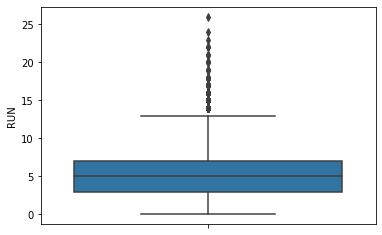

In [1374]:
sns.boxplot(y='RUN', data=TEAM)
plt.show()

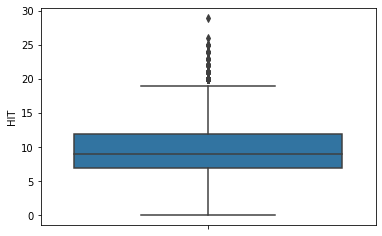

In [1375]:
sns.boxplot(y='HIT', data=TEAM)
plt.show()

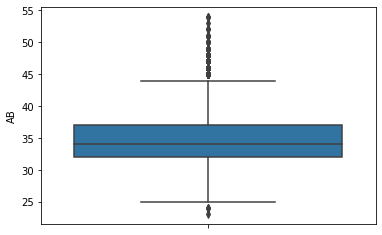

In [1376]:
sns.boxplot(y='AB', data=TEAM)
plt.show()

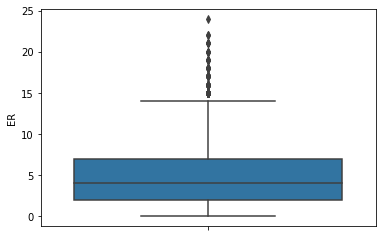

In [1377]:
sns.boxplot(y='ER', data=TEAM)
plt.show()

In [1378]:
pd.set_option('display.max_columns', 200)


# 타겟 변수 이상치 처리

In [1379]:
# 타겟 변수 이상치 데이터 담을 빈 데이터프레임 만들기

OUT.reset_index(drop=True, inplace=True)
OUT.drop(OUT.index[0:30], inplace=True)

In [1380]:
TEAM_RUN = TEAM[(TEAM['RUN'] >15)|(TEAM['R']>15)]
TEAM_RUN

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,155.0,39.0,37.0,10.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,47.0,42.0,13.0,16.0,18.0,4.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,8.0,1.0,1.0,7.0,화,대구,24.0,11.0,WB27.0
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,24.0,164.0,47.0,42.0,18.0,4.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,8.0,1.0,1.0,0.0,0.0,16.0,13.0,39.0,37.0,5.0,5.0,10.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7.0,화,대구,27.0,-11.0,LT24.0
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,185.0,48.0,41.0,14.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,7.0,1.0,2.0,0.0,0.0,17.0,15.0,32.0,31.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0,2.0,3.0,목,대전,27.0,-15.0,LB27.0
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,120.0,32.0,31.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0,1.0,0.0,0.0,2.0,2.0,48.0,41.0,15.0,17.0,14.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,7.0,1.0,1.0,4.0,목,대전,27.0,15.0,WT27.0
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,219.0,55.0,44.0,19.0,1.0,0.0,4.0,2.0,0.0,1.0,0.0,10.0,0.0,0.0,7.0,2.0,1.0,0.0,0.0,18.0,15.0,35.0,33.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,4.0,3.0,6.0,금,대전,27.0,-16.0,LB27.0
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,137.0,35.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,2.0,2.0,55.0,44.0,16.0,18.0,19.0,1.0,0.0,4.0,2.0,0.0,1.0,0.0,10.0,0.0,0.0,7.0,2.0,1.0,10.0,금,대전,27.0,16.0,WT27.0
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,27.0,187.0,51.0,48.0,21.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,1.0,0.0,1.0,16.0,11.0,50.0,40.0,10.0,10.0,14.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,9.0,0.0,1.0,7.0,1.0,3.0,13.0,토,사직,27.0,-6.0,LB27.0
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,0.0,27.0,188.0,50.0,40.0,14.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,9.0,0.0,1.0,7.0,1.0,0.0,0.0,0.0,10.0,10.0,51.0,48.0,16.0,16.0,21.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,1.0,8.0,토,사직,27.0,6.0,WT27.0
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,27.0,185.0,53.0,48.0,21.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,17.0,16.0,36.0,31.0,1.0,1.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,1.0,1.0,8.0,수,잠실,27.0,-16.0,LB27.0
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,133.0,36.0,31.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,53.0,48.0,16.0,17.0,21.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,5.0,0.0,1.0,9.0,수,잠실,27.0,16.0,WT27.0


In [1381]:
# 20160412NCSS0 SS vs NC 16:5 11점차 경기 -> SS vs NC 12:2 10점차 경기로 대체
OUTLIER('20160412NCSS0', 'SS', 'NC', 20160000, 20169999, 10, 11, 12, 16)
OUTLIER('20160412NCSS0', 'NC', 'SS', 20160000, 20169999, -11, -10, 2, 5)

# 20160414OBHH0 HH vs OB 2:17 -15점차 경기 -> HH vs OB 3:13 -10점차 경기로 대체
OUTLIER('20160414OBHH0', 'HH', 'OB', 20160000, 20169999, -15, -10, 2, 3)
OUTLIER('20160414OBHH0', 'OB', 'HH', 20160000, 20169999, 10, 15, 13, 17)

# 20160415LGHH0 HH vs LG 2:18 -16점차 경기 -> HH vs LG 3:11 -8점차 경기로 대체
OUTLIER('20160415LGHH0', 'HH', 'LG', 20160000, 20169999, -16, -8, 0, 3)
OUTLIER('20160415LGHH0', 'LG', 'HH', 20160000, 20169999, 8, 16, 11, 18)

# 20160423HTLT0 LT vs HT 10:16 -6점차 경기 -> LT vs HT 6:9 -3점차 경기로 대체
OUTLIER('20160423HTLT0', 'LT', 'HT', 20160000, 20169999, -6, -3, 6, 10)
OUTLIER('20160423HTLT0', 'HT', 'LT', 20160000, 20169999, 3, 6, 9, 16)

# 20160504OBLG0 LG vs OB 1:17 -16점차 경기 -> LG vs OB 1:12 -11점차 경기로 대체
OUTLIER('20160504OBLG0', 'LG', 'OB', 20160000, 20169999, -16, -11, 1, 1)
OUTLIER('20160504OBLG0', 'OB', 'LG', 20160000, 20169999, 11, 16, 12, 17)

# 20160505HHSK0 SK vs HH 19:6 13점차 경기 -> SK vs HH 9:4 5점차 경기로 대체
OUTLIER('20160505HHSK0', 'SK', 'HH', 20160000, 20160730, 5, 13, 9, 19)
OUTLIER('20160505HHSK0', 'HH', 'SK', 20160000, 20160730, -13, -5, 4, 6)

# 20160505LTHT0 HT vs LT 17:1 16점차 경기 -> HT vs LT 11:4 7점차 경기로 대체
OUTLIER('20160505LTHT0', 'HT', 'LT', 20160000, 20169999, 7, 16, 11, 17)
OUTLIER('20160505LTHT0', 'LT', 'HT', 20160000, 20169999, -16, -7, 1, 4)

# 20160507HHKT0 KT vs HH 17:10 7점차 경기 -> KT vs HH 10:3 7점차 경기로 대체
OUTLIER('20160507HHKT0', 'KT', 'HH', 20160000, 20169999, 7, 7, 10, 17)
OUTLIER('20160507HHKT0', 'HH', 'KT', 20160000, 20169999, -7, -7, 3, 10)

# 20160508LTOB0 OB vs LT 11:17 -6점차 경기 -> OB vs LT 8:10 -2점차 경기로 대체
OUTLIER('20160508LTOB0', 'OB', 'LT', 20160000, 20169999, -6, -2, 8, 11)
OUTLIER('20160508LTOB0', 'LT', 'OB', 20160000, 20169999, 2, 6, 10, 17)

# 20160511SSLG0 LG vs SS 16:2 14점차 경기 -> LG vs SS 10:3 7점차 경기로 대체
OUTLIER('20160511SSLG0', 'LG', 'SS', 20160000, 20169999, 7, 14, 10, 16)
OUTLIER('20160511SSLG0', 'SS', 'LG', 20160000, 20169999, -14, -7, 2, 3)

# 20160511WOLT0 LT vs WO 2:16 -14점차 경기 -> LT vs WO 1:11 -10점차 경기로 대체
OUTLIER('20160511WOLT0', 'LT', 'WO', 20160000, 20169999, -14, -10, 1, 2)
OUTLIER('20160511WOLT0', 'WO', 'LT', 20160000, 20169999, 10, 14, 11, 16)

# 20160520OBLT0 LT vs OB 5:19 -14점차 경기 -> LT vs OB 4:11 -7점차 경기로 대체
OUTLIER('20160520OBLT0', 'LT', 'OB', 20160000, 20169999, -14, -7, 4, 5)
OUTLIER('20160520OBLT0', 'OB', 'LT', 20160000, 20169999, 7, 14, 11, 19)

# 20160522KTHH0 HH vs KT 7:18 -11점차 경기 -> HH vs KT 3:10 -7점차 경기로 대체
OUTLIER('20160522KTHH0', 'HH', 'KT', 20160000, 20169999, -11, -7, 3, 7)
OUTLIER('20160522KTHH0', 'KT', 'HH', 20160000, 20169999, 7, 11, 10, 18)

# 20160529LGOB0 OB vs LG 8:16 -8점차 경기 -> OB vs LG 4:10 -6점차 경기로 대체
OUTLIER('20160529LGOB0', 'OB', 'LG', 20160000, 20169999, -8, -6, 4, 8)
OUTLIER('20160529LGOB0', 'LG', 'OB', 20160000, 20169999, 6, 8, 10, 16)

# 20160609WONC0 NC vs WO 16:4 12점차 경기 -> NC vs WO 8:4 4점차 경기로 대체
OUTLIER('20160609WONC0', 'NC', 'WO', 20160000, 20169999, 4, 12, 8, 16)
OUTLIER('20160609WONC0', 'WO', 'NC', 20160000, 20169999, -12, -4, 4, 4)

# 20160622LTHT0 HT vs LT 5:18 -13점차 경기 -> HT vs LT 1:10 -9점차 경기로 대체
OUTLIER('20160622LTHT0', 'HT', 'LT', 20160000, 20169999, -13, -9, 1, 5)
OUTLIER('20160622LTHT0', 'LT', 'HT', 20160000, 20169999, 9, 13, 10, 18)

# 20160719KTHH0 HH vs KT 17:7 10점차 경기 -> HH vs KT 11:2 9점차 경기로 대체
OUTLIER('20160719KTHH0', 'HH', 'KT', 20160000, 20169999, 9, 10, 11, 17)
OUTLIER('20160719KTHH0', 'KT', 'HH', 20160000, 20169999, -10, -9, 2, 7)

# 20160810SSHH0 HH vs SS 7:16 -9점차 경기 -> HH vs SS 6:9 -3점차 경기로 대체
OUTLIER('20160810SSHH0', 'HH', 'SS', 20160000, 20169999, -9, -3, 6, 7)
OUTLIER('20160810SSHH0', 'SS', 'HH', 20160000, 20169999, 3, 9, 9, 16)

# 20160824LGOB0 OB vs LG 18:6 12점차 경기 -> OB vs LG 14:3 11점차 경기로 대체
OUTLIER('20160824LGOB0', 'OB', 'LG', 20160000, 20169999, 11, 12, 14, 18)
OUTLIER('20160824LGOB0', 'LG', 'OB', 20160000, 20169999, -12, -11, 3, 6)

# 20160901HTSS0 SS vs HT 8:16 -8점차 경기 -> SS vs HT 6:13 -7점차 경기로 대체
OUTLIER('20160901HTSS0', 'SS', 'HT', 20160000, 20169999, -8, -7, 6, 8)
OUTLIER('20160901HTSS0', 'HT', 'SS', 20160000, 20169999, 7, 8, 13, 16)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,162.0,38.0,34.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,2.0,51.0,40.0,12.0,12.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,12.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,196.0,51.0,40.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,0.0,0.0,12.0,12.0,38.0,34.0,2.0,2.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,9.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,149.0,43.0,42.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,13.0,13.0,36.0,31.0,2.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,6.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,136.0,36.0,31.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,3.0,2.0,43.0,42.0,13.0,13.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,3.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,167.0,45.0,41.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,11.0,35.0,33.0,3.0,3.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,5.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,128.0,35.0,33.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,3.0,45.0,41.0,11.0,11.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,7.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,173.0,44.0,35.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,9.0,9.0,39.0,35.0,6.0,6.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,0.0,6.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,163.0,39.0,35.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,1.0,0.0,0.0,6.0,6.0,44.0,35.0,8.0,9.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,0.0,11.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,171.0,41.0,36.0,13.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,12.0,4.0,33.0,33.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0,5.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,132.0,36.0,34.5,8.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,5.0,0.5,0.0,0.0,0.0,2.0,2.0,46.5,38.0,11.0,13.0,14.5,2.5,0.5,0.5,0.0,0.5,0.0,1.5,5.5,0.0,1.5,4.5,1.0,0.0,8.0,수,잠실,25.5,11.0,NaN


In [1382]:
# 20170402HTSS0 HT vs SS 3:16 -13점차 경기 -> HT vs SS 6:9 -3점차 경기로 대체
OUTLIER('20170402HTSS0', 'HT', 'SS', 20170000, 20179999, -13, -3, 3, 6)
OUTLIER('20170402HTSS0', 'SS', 'HT', 20170000, 20179999, 3, 13, 9, 16)

# 20170411HTOB0 HT vs OB 4:16 -12점차 경기 -> HT vs OB 3:7 -4점차 경기로 대체
OUTLIER('20170411HTOB0', 'HT', 'OB', 20170000, 20179999, -12, -4, 3, 4)
OUTLIER('20170411HTOB0', 'OB', 'HT', 20170000, 20179999, 4, 12, 7, 16)

# 20170427SSHT0 HT vs SS 16:9 7점차 경기 -> HT vs SS 11:4 7점차 경기로 대체
OUTLIER('20170427SSHT0', 'HT', 'SS', 20170000, 20179999, 7, 7, 11, 16)
OUTLIER('20170427SSHT0', 'SS', 'HT', 20170000, 20179999, -7, -7, 4, 9)

# 20170504OBSS0 SS vs OB 2:17 -15점차 경기 -> SS vs OB 4:14 -10점차 경기로 대체
OUTLIER('20170504OBSS0', 'SS', 'OB', 20170000, 20179999, -15, -10, 0, 4)
OUTLIER('20170504OBSS0', 'OB', 'SS', 20170000, 20179999, 10, 15, 14, 17)

# 20170525SKLT0 LT vs SK 17:6 11점차 경기 -> LT vs SK 7:2 5점차 경기로 대체
OUTLIER('20170525SKLT0', 'LT', 'SK', 20170000, 20179999, 5, 11, 7, 17)
OUTLIER('20170525SKLT0', 'SK', 'LT', 20170000, 20179999, -11, -5, 2, 6)

# 20170526SSWO0 WO vs SS 18:3 15점차 경기 -> WO vs SS 14:1 13점차 경기로 대체
OUTLIER('20170526SSWO0', 'WO', 'SS', 20170000, 20179999, 13, 15, 14, 18)
OUTLIER('20170526SSWO0', 'SS', 'WO', 20170000, 20179999, -15, -13, 1, 3)

# 20170608LTNC0 NC vs LT 16:0 16점차 경기 -> NC vs LT 12:4 8점차 경기로 대체
OUTLIER('20170608LTNC0', 'NC', 'LT', 20170000, 20179999, 8, 16, 12, 16)
OUTLIER('20170608LTNC0', 'LT', 'NC', 20170000, 20179999, -16, -8, 0, 4)

# 20170611SKLG0 LG vs SK 19:1 18점차 경기 -> LG vs SK 12:6 6점차 경기로 대체
OUTLIER('20170611SKLG0', 'LG', 'SK', 20170000, 20179999, 6, 18, 12, 19)
OUTLIER('20170611SKLG0', 'SK', 'LG', 20170000, 20179999, -18, -6, 1, 6)

# 20170618LGHT0 HT vs LG 8:16 -8점차 경기 -> HT vs LG 1:7 -6점차 경기로 대체
OUTLIER('20170618LGHT0', 'HT', 'LG', 20170000, 20179999, -8, -6, 1, 8)
OUTLIER('20170618LGHT0', 'LG', 'HT', 20170000, 20179999, 6, 8, 7, 16)

# 20170621OBHT0 HT vs OB 20:8 12점차 경기 ->HT vs OB 11:5 6점차 경기로 대체
OUTLIER('20170621OBHT0', 'HT', 'OB', 20170000, 20179999, 6, 12, 11, 20)
OUTLIER('20170621OBHT0', 'OB', 'HT', 20170000, 20179999, -12, -6, 5, 8)

# 20170629SSHT0 HT vs SS 22:1 21점차 경기 ->HT vs SS 13:3 10점차 경기로 대체
OUTLIER('20170629SSHT0', 'HT', 'SS', 20170000, 20179999, 10, 21, 13, 22)
OUTLIER('20170629SSHT0', 'SS', 'HT', 20170000, 20179999, -21, -10, 1, 3)

# 20170705HTSK0 SK vs HT 18:17 1점차 경기 ->SK vs HT 15:10 5점차 경기로 대체
OUTLIER('20170705HTSK0', 'SK', 'HT', 20170000, 20179999, 1, 5, 15, 18)
OUTLIER('20170705HTSK0', 'HT', 'SK', 20170000, 20179999, -5, -1, 10, 17)

# 20170708HTKT0 KT vs HT 8:20 -12점차 경기 ->KT vs HT 2:10 -8점차 경기로 대체
OUTLIER('20170708HTKT0', 'KT', 'HT', 20170000, 20179999, -12, -8, 2, 8)
OUTLIER('20170708HTKT0', 'HT', 'KT', 20170000, 20179999, 8, 12, 10, 20)

# 20170722HHOB0 OB vs HH 17:1 16점차 경기 ->OB vs HH 8:1 7점차 경기로 대체
OUTLIER('20170722HHOB0', 'OB', 'HH', 20170000, 20179999, 7, 16, 8, 17)
OUTLIER('20170722HHOB0', 'HH', 'OB', 20170000, 20179999, -16, -7, 1, 1)

# 20170910WOSK0 SK vs WO 17:8 9점차 경기 ->SK vs WO 13:5 8점차 경기로 대체
OUTLIER('20170910WOSK0', 'SK', 'WO', 20170000, 20179999, 6, 9, 13, 17)
OUTLIER('20170910WOSK0', 'WO', 'SK', 20170000, 20179999, -9, -6, 5, 8)

# 20170916KTHT0 HT vs KT 17:3 14점차 경기 ->HT vs KT 10:2 8점차 경기로 대체
OUTLIER('20170916KTHT0', 'HT', 'KT', 20170000, 20179999, 8, 14, 10, 17)
OUTLIER('20170916KTHT0', 'KT', 'HT', 20170000, 20179999, -14, -8, 2, 3)

# 20170917OBSS0 SS vs OB 8:21 -13점차 경기 ->SS vs OB 4:14 -10점차 경기로 대체
OUTLIER('20170917OBSS0', 'SS', 'OB', 20170000, 20179999, -13, -10, 4, 8)
OUTLIER('20170917OBSS0', 'OB', 'SS', 20170000, 20179999, 10, 13, 14, 21)

# 20171001HTKT0 KT vs HT 20:2 18점차 경기 ->KT vs HT 15:7 8점차 경기로 대체
OUTLIER('20171001HTKT0', 'KT', 'HT', 20170000, 20179999, 8, 18, 15, 20)
OUTLIER('20171001HTKT0', 'HT', 'KT', 20170000, 20179999, -18, -8, 2, 7)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,162.0,38.0,34.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,2.0,51.0,40.0,12.0,12.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,12.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,196.0,51.0,40.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,0.0,0.0,12.0,12.0,38.0,34.0,2.0,2.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,9.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,149.0,43.0,42.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,13.0,13.0,36.0,31.0,2.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,6.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,136.0,36.0,31.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,3.0,2.0,43.0,42.0,13.0,13.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,3.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,167.0,45.0,41.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,11.0,35.0,33.0,3.0,3.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,5.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,128.0,35.0,33.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,3.0,45.0,41.0,11.0,11.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,7.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,173.0,44.0,35.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,9.0,9.0,39.0,35.0,6.0,6.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,0.0,6.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,163.0,39.0,35.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,1.0,0.0,0.0,6.0,6.0,44.0,35.0,8.0,9.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,0.0,11.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,171.0,41.0,36.0,13.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,12.0,4.0,33.0,33.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0,5.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,132.0,36.0,34.5,8.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,5.0,0.5,0.0,0.0,0.0,2.0,2.0,46.5,38.0,11.0,13.0,14.5,2.5,0.5,0.5,0.0,0.5,0.0,1.5,5.5,0.0,1.5,4.5,1.0,0.0,8.0,수,잠실,25.5,11.0,NaN


In [1383]:
# 20180327SSHT0 SS vs HT 0:17 -17점차 경기 -> SS vs HT 4:12  -8점차 경기로 대체
OUTLIER('20180327SSHT0', 'SS', 'HT', 20180000, 20180909, -17, -8, 0, 4)
OUTLIER('20180327SSHT0', 'HT', 'SS', 20180000, 20189999, 8, 17, 12, 17)

# 20180331OBKT0 OB vs KT 8:20 -12점차 경기 -> OB vs KT 4:11  -7점차 경기로 대체
OUTLIER('20180331OBKT0', 'OB', 'KT', 20180000, 20189999, -12, -7, 4, 8)
OUTLIER('20180331OBKT0', 'KT', 'OB', 20180000, 20189999, 7, 12, 11, 20)

# 20180403LTHH0 LT vs HH 11:17 -6점차 경기 -> LT vs HH 5:11  -6점차 경기로 대체
OUTLIER('20180403LTHH0', 'LT', 'HH', 20180000, 20189999, -6, -6, 5, 11)
OUTLIER('20180403LTHH0', 'HH', 'LT', 20180000, 20189999, 6, 6, 11, 17)

# 20180520NCKT0 NC vs KT 3:18 -15점차 경기 -> NC vs KT 0:10  -10점차 경기로 대체
OUTLIER('20180520NCKT0', 'NC', 'KT', 20180000, 20189999, -15, -10, 0, 3)
OUTLIER('20180520NCKT0', 'KT', 'NC', 20180000, 20189999, 10, 15, 10, 18)

# 20180622OBSS0 OB vs SS 14:16 -2점차 경기 -> OB vs SS 1:11  -10점차 경기로 대체
OUTLIER('20180622OBSS0', 'OB', 'SS', 20180000, 20189999, -10, -2, 3, 14)
OUTLIER('20180622OBSS0', 'SS', 'OB', 20180000, 20189999, 2, 10, 11, 16)

# 20180623LTLG0 LT vs LG 8:18 -10점차 경기 -> LT vs LG 5:15  10점차 경기로 대체
OUTLIER('20180623LTLG0', 'LT', 'LG', 20180000, 20189999, -10, -10, 5, 8)
OUTLIER('20180623LTLG0', 'LG', 'LT', 20180000, 20189999, 10, 10, 0, 18)

# 20180711WOHH0 HH vs WO 8:22 -14점차 경기 -> HH vs WO 5:16  -11점차 경기로 대체
OUTLIER('20180711WOHH0', 'HH', 'WO', 20180000, 20189999, -14, -11, 5, 8)
OUTLIER('20180711WOHH0', 'WO', 'HH', 20180000, 20189999, 11, 14, 16, 22)

# 20180721OBLG0 OB vs LG 17:10 7점차 경기 -> OB vs LG 10:3  7점차 경기로 대체
OUTLIER('20180721OBLG0', 'OB', 'LG', 20180000, 20189999, 7, 7, 10, 17)
OUTLIER('20180721OBLG0', 'LG', 'OB', 20180000, 20189999, -7, -7, 3, 10)

# 20180727HHOB0 HH vs OB 16:7 9점차 경기 -> HH vs OB 9:4  5점차 경기로 대체
OUTLIER('20180727HHOB0', 'HH', 'OB', 20180000, 20189999, 4, 9, 9, 16)
OUTLIER('20180727HHOB0', 'OB', 'HH', 20180000, 20189999, -9, -4, 4, 7)

# 20180805WOKT0 KT vs WO 2:20 -18점차 경기 -> KT vs WO 1:10  -9점차 경기로 대체
OUTLIER('20180805WOKT0', 'KT', 'WO', 20180000, 20189999, -18, -10, 1, 2)
OUTLIER('20180805WOKT0', 'WO', 'KT', 20180000, 20189999, 10, 18, 11, 20)

# WO vs HH 16:5 11점차 경기 -> WO vs HH 10:1  9점차 경기로 대체
OUTLIER('20180809WOHH0', 'WO', 'HH', 20180000, 20189999, 9, 11, 10, 16)
OUTLIER('20180809WOHH0', 'HH', 'WO', 20180000, 20189999, -11, -9, 1, 5)

# HT vs SK 18:4 14점차 경기 -> HT vs SK 8:3  5점차 경기로 대체
OUTLIER('20180811HTSK0', 'HT', 'SK', 20180000, 20189999, 5, 14, 8, 18)
OUTLIER('20180811HTSK0', 'SK', 'HT', 20180000, 20189999, -14, -5, 3, 4)

# HT vs SK 21:8 13점차 경기 -> HT vs SK 8:3  5점차 경기로 대체
OUTLIER('20180812HTSK0', 'HT', 'SK', 20180000, 20189999, 5, 13, 8, 21)
OUTLIER('20180812HTSK0', 'SK', 'HT', 20180000, 20189999, -13, -5, 2, 8)

# OB vs LT 19:6 13점차 경기 -> OB vs LT 9:2  7점차 경기로 대체
OUTLIER('20180911OBLT0', 'OB', 'LT', 20180000, 20189999, 0, 13, 10, 19)
OUTLIER('20180911OBLT0', 'LT', 'OB', 20180000, 20189999, -13, -7, 2, 6)

# HT vs SS 18:3 15점차 경기 -> HT vs SS 12:4  8점차 경기로 대체
OUTLIER('20180918HTSS0', 'HT', 'SS', 20180000, 20189999, 8, 15, 12, 18)
OUTLIER('20180918HTSS0', 'SS', 'HT', 20180000, 20189999, -15, -8, 3, 4)

# SK  vs KT 18:8 10점차 경기 -> SK  vs KT 13:9  4점차 경기로 대체
OUTLIER('20180919SKKT0', 'SK', 'KT', 20180000, 20189999, 4, 10, 13, 18)
OUTLIER('20180919SKKT0', 'KT', 'SK', 20180000, 20189999, -10, -4, 8, 9)

# LG  vs SK 7:16 -9점차 경기 -> LG  vs SK 3:12  -9점차 경기로 대체
OUTLIER('20180925LGSK0', 'LG', 'SK', 20180000, 20189999, -9, -9, 3, 7)
OUTLIER('20180925LGSK0', 'SK', 'LG', 20180000, 20189999, 9, 9, 12, 16)

# HT  vs SS 5:20 -15점차 경기 -> HT  vs SS 1:13  -12점차 경기로 대체
OUTLIER('20181003HTSS0', 'HT', 'SS', 20180000, 20189999, -15, -12, 1, 5)
OUTLIER('20181003HTSS0', 'SS', 'HT', 20180000, 20189999, 12, 15, 13, 20)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,162.0,38.0,34.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,2.0,51.0,40.0,12.0,12.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,12.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,196.0,51.0,40.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,0.0,0.0,12.0,12.0,38.0,34.0,2.0,2.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,9.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,149.0,43.0,42.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,13.0,13.0,36.0,31.0,2.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,6.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,136.0,36.0,31.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,3.0,2.0,43.0,42.0,13.0,13.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,3.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,167.0,45.0,41.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,11.0,35.0,33.0,3.0,3.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,5.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,128.0,35.0,33.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,3.0,45.0,41.0,11.0,11.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,7.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,173.0,44.0,35.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,9.0,9.0,39.0,35.0,6.0,6.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,0.0,6.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,163.0,39.0,35.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,1.0,0.0,0.0,6.0,6.0,44.0,35.0,8.0,9.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,0.0,11.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,171.0,41.0,36.0,13.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,12.0,4.0,33.0,33.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0,5.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,132.0,36.0,34.5,8.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,5.0,0.5,0.0,0.0,0.0,2.0,2.0,46.5,38.0,11.0,13.0,14.5,2.5,0.5,0.5,0.0,0.5,0.0,1.5,5.5,0.0,1.5,4.5,1.0,0.0,8.0,수,잠실,25.5,11.0,NaN


In [1384]:
# 20190327SSLT0 LT  vs SS 4:23 -19점차 경기 -> LT  vs SS 7:12  -5점차 경기로 대체
OUTLIER('20190327SSLT0', 'LT', 'SS', 20190000, 20199999, -19, -5, 4, 7)
OUTLIER('20190327SSLT0', 'SS', 'LT', 20190000, 20199999, 5, 19, 12, 23)

# 20190421SSHH0 HH  vs SS 0:16 -16점차 경기 -> SS  vs HH 6:13  -7점차 경기로 대체
OUTLIER('20190421SSHH0', 'HH', 'SS', 20190000, 20199999, -16, -7, 0, 6)
OUTLIER('20190421SSHH0', 'SS', 'HH', 20190000, 20199999, 7, 16, 13, 16)

# 20190508HHSK0 HH  vs SK 2:17 -15점차 경기 -> HH  vs SK 2:11  -9점차 경기로 대체
OUTLIER('20190508HHSK0', 'HH', 'SK', 20190000, 20199999, -15, -9, 2, 2)
OUTLIER('20190508HHSK0', 'SK', 'HH', 20190000, 20199999, 9, 15, 11, 17)

# 20190526KTHT0 KT  vs HT 5:17 -12점차 경기 -> KT  vs HT 3:10  -7점차 경기로 대체
OUTLIER('20190526KTHT0', 'KT', 'HT', 20190000, 20199999, -12, -7, 3, 5)
OUTLIER('20190526KTHT0', 'HT', 'KT', 20190000, 20199999, 7, 12, 10, 17)

# 20190806LGHT0 HT vs LG 4:17 -13점차 경기 -> HT vs LG 3:15  -12점차 경기로 대체
OUTLIER('20190806LGHT0', 'HT', 'LG', 20190000, 20199999, -13, -12, 3, 4)
OUTLIER('20190806LGHT0', 'LG', 'HT', 20190000, 20199999, 12, 13, 15, 17)

# 20190807WOLT0 LT vs WO 4:16 -12점차 경기 -> LT vs WO 1:13  -12점차 경기로 대체
OUTLIER('20190807WOLT0', 'LT', 'WO', 20190000, 20199999, -12, -12, 1, 4)
OUTLIER('20190807WOLT0', 'WO', 'LT', 20190000, 20199999, 12, 12, 13, 16)

# 20190825WOSS0 SS vs WO 8:21 -13점차 경기 -> SS vs WO 2:12 -10점차 경기로 대체
OUTLIER('20190825WOSS0', 'SS', 'WO', 20190000, 20199999, -13, -10, 2, 8)
OUTLIER('20190825WOSS0', 'WO', 'SS', 20190000, 20199999, 10, 13, 12, 21)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,162.0,38.0,34.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,2.0,51.0,40.0,12.0,12.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,12.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,196.0,51.0,40.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,0.0,0.0,12.0,12.0,38.0,34.0,2.0,2.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,9.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,149.0,43.0,42.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,13.0,13.0,36.0,31.0,2.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,6.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,136.0,36.0,31.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,3.0,2.0,43.0,42.0,13.0,13.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,3.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,167.0,45.0,41.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,11.0,35.0,33.0,3.0,3.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,5.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,128.0,35.0,33.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,3.0,45.0,41.0,11.0,11.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,7.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,173.0,44.0,35.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,9.0,9.0,39.0,35.0,6.0,6.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,0.0,6.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,163.0,39.0,35.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,1.0,0.0,0.0,6.0,6.0,44.0,35.0,8.0,9.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,0.0,11.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,171.0,41.0,36.0,13.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,12.0,4.0,33.0,33.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0,5.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,132.0,36.0,34.5,8.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,5.0,0.5,0.0,0.0,0.0,2.0,2.0,46.5,38.0,11.0,13.0,14.5,2.5,0.5,0.5,0.0,0.5,0.0,1.5,5.5,0.0,1.5,4.5,1.0,0.0,8.0,수,잠실,25.5,11.0,NaN


In [1385]:
# 20200531NCSS0 NC vs SS 18:7 11점차 경기 -> NC vs SS 8:2 6점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200531NCSS0', 'NC', 'SS', 20200000, 20209999, 6, 11, 8, 18)
OUTLIER('20200531NCSS0', 'SS', 'NC', 20200000, 20209999, -11, -6, 2, 7)

#20200613WONC0 NC vs WO 5:18 -13점차 경기 -> NC vs WO 4:7 -3점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200613WONC0', 'NC', 'WO', 20200000, 20209999, -13, -3, 4, 5)
OUTLIER('20200613WONC0', 'WO', 'NC', 20200000, 20209999, 3, 13, 7, 18)

# 20200619OBLG0 OB vs LG 18:10 8점차 경기 -> NC vs WO 9:3 6점차 경기
OUTLIER('20200619OBLG0', 'OB', 'LG', 20200000, 20209999, 6, 8, 9, 18)
OUTLIER('20200619OBLG0', 'LG', 'OB', 20200000, 20209999, -8, -6, 3, 10)

# 20200625NCKT2 NC vs KT 6:19 -13점차 경기 -> NC vs KT 1:10 -9점차 경기
OUTLIER('20200625NCKT2', 'NC', 'KT', 20200000, 20209999, -13, -9, 1, 6)
OUTLIER('20200625NCKT2', 'KT', 'NC', 20200000, 20209999, 9, 13, 10, 19)

# 20200728LGSK0 SK vs LG 7:24 -17점차 경기 -> SK vs LG 2:14 -12점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200728LGSK0', 'SK', 'LG', 20200000, 20209999, -17, -12, 2, 7)
OUTLIER('20200728LGSK0', 'LG', 'SK', 20200000, 20209999, 12, 17, 14, 24)

# 20200801WOSS0 SS vs WO 7:22 -15점차 경기 -> SS vs WO 3:10 -7점차 경기
OUTLIER('20200801WOSS0', 'SS', 'WO', 20200000, 20209999, -15, -7, 3, 7)
OUTLIER('20200801WOSS0', 'WO', 'SS', 20200000, 20209999, 7, 15, 10, 22)

# 20200819HHSK0 SK vs HH 26:6 20점차 경기 -> SK vs HH 9:3 6점차 경기
OUTLIER('20200819HHSK0', 'SK', 'HH', 20200000, 20209999, 6, 20, 9, 26)
OUTLIER('20200819HHSK0', 'HH', 'SK', 20200000, 20209999, -20, -6, 3, 6)

# 20200908WOSK0 WO vs SK 16:15 1점차 경기 -> WO vs SK 9:8 1점차 경기
OUTLIER('20200908WOSK0', 'WO', 'SK', 20200000, 20209999, 1, 1, 9, 16)
OUTLIER('20200908WOSK0', 'SK', 'WO', 20200000, 20209999, -1, -1, 8, 15)

# 20200915SKHT0 HT vs SK 1:16 -15점차 경기 -> WO vs SK 4:10 -6점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200915SKHT0', 'HT', 'SK', 20200000, 20209999, -15, -6, 1, 4)
OUTLIER('20200915SKHT0', 'SK', 'HT', 20200000, 20209999, 6, 15, 10, 16)

# 20200926LTHT0 LT vs HT 16:3 13점차 경기 -> LT vs HT  7:3 4점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200926LTHT0', 'LT', 'HT', 20200000, 20209999, 4, 13, 7, 16)
OUTLIER('20200926LTHT0', 'HT', 'LT', 20200000, 20209999, -13, -4, 3, 3)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,162.0,38.0,34.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,2.0,51.0,40.0,12.0,12.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,12.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,196.0,51.0,40.0,18.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,5.0,3.0,0.0,0.0,0.0,12.0,12.0,38.0,34.0,2.0,2.0,8.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1.0,0.0,9.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,149.0,43.0,42.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,13.0,13.0,36.0,31.0,2.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,6.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,136.0,36.0,31.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,3.0,2.0,43.0,42.0,13.0,13.0,15.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,3.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,167.0,45.0,41.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,11.0,11.0,35.0,33.0,3.0,3.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,5.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,128.0,35.0,33.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,3.0,45.0,41.0,11.0,11.0,19.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,1.0,0.0,7.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,173.0,44.0,35.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,9.0,9.0,39.0,35.0,6.0,6.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,0.0,6.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,163.0,39.0,35.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,11.0,2.0,1.0,0.0,0.0,6.0,6.0,44.0,35.0,8.0,9.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,3.0,0.0,0.0,11.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,171.0,41.0,36.0,13.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,12.0,4.0,33.0,33.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0,5.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,132.0,36.0,34.5,8.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,5.0,0.5,0.0,0.0,0.0,2.0,2.0,46.5,38.0,11.0,13.0,14.5,2.5,0.5,0.5,0.0,0.5,0.0,1.5,5.5,0.0,1.5,4.5,1.0,0.0,8.0,수,잠실,25.5,11.0,NaN


In [1386]:
# 이닝수 정상으로 변환

OUT.loc[(OUT['G_ID']=='20160412NCSS0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160412NCSS0')&(OUT['T_ID']=='NC'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160423HTLT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160423HTLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160504OBLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160504OBLG0')&(OUT['T_ID']=='OB'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160505HHSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160505HHSK0')&(OUT['T_ID']=='HH'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160505LTHT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160505LTHT0')&(OUT['T_ID']=='LT'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160508LTOB0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160511SSLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160511SSLG0')&(OUT['T_ID']=='SS'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160520OBLT0')&(OUT['T_ID']=='OB'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160520OBLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160522KTHH0')&(OUT['T_ID']=='HH'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160522KTHH0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160529LGOB0')&(OUT['T_ID']=='OB'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160529LGOB0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160622LTHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160622LTHT0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160810SSHH0')&(OUT['T_ID']=='HH'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160810SSHH0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160824LGOB0')&(OUT['T_ID']=='LG'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160824LGOB0')&(OUT['T_ID']=='OB'), 'H_INN2'] = 24.0


OUT.loc[(OUT['G_ID']=='20170402HTSS0')&(OUT['T_ID']=='HT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170402HTSS0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170411HTOB0')&(OUT['T_ID']=='HT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170411HTOB0')&(OUT['T_ID']=='OB'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170525SKLT0')&(OUT['T_ID']=='SK'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170525SKLT0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170611SKLG0')&(OUT['T_ID']=='SK'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170611SKLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170618LGHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20170618LGHT0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20170629SSHT0')&(OUT['T_ID']=='SS'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170629SSHT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170910WOSK0')&(OUT['T_ID']=='WO'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170910WOSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170916KTHT0')&(OUT['T_ID']=='KT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170916KTHT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20171001HTKT0')&(OUT['T_ID']=='HT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20171001HTKT0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 24.0


OUT.loc[(OUT['G_ID']=='20180622OBSS0')&(OUT['T_ID']=='OB'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20180622OBSS0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20180623LTLG0')&(OUT['T_ID']=='LT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20180623LTLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20180727HHOB0')&(OUT['T_ID']=='OB'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180727HHOB0')&(OUT['T_ID']=='HH'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180811HTSK0')&(OUT['T_ID']=='SK'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180811HTSK0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180812HTSK0')&(OUT['T_ID']=='SK'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180812HTSK0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180918HTSS0')&(OUT['T_ID']=='SS'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180918HTSS0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180919SKKT0')&(OUT['T_ID']=='KT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180919SKKT0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180925LGSK0')&(OUT['T_ID']=='LG'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20180925LGSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0



OUT.loc[(OUT['G_ID']=='20190421SSHH0')&(OUT['T_ID']=='HH'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190421SSHH0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190806LGHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190806LGHT0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190807WOLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190807WOLT0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190825WOSS0')&(OUT['T_ID']=='SS'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190825WOSS0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0


OUT.loc[(OUT['G_ID']=='20200613WONC0')&(OUT['T_ID']=='NC'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200613WONC0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200728LGSK0')&(OUT['T_ID']=='SK'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200728LGSK0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200915SKHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200915SKHT0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200926LTHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200926LTHT0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180711WOHH0')&(OUT['T_ID']=='HH'), 'R'] = 15.0
OUT.loc[(OUT['G_ID']=='20180711WOHH0')&(OUT['T_ID']=='WO'), 'RUN'] = 15.0

In [1387]:
TEAM = pd.concat([TEAM, OUT])
TEAM.sort_index(inplace=True)

# 득점 모델을 위한 팀 파생변수 만들기

In [1388]:
# 'OBA 출루율' 분자, 분모 만들기

TEAM['OBA_n'] = (TEAM['HIT'] + TEAM['BB'] + TEAM['IB'] + TEAM['HP'])
TEAM['OBA_d'] = (TEAM['AB'] + TEAM['BB'] + TEAM['IB'] + TEAM['HP'] + TEAM['SF'])

In [1389]:
# 'AVG 타율' 분자, 분모 만들기

TEAM['AVG_n'] = TEAM['HIT']
TEAM['AVG_d'] = TEAM['AB']

In [1390]:
# 순수 출루율(IsoD) 만들기

In [1391]:
# 경기 별 H1(1루타) 만들기

TEAM['H1'] = TEAM['HIT'] - TEAM['H2'] - TEAM['H3'] - TEAM['HR']

In [1392]:
# SA(장타율) 만들기

TEAM['SA_n'] = TEAM['H1'] + TEAM['H2']*2 + TEAM['H3']*3 + TEAM['HR']*4
TEAM['SA_d'] = TEAM['AB']

In [1393]:
# IsoP(순수 장타율) 만들기

In [1394]:
# OPS(출루율+장타율) 만들기

In [1395]:
# 경기 별 TOT_H(총 루타) 만들기

TEAM['TOT_H'] = TEAM['HIT'] - TEAM['HR']

In [1396]:
# EqA 분자, 분모 만들기

TEAM['EqA_n'] = TEAM['HIT'] + TEAM['TOT_H'] + 1.5*(TEAM['BB'] + TEAM['HP']) + TEAM['SB']
TEAM['EqA_d'] = TEAM['AB'] + TEAM['BB'] + TEAM['HP'] + TEAM['CS'] + (TEAM['SB']/3)

In [1397]:
# GPA 만들기

In [1398]:
# wOBA 만들기

T_20_NULLX = T_20.dropna(axis=0)

T_16['BB__IB'] = T_16['BB'] - T_16['IB']
T_17['BB__IB'] = T_17['BB'] - T_17['IB']
T_18['BB__IB'] = T_18['BB'] - T_18['IB']
T_19['BB__IB'] = T_19['BB'] - T_19['IB']
T_20_NULLX['BB__IB'] = T_20_NULLX['BB'] - T_20_NULLX['IB']

T_16['H1'] = T_16['HIT'] - T_16['H2'] - T_16['H3'] - T_16['HR']
T_17['H1'] = T_17['HIT'] - T_17['H2'] - T_17['H3'] - T_17['HR']
T_18['H1'] = T_18['HIT'] - T_18['H2'] - T_18['H3'] - T_18['HR']
T_19['H1'] = T_19['HIT'] - T_19['H2'] - T_19['H3'] - T_19['HR']
T_20_NULLX['H1'] = T_20_NULLX['HIT'] - T_20_NULLX['H2'] - T_20_NULLX['H3'] - T_20_NULLX['HR']

from sklearn.linear_model import LinearRegression

def wOBA(T_YEAR):
    
    x = T_YEAR[['BB__IB', 'HP', 'H1', 'H2', 'H3', 'HR']]
    y = T_YEAR[['RUN']]
    
    wOBA = LinearRegression()
    wOBA.fit(x, y)
    
    T_YEAR['wOBA_n'] = T_YEAR['BB__IB']*wOBA.coef_[0,0] + T_YEAR['HP']*wOBA.coef_[0,1] + T_YEAR['H1']*wOBA.coef_[0,2] + T_YEAR['H2']*wOBA.coef_[0,3] + T_YEAR['H3']*wOBA.coef_[0,4] + T_YEAR['HR']*wOBA.coef_[0,5]
    T_YEAR['wOBA_d'] = T_YEAR['AB'] + T_YEAR['BB'] - T_YEAR['IB'] + T_YEAR['SF'] + T_YEAR['HP']
    
    return T_YEAR

T_16 = wOBA(T_16)
T_17 = wOBA(T_17)
T_18 = wOBA(T_18)
T_19 = wOBA(T_19)
T_20_NULLX = wOBA(T_20_NULLX)

wOBA = pd.concat([T_16, T_17, T_18, T_19, T_20_NULLX])
wOBA.reset_index(drop=True, inplace=True)
wOBA = wOBA[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'wOBA_n', 'wOBA_d']]

# TEAM 데이터셋과 wOBA JOIN
TEAM = pd.merge(TEAM, wOBA, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='left')

In [1399]:
# RC 만들기

TEAM['RC'] = TEAM['HIT'] + TEAM['BB'] + TEAM['HP'] - TEAM['CS'] - TEAM['GD']

In [1400]:
# RC/INN2 만들기

TEAM['RC_INN_n'] = TEAM['RC']
TEAM['RC_INN_d'] = TEAM['H_INN2']

In [1401]:
# BABIP의 분자, 분모 만들기

TEAM['BABIP_n'] = TEAM['HIT'] - TEAM['HR']
TEAM['BABIP_d'] = TEAM['AB'] - TEAM['KK'] - TEAM['HR'] + TEAM['SF']

In [1402]:
# SECA의 분자, 분모 만들기

TEAM['SECA_n'] = TEAM['BB'] + (TEAM['TOT_H'] - TEAM['HIT']) + (TEAM['SB'] - TEAM['CS'])
TEAM['SECA_d'] = TEAM['AB']

In [1403]:
# TA의 분자, 분모 만들기

TEAM['TA_n'] = TEAM['TOT_H'] + TEAM['HP'] + TEAM['BB'] + TEAM['SB']
TEAM['TA_d'] = TEAM['AB'] - TEAM['HIT'] + TEAM['CS'] + TEAM['GD']

In [1404]:
# PSN의 분자, 분모 만들기

TEAM['PSN_n'] = TEAM['HR']*TEAM['SB']*2
TEAM['PSN_d'] = TEAM['HR']+TEAM['SB']

In [1405]:
# XR (추정득점) 만들기

TEAM['XR'] = (TEAM['H1']*0.5) + (TEAM['H2']*0.72) + (TEAM['H3']*1.04) + (TEAM['HR']*1.44) + ((TEAM['BB']+TEAM['HP']-TEAM['IB'])*0.34) + (TEAM['IB']*0.25) + (TEAM['SB']*0.18) + (TEAM['CS']*0.32) - ((TEAM['PA']-TEAM['HIT']-TEAM['KK'])*0.09) - (TEAM['KK']*0.098) - (TEAM['GD']*0.37) + (TEAM['SF']*0.37) + (TEAM['SH']*0.04)

In [1406]:
# BR (득점공헌) 만들기
# 주루사 몰라서 못 넣음

TEAM['BR'] = (TEAM['H1']*0.47) + (TEAM['H2']*0.78) + (TEAM['H3']*1.09) + (TEAM['HR']*1.40) + ((TEAM['BB'] + TEAM['HP'])*0.33) + (TEAM['SB']*0.30) + (TEAM['CS']*0.60) + ((TEAM['PA']-TEAM['HIT'])*0.25)

In [1407]:
# CG의 분자, 분모 만들기

TEAM['CQ_n'] = (TEAM['HIT']*0.5) + TEAM['TOT_H']*3
TEAM['CQ_d'] = TEAM['PA']-TEAM['KK']

In [1408]:
TEAM

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,P_HR,P_SB,P_CS,P_SH,P_SF,P_BB,P_IB,P_HP,P_KK,P_GD,WP,BK,P_ERR,R,ER,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,H_ERR,LOB,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2,OBA_n,OBA_d,AVG_n,AVG_d,H1,SA_n,SA_d,TOT_H,EqA_n,EqA_d,wOBA_n,wOBA_d,RC,RC_INN_n,RC_INN_d,BABIP_n,BABIP_d,SECA_n,SECA_d,TA_n,TA_d,PSN_n,PSN_d,XR,BR,CQ_n,CQ_d
0,20160401HHLG0,20160401,LG,HH,0,B,0.0,W,0.0,36.0,184.0,52.0,46.0,13.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,4.0,4.0,47.0,42.0,4.0,5.0,9.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,4.0,0.0,0.0,11.0,0.0,0.0,8.0,금,잠실,34.0,1.0,WB36.0,13.0,46.0,9.0,42.0,6.0,14.0,42.0,8.0,25.0,47.666667,8.187441,46.0,12.0,12.0,34.0,8.0,30.0,4.0,42.0,14.0,34.0,4.0,3.0,4.452,17.80,28.5,36.0
1,20160401HHLG0,20160401,HH,LG,0,T,0.0,L,0.0,34.0,196.0,47.0,42.0,9.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,4.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,5.0,4.0,52.0,46.0,4.0,4.0,13.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,10.0,1.0,2.0,12.0,금,잠실,36.0,-1.0,LT34.0,16.0,49.0,13.0,46.0,11.0,15.0,46.0,13.0,30.5,49.000000,9.138414,49.0,15.0,15.0,36.0,13.0,36.0,3.0,46.0,16.0,34.0,0.0,0.0,4.120,17.47,45.5,42.0
2,20160401HTNC0,20160401,NC,HT,0,B,0.0,W,0.0,27.0,143.0,38.0,34.0,8.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,1.0,2.0,0.0,0.0,4.0,4.0,36.0,30.0,5.0,5.0,9.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,9.0,1.0,1.0,7.0,금,마산,24.0,1.0,WB27.0,14.0,35.0,9.0,30.0,5.0,17.0,30.0,7.0,23.5,35.000000,9.468576,35.0,13.0,13.0,24.0,7.0,19.0,3.0,30.0,12.0,22.0,0.0,2.0,5.688,15.11,25.5,27.0
3,20160401HTNC0,20160401,HT,NC,0,T,0.0,L,0.0,24.0,147.0,36.0,30.0,9.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,5.0,5.0,38.0,34.0,3.0,4.0,8.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,1.0,0.0,7.0,금,마산,27.0,-1.0,LT24.0,12.0,38.0,8.0,34.0,4.0,14.0,34.0,7.0,21.0,38.000000,7.971323,38.0,11.0,11.0,27.0,7.0,23.0,2.0,34.0,11.0,27.0,0.0,1.0,3.810,14.44,25.0,28.0
4,20160401KTSK0,20160401,SK,KT,0,B,0.0,L,0.0,27.0,151.0,42.0,36.0,11.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,8.0,8.0,36.0,36.0,4.0,4.0,10.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,5.0,금,문학,27.0,-4.0,LB27.0,10.0,36.0,10.0,36.0,4.0,18.0,36.0,9.0,19.0,36.000000,8.180262,36.0,9.0,9.0,27.0,9.0,28.0,-1.0,36.0,9.0,27.0,0.0,1.0,4.274,13.68,32.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,20201101HHOB0,20201101,OB,HH,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7196,20201101LTKT0,20201101,LT,KT,0,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7197,20201101LTKT0,20201101,KT,LT,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7198,20201102OBHT0,20201102,OB,HT,0,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 득점 모델 팀 파생변수 입력변수로 변환하기

In [1409]:
# 입력변수 만들 경기 데이터셋 자르기

RUN1 = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
             'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'SB','CS', 'SH', 'SF',
             'BB', 'IB', 'HP', 'KK', 'GD', 'LOB', 'H_INN2', 'H1', 'TOT_H', 'RC', 'XR',
             'BR', 'RUN_R']]

RUN2 = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
             'OBA_n', 'OBA_d', 'AVG_n', 'AVG_d', 'SA_n', 'SA_d', 'EqA_n', 'EqA_d',
             'wOBA_n', 'wOBA_d', 'RC_INN_n', 'RC_INN_d', 'BABIP_n', 'BABIP_d', 
             'SECA_n','SECA_d', 'TA_n', 'TA_d', 'PSN_n', 'PSN_d', 'CQ_n', 'CQ_d']]

RUN2['OBA'] = 1
RUN2['AVG'] = 1
RUN2['SA'] = 1
RUN2['EqA'] = 1
RUN2['wOBA'] = 1
RUN2['RC_INN'] = 1
RUN2['BABIP'] = 1
RUN2['SECA'] = 1
RUN2['TA'] = 1
RUN2['PSN'] = 1
RUN2['CQ'] = 1


RUN1_16_12 = RUN1.iloc[0:460, :]
RUN1_16_23 = RUN1.iloc[220:700,:]
RUN1_16_34 = RUN1.iloc[460:940,:]
RUN1_16_45 = RUN1.iloc[700:1180,:]

RUN1_17_12 = RUN1.iloc[1440:1900, :]
RUN1_17_23 = RUN1.iloc[1660:2140,:]
RUN1_17_34 = RUN1.iloc[1900:2380,:]
RUN1_17_45 = RUN1.iloc[2140:2620,:]

RUN1_18_12 = RUN1.iloc[2880:3340, :]
RUN1_18_23 = RUN1.iloc[3100:3580,:]
RUN1_18_34 = RUN1.iloc[3340:3820,:]
RUN1_18_45 = RUN1.iloc[3580:4060,:]

RUN1_19_12 = RUN1.iloc[4320:4780, :]
RUN1_19_23 = RUN1.iloc[4540:5020,:]
RUN1_19_34 = RUN1.iloc[4780:5260,:]
RUN1_19_45 = RUN1.iloc[5020:5500,:]

RUN1_20_12 = RUN1.iloc[5760:6220, :]
RUN1_20_23 = RUN1.iloc[5980:6460,:]
RUN1_20_34 = RUN1.iloc[6220:6700,:]
RUN1_20_45 = RUN1.iloc[6460:6942,:]


RUN2_16_12 = RUN2.iloc[0:460, :]
RUN2_16_23 = RUN2.iloc[220:700,:]
RUN2_16_34 = RUN2.iloc[460:940,:]
RUN2_16_45 = RUN2.iloc[700:1180,:]

RUN2_17_12 = RUN2.iloc[1440:1900, :]
RUN2_17_23 = RUN2.iloc[1660:2140,:]
RUN2_17_34 = RUN2.iloc[1900:2380,:]
RUN2_17_45 = RUN2.iloc[2140:2620,:]

RUN2_18_12 = RUN2.iloc[2880:3340, :]
RUN2_18_23 = RUN2.iloc[3100:3580,:]
RUN2_18_34 = RUN2.iloc[3340:3820,:]
RUN2_18_45 = RUN2.iloc[3580:4060,:]

RUN2_19_12 = RUN2.iloc[4320:4780, :]
RUN2_19_23 = RUN2.iloc[4540:5020,:]
RUN2_19_34 = RUN2.iloc[4780:5260,:]
RUN2_19_45 = RUN2.iloc[5020:5500,:]

RUN2_20_12 = RUN2.iloc[5760:6220, :]
RUN2_20_23 = RUN2.iloc[5980:6460,:]
RUN2_20_34 = RUN2.iloc[6220:6700,:]
RUN2_20_45 = RUN2.iloc[6460:6942,:]


In [1410]:
# 분석용 데이터셋 자르기

RUN = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC']]
TARGET = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'RUN', 'HIT', 'AB']]
TARGET.rename({'RUN':'RUN_TARGET', 'AB':'AB_TARGET', 'HIT':'HIT_TARGET'}, axis='columns')


RUN1_16_3 = RUN.iloc[460:700,:]
RUN1_16_4 = RUN.iloc[700:940,:]
RUN1_16_5 = RUN.iloc[940:1180,:]
RUN1_16_6 = RUN.iloc[1180:1440,:]

RUN1_17_3 = RUN.iloc[1900:2140,:]
RUN1_17_4 = RUN.iloc[2140:2380,:]
RUN1_17_5 = RUN.iloc[2380:2620,:]
RUN1_17_6 = RUN.iloc[2620:2880,:]

RUN1_18_3 = RUN.iloc[3340:3580,:]
RUN1_18_4 = RUN.iloc[3580:3820,:]
RUN1_18_5 = RUN.iloc[3820:4060,:]
RUN1_18_6 = RUN.iloc[4060:4320,:]

RUN1_19_3 = RUN.iloc[4780:5020,:]
RUN1_19_4 = RUN.iloc[5020:5260,:]
RUN1_19_5 = RUN.iloc[5260:5500,:]
RUN1_19_6 = RUN.iloc[5500:5760,:]

RUN1_20_3 = RUN.iloc[6220:6460,:]
RUN1_20_4 = RUN.iloc[6460:6700,:]
RUN1_20_5 = RUN.iloc[6700:6942,:]
RUN1_20_6 = RUN.iloc[6942:7200,:]


RUN2_16_3 = RUN.iloc[460:700,:]
RUN2_16_4 = RUN.iloc[700:940,:]
RUN2_16_5 = RUN.iloc[940:1180,:]
RUN2_16_6 = RUN.iloc[1180:1440,:]

RUN2_17_3 = RUN.iloc[1900:2140,:]
RUN2_17_4 = RUN.iloc[2140:2380,:]
RUN2_17_5 = RUN.iloc[2380:2620,:]
RUN2_17_6 = RUN.iloc[2620:2880,:]

RUN2_18_3 = RUN.iloc[3340:3580,:]
RUN2_18_4 = RUN.iloc[3580:3820,:]
RUN2_18_5 = RUN.iloc[3820:4060,:]
RUN2_18_6 = RUN.iloc[4060:4320,:]

RUN2_19_3 = RUN.iloc[4780:5020,:]
RUN2_19_4 = RUN.iloc[5020:5260,:]
RUN2_19_5 = RUN.iloc[5260:5500,:]
RUN2_19_6 = RUN.iloc[5500:5760,:]

RUN2_20_3 = RUN.iloc[6220:6460,:]
RUN2_20_4 = RUN.iloc[6460:6700,:]
RUN2_20_5 = RUN.iloc[6700:6942,:]
RUN2_20_6 = RUN.iloc[6942:7200,:]

In [1411]:
# 분모, 분자 따로 할 필요 없는 입력변수들 가중평균입력변수로 변환하는 함수

def t_weighted_mean(dataset, t_id, vs_t_id):
    
        t_id = dataset[dataset['T_ID'] == t_id]
        t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
        t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
        t_id_vsx.reset_index(inplace=True)
        t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]
        
        t_record_mean = t_id_record.groupby(['T_ID'], as_index=False).mean()
        t_latest_mean = t_id_latest.groupby(['T_ID'], as_index=False).mean()
        
        t_record_mean['weight'] = 0.8
        t_latest_mean['weight'] = 0.2
        
        t_mean = pd.concat([t_record_mean, t_latest_mean])
        
        xlist = ['PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'HR', 'SB','CS', 
                 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'LOB', 'H_INN2', 'H1', 
                 'TOT_H', 'RC', 'XR', 'BR', 'RUN_R']
        
        for x in xlist:
            t_mean[x]=t_mean[x]*t_mean['weight']
            
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
        t_mean['VS_T_ID'] = vs_t_id
        t_mean.drop(['GDAY_DS', 'HEADER_NO', 'weight'], inplace=True, axis=1)
        
        return t_mean

In [1412]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT(dataset, dataset_name):
    
    NC_LG = t_weighted_mean(dataset, 'NC', 'LG')
    NC_WO = t_weighted_mean(dataset, 'NC', 'WO')
    NC_OB = t_weighted_mean(dataset, 'NC', 'OB')
    NC_KT = t_weighted_mean(dataset, 'NC', 'KT')
    NC_HT = t_weighted_mean(dataset, 'NC', 'HT')
    NC_LT = t_weighted_mean(dataset, 'NC', 'LT')
    NC_SS = t_weighted_mean(dataset, 'NC', 'SS')
    NC_SK = t_weighted_mean(dataset, 'NC', 'SK')
    NC_HH = t_weighted_mean(dataset, 'NC', 'HH')

    LG_NC = t_weighted_mean(dataset, 'LG', 'NC')
    LG_WO = t_weighted_mean(dataset, 'LG', 'WO')
    LG_OB = t_weighted_mean(dataset, 'LG', 'OB')
    LG_KT = t_weighted_mean(dataset, 'LG', 'KT')
    LG_HT = t_weighted_mean(dataset, 'LG', 'HT')
    LG_LT = t_weighted_mean(dataset, 'LG', 'LT')
    LG_SS = t_weighted_mean(dataset, 'LG', 'SS')
    LG_SK = t_weighted_mean(dataset, 'LG', 'SK')
    LG_HH = t_weighted_mean(dataset, 'LG', 'HH')

    WO_NC = t_weighted_mean(dataset, 'WO', 'NC')
    WO_LG = t_weighted_mean(dataset, 'WO', 'LG')
    WO_OB = t_weighted_mean(dataset, 'WO', 'OB')
    WO_KT = t_weighted_mean(dataset, 'WO', 'KT')
    WO_HT = t_weighted_mean(dataset, 'WO', 'HT')
    WO_LT = t_weighted_mean(dataset, 'WO', 'LT')
    WO_SS = t_weighted_mean(dataset, 'WO', 'SS')
    WO_SK = t_weighted_mean(dataset, 'WO', 'SK')
    WO_HH = t_weighted_mean(dataset, 'WO', 'HH')

    OB_NC = t_weighted_mean(dataset, 'OB', 'NC')
    OB_LG = t_weighted_mean(dataset, 'OB', 'LG')
    OB_WO = t_weighted_mean(dataset, 'OB', 'WO')
    OB_KT = t_weighted_mean(dataset, 'OB', 'KT')
    OB_HT = t_weighted_mean(dataset, 'OB', 'HT')
    OB_LT = t_weighted_mean(dataset, 'OB', 'LT')
    OB_SS = t_weighted_mean(dataset, 'OB', 'SS')
    OB_SK = t_weighted_mean(dataset, 'OB', 'SK')
    OB_HH = t_weighted_mean(dataset, 'OB', 'HH')

    KT_NC = t_weighted_mean(dataset, 'KT', 'NC')
    KT_LG = t_weighted_mean(dataset, 'KT', 'LG')
    KT_WO = t_weighted_mean(dataset, 'KT', 'WO')
    KT_OB = t_weighted_mean(dataset, 'KT', 'OB')
    KT_HT = t_weighted_mean(dataset, 'KT', 'HT')
    KT_LT = t_weighted_mean(dataset, 'KT', 'LT')
    KT_SS = t_weighted_mean(dataset, 'KT', 'SS')
    KT_SK = t_weighted_mean(dataset, 'KT', 'SK')
    KT_HH = t_weighted_mean(dataset, 'KT', 'HH')

    HT_NC = t_weighted_mean(dataset, 'HT', 'NC')
    HT_LG = t_weighted_mean(dataset, 'HT', 'LG')
    HT_WO = t_weighted_mean(dataset, 'HT', 'WO')
    HT_OB = t_weighted_mean(dataset, 'HT', 'OB')
    HT_KT = t_weighted_mean(dataset, 'HT', 'KT')
    HT_LT = t_weighted_mean(dataset, 'HT', 'LT')
    HT_SS = t_weighted_mean(dataset, 'HT', 'SS')
    HT_SK = t_weighted_mean(dataset, 'HT', 'SK')
    HT_HH = t_weighted_mean(dataset, 'HT', 'HH')

    LT_NC = t_weighted_mean(dataset, 'LT', 'NC')
    LT_LG = t_weighted_mean(dataset, 'LT', 'LG')
    LT_WO = t_weighted_mean(dataset, 'LT', 'WO')
    LT_OB = t_weighted_mean(dataset, 'LT', 'OB')
    LT_KT = t_weighted_mean(dataset, 'LT', 'KT')
    LT_HT = t_weighted_mean(dataset, 'LT', 'HT')
    LT_SS = t_weighted_mean(dataset, 'LT', 'SS')
    LT_SK = t_weighted_mean(dataset, 'LT', 'SK')
    LT_HH = t_weighted_mean(dataset, 'LT', 'HH')

    SS_NC = t_weighted_mean(dataset, 'SS', 'NC')
    SS_LG = t_weighted_mean(dataset, 'SS', 'LG')
    SS_WO = t_weighted_mean(dataset, 'SS', 'WO')
    SS_OB = t_weighted_mean(dataset, 'SS', 'OB')
    SS_KT = t_weighted_mean(dataset, 'SS', 'KT')
    SS_HT = t_weighted_mean(dataset, 'SS', 'HT')
    SS_LT = t_weighted_mean(dataset, 'SS', 'LT')
    SS_SK = t_weighted_mean(dataset, 'SS', 'SK')
    SS_HH = t_weighted_mean(dataset, 'SS', 'HH')

    SK_NC = t_weighted_mean(dataset, 'SK', 'NC')
    SK_LG = t_weighted_mean(dataset, 'SK', 'LG')
    SK_WO = t_weighted_mean(dataset, 'SK', 'WO')
    SK_OB = t_weighted_mean(dataset, 'SK', 'OB')
    SK_KT = t_weighted_mean(dataset, 'SK', 'KT')
    SK_HT = t_weighted_mean(dataset, 'SK', 'HT')
    SK_LT = t_weighted_mean(dataset, 'SK', 'LT')
    SK_SS = t_weighted_mean(dataset, 'SK', 'SS')
    SK_HH = t_weighted_mean(dataset, 'SK', 'HH')

    HH_NC = t_weighted_mean(dataset, 'HH', 'NC')
    HH_LG = t_weighted_mean(dataset, 'HH', 'LG')
    HH_WO = t_weighted_mean(dataset, 'HH', 'WO')
    HH_OB = t_weighted_mean(dataset, 'HH', 'OB')
    HH_KT = t_weighted_mean(dataset, 'HH', 'KT')
    HH_HT = t_weighted_mean(dataset, 'HH', 'HT')
    HH_LT = t_weighted_mean(dataset, 'HH', 'LT')
    HH_SS = t_weighted_mean(dataset, 'HH', 'SS')
    HH_SK = t_weighted_mean(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [1413]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def RUN_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [1414]:
# 분석 데이터셋 완성1

RUN1_16_3 = RUN_YEAR_NUM(RUN1_16_12, RUN1_16_3)
RUN1_16_4 = RUN_YEAR_NUM(RUN1_16_23, RUN1_16_4)
RUN1_16_5 = RUN_YEAR_NUM(RUN1_16_34, RUN1_16_5)
RUN1_16_6 = RUN_YEAR_NUM(RUN1_16_45, RUN1_16_6)

RUN1_17_3 = RUN_YEAR_NUM(RUN1_17_12, RUN1_17_3)
RUN1_17_4 = RUN_YEAR_NUM(RUN1_17_23, RUN1_17_4)
RUN1_17_5 = RUN_YEAR_NUM(RUN1_17_34, RUN1_17_5)
RUN1_17_6 = RUN_YEAR_NUM(RUN1_17_45, RUN1_17_6)

RUN1_18_3 = RUN_YEAR_NUM(RUN1_18_12, RUN1_18_3)
RUN1_18_4 = RUN_YEAR_NUM(RUN1_18_23, RUN1_18_4)
RUN1_18_5 = RUN_YEAR_NUM(RUN1_18_34, RUN1_18_5)
RUN1_18_6 = RUN_YEAR_NUM(RUN1_18_45, RUN1_18_6)

RUN1_19_3 = RUN_YEAR_NUM(RUN1_19_12, RUN1_19_3)
RUN1_19_4 = RUN_YEAR_NUM(RUN1_19_23, RUN1_19_4)
RUN1_19_5 = RUN_YEAR_NUM(RUN1_19_34, RUN1_19_5)
RUN1_19_6 = RUN_YEAR_NUM(RUN1_19_45, RUN1_19_6)

RUN1_20_3 = RUN_YEAR_NUM(RUN1_20_12, RUN1_20_3)
RUN1_20_4 = RUN_YEAR_NUM(RUN1_20_23, RUN1_20_4)
RUN1_20_5 = RUN_YEAR_NUM(RUN1_20_34, RUN1_20_5)
RUN1_20_6 = RUN_YEAR_NUM(RUN1_20_45, RUN1_20_6)

RUN1 = pd.concat([RUN1_16_3, RUN1_16_4, RUN1_16_5, RUN1_16_6,
                  RUN1_17_3, RUN1_17_4, RUN1_17_5, RUN1_17_6,
                  RUN1_18_3, RUN1_18_4, RUN1_18_5, RUN1_18_6,
                  RUN1_19_3, RUN1_19_4, RUN1_19_5, RUN1_19_6,
                  RUN1_20_3, RUN1_20_4, RUN1_20_5, RUN1_20_6]) 
RUN1.reset_index(drop=True, inplace=True)

In [1415]:
# 분모, 분자 따로 해야 하는 입력변수들 가중평균입력변수로 변환하는 함수

def t_weighted_mean2(dataset, t_id, vs_t_id):
    
    t_id = dataset[dataset['T_ID'] == t_id]
    t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
    t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
    t_id_vsx.reset_index(inplace=True)
    t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]

    t_record_sum = t_id_record.groupby(['T_ID'], as_index=False).sum()
    t_latest_sum = t_id_latest.groupby(['T_ID'], as_index=False).sum()
    
    A = ['AVG', 'OBA', 'SA', 'wOBA', 'RC_INN', 'BABIP', 'SECA', 'TA', 'PSN', 'CQ', 'EqA']
    B = ['AVG_n', 'OBA_n', 'SA_n', 'wOBA_n', 'RC_INN_n', 'BABIP_n', 'SECA_n', 'TA_n',
         'PSN_n', 'CQ_n', 'EqA_n']
    C = ['AVG_d', 'OBA_d', 'SA_d', 'wOBA_d', 'RC_INN_d', 'BABIP_d', 'SECA_d', 'TA_d',
         'PSN_d', 'CQ_d', 'EqA_d']
    
    xlist = ['AVG', 'OBA', 'SA', 'wOBA', 'RC_INN', 'BABIP', 'SECA', 'TA', 'PSN', 'CQ', 'EqA']
    
    for a, b, c in zip(A, B, C):
            t_record_sum[a] = t_record_sum[b] / t_record_sum[c]
            t_latest_sum[a] = t_latest_sum[b]/ t_latest_sum[c]
    
    t_record_sum.drop(['AVG_n', 'OBA_n', 'SA_n', 'wOBA_n', 'RC_INN_n', 'BABIP_n', 
                    'SECA_n', 'TA_n', 'PSN_n', 'CQ_n', 'AVG_d', 'OBA_d', 'SA_d', 
                    'wOBA_d', 'RC_INN_d', 'BABIP_d', 'SECA_d', 'TA_d', 'PSN_d', 
                    'CQ_d', 'EqA_n', 'EqA_d'], inplace=True, axis=1)
    t_latest_sum.drop(['AVG_n', 'OBA_n', 'SA_n', 'wOBA_n', 'RC_INN_n', 'BABIP_n', 
                    'SECA_n', 'TA_n', 'PSN_n', 'CQ_n', 'AVG_d', 'OBA_d', 'SA_d', 
                    'wOBA_d', 'RC_INN_d', 'BABIP_d', 'SECA_d', 'TA_d', 'PSN_d', 
                    'CQ_d', 'EqA_n', 'EqA_d'], inplace=True, axis=1)
        
    for x in xlist:
        t_record_sum[x]=t_record_sum[x]*0.8
        t_latest_sum[x]=t_latest_sum[x]*0.2  
        t_mean = pd.concat([t_record_sum, t_latest_sum])
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
    
    t_mean['VS_T_ID'] = vs_t_id
    t_mean.drop(['GDAY_DS', 'HEADER_NO', 'index'], inplace=True, axis=1)
        
    return t_mean

In [1416]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT2(dataset, dataset_name):
    
    NC_LG = t_weighted_mean2(dataset, 'NC', 'LG')
    NC_WO = t_weighted_mean2(dataset, 'NC', 'WO')
    NC_OB = t_weighted_mean2(dataset, 'NC', 'OB')
    NC_KT = t_weighted_mean2(dataset, 'NC', 'KT')
    NC_HT = t_weighted_mean2(dataset, 'NC', 'HT')
    NC_LT = t_weighted_mean2(dataset, 'NC', 'LT')
    NC_SS = t_weighted_mean2(dataset, 'NC', 'SS')
    NC_SK = t_weighted_mean2(dataset, 'NC', 'SK')
    NC_HH = t_weighted_mean2(dataset, 'NC', 'HH')

    LG_NC = t_weighted_mean2(dataset, 'LG', 'NC')
    LG_WO = t_weighted_mean2(dataset, 'LG', 'WO')
    LG_OB = t_weighted_mean2(dataset, 'LG', 'OB')
    LG_KT = t_weighted_mean2(dataset, 'LG', 'KT')
    LG_HT = t_weighted_mean2(dataset, 'LG', 'HT')
    LG_LT = t_weighted_mean2(dataset, 'LG', 'LT')
    LG_SS = t_weighted_mean2(dataset, 'LG', 'SS')
    LG_SK = t_weighted_mean2(dataset, 'LG', 'SK')
    LG_HH = t_weighted_mean2(dataset, 'LG', 'HH')

    WO_NC = t_weighted_mean2(dataset, 'WO', 'NC')
    WO_LG = t_weighted_mean2(dataset, 'WO', 'LG')
    WO_OB = t_weighted_mean2(dataset, 'WO', 'OB')
    WO_KT = t_weighted_mean2(dataset, 'WO', 'KT')
    WO_HT = t_weighted_mean2(dataset, 'WO', 'HT')
    WO_LT = t_weighted_mean2(dataset, 'WO', 'LT')
    WO_SS = t_weighted_mean2(dataset, 'WO', 'SS')
    WO_SK = t_weighted_mean2(dataset, 'WO', 'SK')
    WO_HH = t_weighted_mean2(dataset, 'WO', 'HH')

    OB_NC = t_weighted_mean2(dataset, 'OB', 'NC')
    OB_LG = t_weighted_mean2(dataset, 'OB', 'LG')
    OB_WO = t_weighted_mean2(dataset, 'OB', 'WO')
    OB_KT = t_weighted_mean2(dataset, 'OB', 'KT')
    OB_HT = t_weighted_mean2(dataset, 'OB', 'HT')
    OB_LT = t_weighted_mean2(dataset, 'OB', 'LT')
    OB_SS = t_weighted_mean2(dataset, 'OB', 'SS')
    OB_SK = t_weighted_mean2(dataset, 'OB', 'SK')
    OB_HH = t_weighted_mean2(dataset, 'OB', 'HH')

    KT_NC = t_weighted_mean2(dataset, 'KT', 'NC')
    KT_LG = t_weighted_mean2(dataset, 'KT', 'LG')
    KT_WO = t_weighted_mean2(dataset, 'KT', 'WO')
    KT_OB = t_weighted_mean2(dataset, 'KT', 'OB')
    KT_HT = t_weighted_mean2(dataset, 'KT', 'HT')
    KT_LT = t_weighted_mean2(dataset, 'KT', 'LT')
    KT_SS = t_weighted_mean2(dataset, 'KT', 'SS')
    KT_SK = t_weighted_mean2(dataset, 'KT', 'SK')
    KT_HH = t_weighted_mean2(dataset, 'KT', 'HH')

    HT_NC = t_weighted_mean2(dataset, 'HT', 'NC')
    HT_LG = t_weighted_mean2(dataset, 'HT', 'LG')
    HT_WO = t_weighted_mean2(dataset, 'HT', 'WO')
    HT_OB = t_weighted_mean2(dataset, 'HT', 'OB')
    HT_KT = t_weighted_mean2(dataset, 'HT', 'KT')
    HT_LT = t_weighted_mean2(dataset, 'HT', 'LT')
    HT_SS = t_weighted_mean2(dataset, 'HT', 'SS')
    HT_SK = t_weighted_mean2(dataset, 'HT', 'SK')
    HT_HH = t_weighted_mean2(dataset, 'HT', 'HH')

    LT_NC = t_weighted_mean2(dataset, 'LT', 'NC')
    LT_LG = t_weighted_mean2(dataset, 'LT', 'LG')
    LT_WO = t_weighted_mean2(dataset, 'LT', 'WO')
    LT_OB = t_weighted_mean2(dataset, 'LT', 'OB')
    LT_KT = t_weighted_mean2(dataset, 'LT', 'KT')
    LT_HT = t_weighted_mean2(dataset, 'LT', 'HT')
    LT_SS = t_weighted_mean2(dataset, 'LT', 'SS')
    LT_SK = t_weighted_mean2(dataset, 'LT', 'SK')
    LT_HH = t_weighted_mean2(dataset, 'LT', 'HH')

    SS_NC = t_weighted_mean2(dataset, 'SS', 'NC')
    SS_LG = t_weighted_mean2(dataset, 'SS', 'LG')
    SS_WO = t_weighted_mean2(dataset, 'SS', 'WO')
    SS_OB = t_weighted_mean2(dataset, 'SS', 'OB')
    SS_KT = t_weighted_mean2(dataset, 'SS', 'KT')
    SS_HT = t_weighted_mean2(dataset, 'SS', 'HT')
    SS_LT = t_weighted_mean2(dataset, 'SS', 'LT')
    SS_SK = t_weighted_mean2(dataset, 'SS', 'SK')
    SS_HH = t_weighted_mean2(dataset, 'SS', 'HH')

    SK_NC = t_weighted_mean2(dataset, 'SK', 'NC')
    SK_LG = t_weighted_mean2(dataset, 'SK', 'LG')
    SK_WO = t_weighted_mean2(dataset, 'SK', 'WO')
    SK_OB = t_weighted_mean2(dataset, 'SK', 'OB')
    SK_KT = t_weighted_mean2(dataset, 'SK', 'KT')
    SK_HT = t_weighted_mean2(dataset, 'SK', 'HT')
    SK_LT = t_weighted_mean2(dataset, 'SK', 'LT')
    SK_SS = t_weighted_mean2(dataset, 'SK', 'SS')
    SK_HH = t_weighted_mean2(dataset, 'SK', 'HH')

    HH_NC = t_weighted_mean2(dataset, 'HH', 'NC')
    HH_LG = t_weighted_mean2(dataset, 'HH', 'LG')
    HH_WO = t_weighted_mean2(dataset, 'HH', 'WO')
    HH_OB = t_weighted_mean2(dataset, 'HH', 'OB')
    HH_KT = t_weighted_mean2(dataset, 'HH', 'KT')
    HH_HT = t_weighted_mean2(dataset, 'HH', 'HT')
    HH_LT = t_weighted_mean2(dataset, 'HH', 'LT')
    HH_SS = t_weighted_mean2(dataset, 'HH', 'SS')
    HH_SK = t_weighted_mean2(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [1417]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def RUN_YEAR_NUM2(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT2(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [1418]:
# 분석 데이터셋2  완성

RUN2_16_3 = RUN_YEAR_NUM2(RUN2_16_12, RUN2_16_3)
RUN2_16_4 = RUN_YEAR_NUM2(RUN2_16_23, RUN2_16_4)
RUN2_16_5 = RUN_YEAR_NUM2(RUN2_16_34, RUN2_16_5)
RUN2_16_6 = RUN_YEAR_NUM2(RUN2_16_45, RUN2_16_6)

RUN2_17_3 = RUN_YEAR_NUM2(RUN2_17_12, RUN2_17_3)
RUN2_17_4 = RUN_YEAR_NUM2(RUN2_17_23, RUN2_17_4)
RUN2_17_5 = RUN_YEAR_NUM2(RUN2_17_34, RUN2_17_5)
RUN2_17_6 = RUN_YEAR_NUM2(RUN2_17_45, RUN2_17_6)

RUN2_18_3 = RUN_YEAR_NUM2(RUN2_18_12, RUN2_18_3)
RUN2_18_4 = RUN_YEAR_NUM2(RUN2_18_23, RUN2_18_4)
RUN2_18_5 = RUN_YEAR_NUM2(RUN2_18_34, RUN2_18_5)
RUN2_18_6 = RUN_YEAR_NUM2(RUN2_18_45, RUN2_18_6)

RUN2_19_3 = RUN_YEAR_NUM2(RUN2_19_12, RUN2_19_3)
RUN2_19_4 = RUN_YEAR_NUM2(RUN2_19_23, RUN2_19_4)
RUN2_19_5 = RUN_YEAR_NUM2(RUN2_19_34, RUN2_19_5)
RUN2_19_6 = RUN_YEAR_NUM2(RUN2_19_45, RUN2_19_6)

RUN2_20_3 = RUN_YEAR_NUM2(RUN2_20_12, RUN2_20_3)
RUN2_20_4 = RUN_YEAR_NUM2(RUN2_20_23, RUN2_20_4)
RUN2_20_5 = RUN_YEAR_NUM2(RUN2_20_34, RUN2_20_5)
RUN2_20_6 = RUN_YEAR_NUM2(RUN2_20_45, RUN2_20_6)

RUN2 = pd.concat([RUN2_16_3, RUN2_16_4, RUN2_16_5, RUN2_16_6, \
                  RUN2_17_3, RUN2_17_4, RUN2_17_5, RUN2_17_6, \
                  RUN2_18_3, RUN2_18_4, RUN2_18_5, RUN2_18_6, \
                  RUN2_19_3, RUN2_19_4, RUN2_19_5, RUN2_19_6, \
                  RUN2_20_3, RUN2_20_4, RUN2_20_5, RUN2_20_6])
RUN2.reset_index(drop=True, inplace=True)

In [1419]:
RUN = pd.merge(RUN1, RUN2, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')
RUN

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,LOB,H_INN2,H1,TOT_H,RC,XR,BR,RUN_R,index,OBA,AVG,SA,EqA,wOBA,RC_INN,BABIP,SECA,TA,PSN,CQ
0,20160529LGOB0,20160529,OB,LG,0,B,40.560000,35.860000,6.740000,7.200000,12.620000,2.400000,0.200000,0.132000,0.380000,0.320000,0.020000,0.600000,3.500000,0.040000,0.580000,4.040000,1.680000,7.68,25.74,9.660000,12.260000,14.700000,5.893080,15.771600,3.600000,391.8,0.412533,0.351776,0.461132,0.776978,0.268942,0.571325,0.381794,0.089687,0.662680,0.200000,1.178969
1,20160529LGOB0,20160529,LG,OB,0,T,36.760000,34.180000,2.980000,3.440000,8.660000,1.760000,0.260000,0.512000,0.580000,0.620000,0.480000,0.080000,1.880000,0.000000,0.140000,7.260000,0.480000,6.30,27.02,5.880000,7.900000,9.580000,3.845720,13.721400,-2.680000,385.5,0.293880,0.253636,0.387164,0.543973,0.191819,0.355408,0.301076,0.031981,0.396459,0.922353,0.950049
2,20160529LTHH0,20160529,HH,LT,0,B,42.760000,36.560000,6.740000,6.960000,11.680000,2.380000,0.060000,0.428000,0.760000,0.380000,1.080000,0.200000,4.500000,0.500000,0.420000,7.600000,0.300000,9.10,26.70,8.540000,10.980000,15.920000,6.088400,16.765200,0.460000,389.1,0.405392,0.319556,0.445291,0.731416,0.238258,0.597002,0.386205,0.114445,0.653016,0.188235,1.103416
3,20160529LTHH0,20160529,LT,HH,0,T,41.680000,33.460000,5.720000,6.100000,10.360000,1.500000,0.520000,0.536000,1.460000,0.700000,0.520000,1.140000,6.160000,0.320000,0.400000,6.260000,1.380000,8.92,26.66,7.580000,9.600000,14.840000,6.256720,17.216200,-0.740000,385.5,0.415297,0.309722,0.454388,0.758421,0.241428,0.556573,0.347951,0.185798,0.700547,1.066667,0.961752
4,20160529NCHT0,20160529,HT,NC,0,B,39.380000,35.080000,4.600000,5.080000,9.580000,1.980000,0.440000,0.692000,0.840000,0.420000,0.320000,0.260000,3.220000,0.000000,0.500000,8.320000,0.660000,7.48,26.82,6.100000,8.520000,12.220000,5.126240,15.556600,-2.920000,391.4,0.340686,0.273366,0.445703,0.621201,0.225327,0.455939,0.328205,0.074058,0.493440,0.324571,0.977394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,20201101HHOB0,20201101,OB,HH,0,B,37.326667,32.840000,3.366667,3.386667,8.740000,2.086667,0.060000,0.229333,0.326667,0.060000,0.080000,0.613333,3.386667,0.040000,0.366667,5.326667,1.266667,0.00,26.12,6.246667,8.393333,11.166667,3.683920,13.633533,-0.326667,6888.3,0.336469,0.266008,0.364828,0.628072,0.000000,0.427665,0.301894,0.100684,0.490698,0.057143,0.923438
4896,20201101LTKT0,20201101,LT,KT,0,T,37.686667,31.690000,4.513333,4.810000,8.496667,0.783333,0.000000,0.664000,0.386667,0.296667,0.050000,0.070000,5.836667,0.553333,0.040000,5.310000,2.146667,0.00,26.26,6.793333,7.576667,11.930000,3.962320,14.622667,-1.680000,6882.7,0.391100,0.268174,0.380505,0.665483,0.000000,0.454579,0.296511,0.159115,0.540429,0.800000,0.833137
4897,20201101LTKT0,20201101,KT,LT,0,B,39.180000,35.433333,6.026667,6.600000,10.553333,1.633333,0.020000,0.668000,1.000000,0.593333,0.366667,0.080000,2.953333,0.040000,0.346667,7.426667,0.426667,0.00,26.04,7.960000,9.613333,12.833333,5.269253,15.254667,1.920000,6877.4,0.357506,0.297803,0.424505,0.658519,0.000000,0.492797,0.354139,0.068628,0.537376,1.450980,1.074534
4898,20201102OBHT0,20201102,OB,HT,0,T,41.793333,35.260000,6.093333,6.113333,10.953333,0.833333,0.060000,0.873333,0.593333,0.326667,0.346667,0.633333,5.413333,0.040000,0.100000,6.126667,0.733333,0.00,26.12,8.893333,9.786667,15.406667,6.023587,16.432000,0.206667,6898.5,0.397216,0.309414,0.435409,0.714728,0.000000,0.590534,0.341354,0.127852,0.626708,0.050000,0.973736


In [1420]:
RUN.drop(['index'], axis=1, inplace=True)

In [1421]:
RUN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 4899
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       4900 non-null   object 
 1   GDAY_DS    4900 non-null   int64  
 2   T_ID       4900 non-null   object 
 3   VS_T_ID    4900 non-null   object 
 4   HEADER_NO  4900 non-null   int64  
 5   TB_SC      4900 non-null   object 
 6   PA         4900 non-null   float64
 7   AB         4900 non-null   float64
 8   RBI        4900 non-null   float64
 9   RUN        4900 non-null   float64
 10  HIT        4900 non-null   float64
 11  H2         4900 non-null   float64
 12  H3         4900 non-null   float64
 13  HR         4900 non-null   float64
 14  SB         4900 non-null   float64
 15  CS         4900 non-null   float64
 16  SH         4900 non-null   float64
 17  SF         4900 non-null   float64
 18  BB         4900 non-null   float64
 19  IB         4900 non-null   float64
 20  HP      

# 득점 모델 개인 파생변수 입력변수로 변환하기

### 선발타자 파생변수

In [1422]:
# 개인타자 dataset 합치기

PH = pd.concat([PH_16, PH_17, PH_18, PH_19, PH_20])

In [1423]:
# 선발타자 뽑기

PH = PH[PH['START_CK']==1]
PH.reset_index(drop=True, inplace=True)

In [1424]:
# AVG 타율 만들기

PH['AVG_n'] = PH['HIT']
PH['AVG_d'] = PH['AB']

In [1425]:
# OBA 출루율 만들기

PH['OBA_n'] = (PH['HIT'] + PH['BB'] + PH['IB'] + PH['HP'])
PH['OBA_d'] = (PH['AB'] + PH['BB'] + PH['IB'] + PH['HP'] + PH['SF'])

In [1426]:
# H1 1루타 만들기

PH['H1'] = PH['HIT'] - PH['H2'] - PH['H3'] - PH['HR']

In [1427]:
# SA 장타율 만들기

PH['SA_n'] = PH['H1'] + PH['H2']*2 + PH['H3']*3 + PH['HR']*4
PH['SA_d'] = PH['AB']

In [1428]:
# OPS 만들기

In [1429]:
# IsoD 순수 출루율 만들기

In [1430]:
# IsoP 순수 장타율(장타력) 만들기

In [1431]:
# TOT_H 총루타 만들기

PH['TOT_H'] = PH['HIT'] - PH['HR']

In [1432]:
# EqA 만들기

PH['EqA'] = PH['HIT'] + PH['TOT_H'] + 1.5*(PH['BB'] + PH['HP']) + PH['SB']

In [1433]:
# GPA 만들기

In [1434]:
# RC 만들기

PH['RC'] = PH['HIT'] + PH['BB'] + PH['HP'] - PH['CS'] - PH['GD']

In [1435]:
# BABIP 만들기

PH['BABIP_n'] = PH['HIT'] - PH['HR']
PH['BABIP_d'] = PH['AB'] - PH['KK'] - PH['HR'] + PH['SF']

In [1436]:
# SECA 수정타율 만들기

PH['SECA_n'] = PH['BB'] + (PH['TOT_H'] - PH['HIT']) + (PH['SB'] - PH['CS'])
PH['SECA_d'] = PH['AB']

In [1437]:
# TA 종합공격력 만들기

PH['TA_n'] = PH['TOT_H'] + PH['HP'] + PH['BB'] + PH['SB']
PH['TA_d'] = PH['AB'] - PH['HIT'] + PH['CS'] + PH['GD']

In [1438]:
# PSN 호타준족 만들기

PH['PSN_n'] = PH['HR']*PH['SB']*2
PH['PSN_d'] = PH['HR']+PH['SB']

In [1439]:
# XR 추정득점 만들기

PH['XR'] = (PH['H1']*0.5) + (PH['H2']*0.72) + (PH['H3']*1.04) + (PH['HR']*1.44) + ((PH['BB']+PH['HP']-PH['IB'])*0.34) + (PH['IB']*0.25) + (PH['SB']*0.18) + (PH['CS']*0.32) - ((PH['PA']-PH['HIT']-PH['KK'])*0.09) - (PH['KK']*0.098) - (PH['GD']*0.37) + (PH['SF']*0.37) + (PH['SH']*0.04)

In [1440]:
# BR 득점공헌 만들기 (주루사를 몰라서 주루사 못 넣음)

PH['BR'] = (PH['H1']*0.47) + (PH['H2']*0.78) + (PH['H3']*1.09) + (PH['HR']*1.40) + ((PH['BB'] + PH['HP'])*0.33) + (PH['SB']*0.30) + (PH['CS']*0.60) + ((PH['PA']-PH['HIT'])*0.25)

In [1441]:
# CQ 컨택 퀄리티 만들기

PH['CQ_n'] = (PH['HIT']*0.5) + PH['TOT_H']*3
PH['CQ_d'] = PH['PA']-PH['KK']

In [1442]:
# 분모, 분자 상관유무에 따라 나눔

PH1 = PH[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
          'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'H1', 'SH', 
          'SF', 'BB','IB', 'HP', 'KK', 'GD', 'ERR', 'LOB', 'TOT_H', 'XR', 'BR', 'RC']]

PH2 = PH[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
          'AVG_n', 'AVG_d', 'OBA_n', 'OBA_d', 'SA_n', 'SA_d','BABIP_n', 'BABIP_d', 
          'SECA_n', 'SECA_d', 'TA_n', 'TA_d', 'PSN_n', 'PSN_d', 'CQ_n', 'CQ_d']]

PH2['AVG'] = 1
PH2['OBA'] = 1
PH2['SA'] = 1
PH2['BABIP'] = 1
PH2['SECA'] = 1
PH2['TA'] = 1
PH2['PSN'] = 1
PH2['CQ'] = 1

In [1443]:
# 입력변수 만들 데이터셋 자르기

PH1_16_12 = PH1.iloc[0:4140, :]
PH1_16_23 = PH1.iloc[1980:6300, :]
PH1_16_34 = PH1.iloc[4140:8460, :]
PH1_16_45 = PH1.iloc[6300:10620, :]

PH1_17_12 = PH1.iloc[12960:17100, :]
PH1_17_23 = PH1.iloc[14940:19260, :]
PH1_17_34 = PH1.iloc[17100:21420, :]
PH1_17_45 = PH1.iloc[19260:23580, :]

PH1_18_12 = PH1.iloc[25920:30060, :]
PH1_18_23 = PH1.iloc[27900:32220, :]
PH1_18_34 = PH1.iloc[30060:34380, :]
PH1_18_45 = PH1.iloc[32220:36540, :]

PH1_19_12 = PH1.iloc[38880:43020, :]
PH1_19_23 = PH1.iloc[40860:45180, :]
PH1_19_34 = PH1.iloc[43020:47340, :]
PH1_19_45 = PH1.iloc[45180:49500, :]

PH1_20_12 = PH1.iloc[51840:55980, :]
PH1_20_23 = PH1.iloc[53820:58140, :]
PH1_20_34 = PH1.iloc[55980:60300, :]
PH1_20_45 = PH1.iloc[58140:62469, :]



PH2_16_12 = PH2.iloc[0:4140, :]
PH2_16_23 = PH2.iloc[1980:6300, :]
PH2_16_34 = PH2.iloc[4140:8460, :]
PH2_16_45 = PH2.iloc[6300:10620, :]

PH2_17_12 = PH2.iloc[12960:17100, :]
PH2_17_23 = PH2.iloc[14940:19260, :]
PH2_17_34 = PH2.iloc[17100:21420, :]
PH2_17_45 = PH2.iloc[19260:23580, :]

PH2_18_12 = PH2.iloc[25920:30060, :]
PH2_18_23 = PH2.iloc[27900:32220, :]
PH2_18_34 = PH2.iloc[30060:34380, :]
PH2_18_45 = PH2.iloc[32220:36540, :]

PH2_19_12 = PH2.iloc[38880:43020, :]
PH2_19_23 = PH2.iloc[40860:45180, :]
PH2_19_34 = PH2.iloc[43020:47340, :]
PH2_19_45 = PH2.iloc[45180:49500, :]

PH2_20_12 = PH2.iloc[51840:55980, :]
PH2_20_23 = PH2.iloc[53820:58140, :]
PH2_20_34 = PH2.iloc[55980:60300, :]
PH2_20_45 = PH2.iloc[58140:62469, :]

In [1444]:
# 분석용 데이터셋 자르기

PH = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC']]


PH1_16_3 = PH.iloc[460:700,:]
PH1_16_4 = PH.iloc[700:940,:]
PH1_16_5 = PH.iloc[940:1180,:]
PH1_16_6 = PH.iloc[1180:1440,:]

PH1_17_3 = PH.iloc[1900:2140,:]
PH1_17_4 = PH.iloc[2140:2380,:]
PH1_17_5 = PH.iloc[2380:2620,:]
PH1_17_6 = PH.iloc[2620:2880,:]

PH1_18_3 = PH.iloc[3340:3580,:]
PH1_18_4 = PH.iloc[3580:3820,:]
PH1_18_5 = PH.iloc[3820:4060,:]
PH1_18_6 = PH.iloc[4060:4320,:]

PH1_19_3 = PH.iloc[4780:5020,:]
PH1_19_4 = PH.iloc[5020:5260,:]
PH1_19_5 = PH.iloc[5260:5500,:]
PH1_19_6 = PH.iloc[5500:5760,:]

PH1_20_3 = PH.iloc[6220:6460,:]
PH1_20_4 = PH.iloc[6460:6700,:]
PH1_20_5 = PH.iloc[6700:6942,:]
PH1_20_6 = PH.iloc[6942:7200,:]


PH2_16_3 = PH.iloc[460:700,:]
PH2_16_4 = PH.iloc[700:940,:]
PH2_16_5 = PH.iloc[940:1180,:]
PH2_16_6 = PH.iloc[1180:1440,:]

PH2_17_3 = PH.iloc[1900:2140,:]
PH2_17_4 = PH.iloc[2140:2380,:]
PH2_17_5 = PH.iloc[2380:2620,:]
PH2_17_6 = PH.iloc[2620:2880,:]

PH2_18_3 = PH.iloc[3340:3580,:]
PH2_18_4 = PH.iloc[3580:3820,:]
PH2_18_5 = PH.iloc[3820:4060,:]
PH2_18_6 = PH.iloc[4060:4320,:]

PH2_19_3 = PH.iloc[4780:5020,:]
PH2_19_4 = PH.iloc[5020:5260,:]
PH2_19_5 = PH.iloc[5260:5500,:]
PH2_19_6 = PH.iloc[5500:5760,:]

PH2_20_3 = PH.iloc[6220:6460,:]
PH2_20_4 = PH.iloc[6460:6700,:]
PH2_20_5 = PH.iloc[6700:6942,:]
PH2_20_6 = PH.iloc[6942:7200,:]

In [1445]:
# <선발타자> 분모, 분자 따로 할 필요 없는 입력변수들 가중평균입력변수로 변환하는 함수

def HS_weighted_mean(dataset, t_id, vs_t_id):
    
        HS1_MEAN = dataset.groupby(['G_ID', 'T_ID', 'VS_T_ID'], as_index=False).sum()
        
        t_id = HS1_MEAN[HS1_MEAN['T_ID'] == t_id]
        t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
        t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
        t_id_vsx.reset_index(inplace=True)
        t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]
        
        t_record_mean = t_id_record.groupby(['T_ID'], as_index=False).mean()
        t_latest_mean = t_id_latest.groupby(['T_ID'], as_index=False).mean()
        
        t_record_mean['weight'] = 0.8
        t_latest_mean['weight'] = 0.2
        
        t_mean = pd.concat([t_record_mean, t_latest_mean])
        
        xlist = ['PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'HR', 'SB','CS', 
                 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'LOB', 'H1', 
                 'TOT_H', 'RC', 'XR', 'BR']
        
        for x in xlist:
            t_mean[x]=t_mean[x]*t_mean['weight']
            
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
        t_mean['VS_T_ID'] = vs_t_id
        t_mean.drop(['GDAY_DS', 'HEADER_NO', 'weight', 'index'], inplace=True, axis=1)
        
        return t_mean

In [1446]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT(dataset, dataset_name):
    
    NC_LG = HS_weighted_mean(dataset, 'NC', 'LG')
    NC_WO = HS_weighted_mean(dataset, 'NC', 'WO')
    NC_OB = HS_weighted_mean(dataset, 'NC', 'OB')
    NC_KT = HS_weighted_mean(dataset, 'NC', 'KT')
    NC_HT = HS_weighted_mean(dataset, 'NC', 'HT')
    NC_LT = HS_weighted_mean(dataset, 'NC', 'LT')
    NC_SS = HS_weighted_mean(dataset, 'NC', 'SS')
    NC_SK = HS_weighted_mean(dataset, 'NC', 'SK')
    NC_HH = HS_weighted_mean(dataset, 'NC', 'HH')

    LG_NC = HS_weighted_mean(dataset, 'LG', 'NC')
    LG_WO = HS_weighted_mean(dataset, 'LG', 'WO')
    LG_OB = HS_weighted_mean(dataset, 'LG', 'OB')
    LG_KT = HS_weighted_mean(dataset, 'LG', 'KT')
    LG_HT = HS_weighted_mean(dataset, 'LG', 'HT')
    LG_LT = HS_weighted_mean(dataset, 'LG', 'LT')
    LG_SS = HS_weighted_mean(dataset, 'LG', 'SS')
    LG_SK = HS_weighted_mean(dataset, 'LG', 'SK')
    LG_HH = HS_weighted_mean(dataset, 'LG', 'HH')

    WO_NC = HS_weighted_mean(dataset, 'WO', 'NC')
    WO_LG = HS_weighted_mean(dataset, 'WO', 'LG')
    WO_OB = HS_weighted_mean(dataset, 'WO', 'OB')
    WO_KT = HS_weighted_mean(dataset, 'WO', 'KT')
    WO_HT = HS_weighted_mean(dataset, 'WO', 'HT')
    WO_LT = HS_weighted_mean(dataset, 'WO', 'LT')
    WO_SS = HS_weighted_mean(dataset, 'WO', 'SS')
    WO_SK = HS_weighted_mean(dataset, 'WO', 'SK')
    WO_HH = HS_weighted_mean(dataset, 'WO', 'HH')

    OB_NC = HS_weighted_mean(dataset, 'OB', 'NC')
    OB_LG = HS_weighted_mean(dataset, 'OB', 'LG')
    OB_WO = HS_weighted_mean(dataset, 'OB', 'WO')
    OB_KT = HS_weighted_mean(dataset, 'OB', 'KT')
    OB_HT = HS_weighted_mean(dataset, 'OB', 'HT')
    OB_LT = HS_weighted_mean(dataset, 'OB', 'LT')
    OB_SS = HS_weighted_mean(dataset, 'OB', 'SS')
    OB_SK = HS_weighted_mean(dataset, 'OB', 'SK')
    OB_HH = HS_weighted_mean(dataset, 'OB', 'HH')

    KT_NC = HS_weighted_mean(dataset, 'KT', 'NC')
    KT_LG = HS_weighted_mean(dataset, 'KT', 'LG')
    KT_WO = HS_weighted_mean(dataset, 'KT', 'WO')
    KT_OB = HS_weighted_mean(dataset, 'KT', 'OB')
    KT_HT = HS_weighted_mean(dataset, 'KT', 'HT')
    KT_LT = HS_weighted_mean(dataset, 'KT', 'LT')
    KT_SS = HS_weighted_mean(dataset, 'KT', 'SS')
    KT_SK = HS_weighted_mean(dataset, 'KT', 'SK')
    KT_HH = HS_weighted_mean(dataset, 'KT', 'HH')

    HT_NC = HS_weighted_mean(dataset, 'HT', 'NC')
    HT_LG = HS_weighted_mean(dataset, 'HT', 'LG')
    HT_WO = HS_weighted_mean(dataset, 'HT', 'WO')
    HT_OB = HS_weighted_mean(dataset, 'HT', 'OB')
    HT_KT = HS_weighted_mean(dataset, 'HT', 'KT')
    HT_LT = HS_weighted_mean(dataset, 'HT', 'LT')
    HT_SS = HS_weighted_mean(dataset, 'HT', 'SS')
    HT_SK = HS_weighted_mean(dataset, 'HT', 'SK')
    HT_HH = HS_weighted_mean(dataset, 'HT', 'HH')

    LT_NC = HS_weighted_mean(dataset, 'LT', 'NC')
    LT_LG = HS_weighted_mean(dataset, 'LT', 'LG')
    LT_WO = HS_weighted_mean(dataset, 'LT', 'WO')
    LT_OB = HS_weighted_mean(dataset, 'LT', 'OB')
    LT_KT = HS_weighted_mean(dataset, 'LT', 'KT')
    LT_HT = HS_weighted_mean(dataset, 'LT', 'HT')
    LT_SS = HS_weighted_mean(dataset, 'LT', 'SS')
    LT_SK = HS_weighted_mean(dataset, 'LT', 'SK')
    LT_HH = HS_weighted_mean(dataset, 'LT', 'HH')

    SS_NC = HS_weighted_mean(dataset, 'SS', 'NC')
    SS_LG = HS_weighted_mean(dataset, 'SS', 'LG')
    SS_WO = HS_weighted_mean(dataset, 'SS', 'WO')
    SS_OB = HS_weighted_mean(dataset, 'SS', 'OB')
    SS_KT = HS_weighted_mean(dataset, 'SS', 'KT')
    SS_HT = HS_weighted_mean(dataset, 'SS', 'HT')
    SS_LT = HS_weighted_mean(dataset, 'SS', 'LT')
    SS_SK = HS_weighted_mean(dataset, 'SS', 'SK')
    SS_HH = HS_weighted_mean(dataset, 'SS', 'HH')

    SK_NC = HS_weighted_mean(dataset, 'SK', 'NC')
    SK_LG = HS_weighted_mean(dataset, 'SK', 'LG')
    SK_WO = HS_weighted_mean(dataset, 'SK', 'WO')
    SK_OB = HS_weighted_mean(dataset, 'SK', 'OB')
    SK_KT = HS_weighted_mean(dataset, 'SK', 'KT')
    SK_HT = HS_weighted_mean(dataset, 'SK', 'HT')
    SK_LT = HS_weighted_mean(dataset, 'SK', 'LT')
    SK_SS = HS_weighted_mean(dataset, 'SK', 'SS')
    SK_HH = HS_weighted_mean(dataset, 'SK', 'HH')

    HH_NC = HS_weighted_mean(dataset, 'HH', 'NC')
    HH_LG = HS_weighted_mean(dataset, 'HH', 'LG')
    HH_WO = HS_weighted_mean(dataset, 'HH', 'WO')
    HH_OB = HS_weighted_mean(dataset, 'HH', 'OB')
    HH_KT = HS_weighted_mean(dataset, 'HH', 'KT')
    HH_HT = HS_weighted_mean(dataset, 'HH', 'HT')
    HH_LT = HS_weighted_mean(dataset, 'HH', 'LT')
    HH_SS = HS_weighted_mean(dataset, 'HH', 'SS')
    HH_SK = HS_weighted_mean(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [1447]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def HS1_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [1448]:
# 선발타자 분석 데이터셋 완성1

HS1_16_3 = HS1_YEAR_NUM(PH1_16_12, PH1_16_3)
HS1_16_4 = HS1_YEAR_NUM(PH1_16_23, PH1_16_4)
HS1_16_5 = HS1_YEAR_NUM(PH1_16_34, PH1_16_5)
HS1_16_6 = HS1_YEAR_NUM(PH1_16_45, PH1_16_6)

HS1_17_3 = HS1_YEAR_NUM(PH1_17_12, PH1_17_3)
HS1_17_4 = HS1_YEAR_NUM(PH1_17_23, PH1_17_4)
HS1_17_5 = HS1_YEAR_NUM(PH1_17_34, PH1_17_5)
HS1_17_6 = HS1_YEAR_NUM(PH1_17_45, PH1_17_6)

HS1_18_3 = HS1_YEAR_NUM(PH1_18_12, PH1_18_3)
HS1_18_4 = HS1_YEAR_NUM(PH1_18_23, PH1_18_4)
HS1_18_5 = HS1_YEAR_NUM(PH1_18_34, PH1_18_5)
HS1_18_6 = HS1_YEAR_NUM(PH1_18_45, PH1_18_6)

HS1_19_3 = HS1_YEAR_NUM(PH1_19_12, PH1_19_3)
HS1_19_4 = HS1_YEAR_NUM(PH1_19_23, PH1_19_4)
HS1_19_5 = HS1_YEAR_NUM(PH1_19_34, PH1_19_5)
HS1_19_6 = HS1_YEAR_NUM(PH1_19_45, PH1_19_6)

HS1_20_3 = HS1_YEAR_NUM(PH1_20_12, PH1_20_3)
HS1_20_4 = HS1_YEAR_NUM(PH1_20_23, PH1_20_4)
HS1_20_5 = HS1_YEAR_NUM(PH1_20_34, PH1_20_5)
HS1_20_6 = HS1_YEAR_NUM(PH1_20_45, PH1_20_6)

HS1 = pd.concat([HS1_16_3, HS1_16_4, HS1_16_5, HS1_16_6, 
                HS1_17_3, HS1_17_4, HS1_17_5, HS1_17_6, 
                HS1_18_3, HS1_18_4, HS1_18_5, HS1_18_6, 
                HS1_19_3, HS1_19_4, HS1_19_5, HS1_19_6, 
                HS1_20_3, HS1_20_4, HS1_20_5, HS1_20_6])
HS1.reset_index(drop=True, inplace=True)

In [1449]:
HS1 = HS1.rename({'PA':'HS_PA', 'AB':'HS_AB', 'RBI':'HS_RBI', 'RUN':'HS_RUN',
                 'HIT':'HS_HIT', 'H2':'HS_H2', 'H3':'HS_H3', 'HR':'HS_HR', 'SB':'HS_SB',
                 'CS':'HS_CS', 'H1':'HS_H1', 'SH':'HS_SH', 'SF':'HS_SF', 'BB':'HS_BB',
                  'IB':'HS_IB', 'HP':'HS_HP', 'KK':'HS_KK', 'GD':'HS_GD', 'ERR':'HS_ERR',
                  'LOB':'HS_LOB', 'P_HRA_RT':'HS_P_HRA_RT', 'P_AB_CN':'HS_P_AB_CN', 
                  'P_HIT_CN':'HS_P_HIT_CN', 'TOT_H':'HS_TOT_H', 'XR':'HS_XR', 
                  'BR':'HS_BR', 'RC':'HS_RC'}, axis='columns')

In [1450]:
# 분모, 분자 따로 해야 하는 입력변수들 가중평균입력변수로 변환하는 함수

def HS2_weighted_mean2(dataset, t_id, vs_t_id):
    
    HS2_MEAN = dataset.groupby(['G_ID', 'T_ID', 'VS_T_ID'], as_index=False).sum()
        
    t_id = HS2_MEAN[HS2_MEAN['T_ID'] == t_id]
    t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
    t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
    t_id_vsx.reset_index(inplace=True)
    t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]

    t_record_sum = t_id_record.groupby(['T_ID'], as_index=False).sum()
    t_latest_sum = t_id_latest.groupby(['T_ID'], as_index=False).sum()
    
    A = ['AVG', 'OBA', 'SA', 'BABIP', 'SECA', 'TA', 'PSN', 'CQ']
    B = ['AVG_n', 'OBA_n', 'SA_n', 'BABIP_n', 'SECA_n', 'TA_n',
         'PSN_n', 'CQ_n']
    C = ['AVG_d', 'OBA_d', 'SA_d', 'BABIP_d', 'SECA_d', 'TA_d',
         'PSN_d', 'CQ_d']
    
    xlist = ['AVG', 'OBA', 'SA', 'BABIP', 'SECA', 'TA', 'PSN', 'CQ']
    
    for a, b, c in zip(A, B, C):
            t_record_sum[a] = t_record_sum[b] / t_record_sum[c]
            t_latest_sum[a] = t_latest_sum[b]/ t_latest_sum[c]
    
    t_record_sum.drop(['AVG_n', 'OBA_n', 'SA_n', 'BABIP_n', 
                    'SECA_n', 'TA_n', 'PSN_n', 'CQ_n', 'AVG_d', 'OBA_d', 'SA_d', 
                    'BABIP_d', 'SECA_d', 'TA_d', 'PSN_d', 
                    'CQ_d'], inplace=True, axis=1)
    t_latest_sum.drop(['AVG_n', 'OBA_n', 'SA_n', 'BABIP_n', 
                    'SECA_n', 'TA_n', 'PSN_n', 'CQ_n', 'AVG_d', 'OBA_d', 'SA_d', 
                    'BABIP_d', 'SECA_d', 'TA_d', 'PSN_d', 
                    'CQ_d'], inplace=True, axis=1)
        
    for x in xlist:
        t_record_sum[x]=t_record_sum[x]*0.8
        t_latest_sum[x]=t_latest_sum[x]*0.2  
        t_mean = pd.concat([t_record_sum, t_latest_sum])  
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
    
    t_mean['VS_T_ID'] = vs_t_id
    t_mean.drop(['GDAY_DS', 'HEADER_NO', 'index'], inplace=True, axis=1)
        
    return t_mean

In [1451]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT2(dataset, dataset_name):
    
    NC_LG = HS2_weighted_mean2(dataset, 'NC', 'LG')
    NC_WO = HS2_weighted_mean2(dataset, 'NC', 'WO')
    NC_OB = HS2_weighted_mean2(dataset, 'NC', 'OB')
    NC_KT = HS2_weighted_mean2(dataset, 'NC', 'KT')
    NC_HT = HS2_weighted_mean2(dataset, 'NC', 'HT')
    NC_LT = HS2_weighted_mean2(dataset, 'NC', 'LT')
    NC_SS = HS2_weighted_mean2(dataset, 'NC', 'SS')
    NC_SK = HS2_weighted_mean2(dataset, 'NC', 'SK')
    NC_HH = HS2_weighted_mean2(dataset, 'NC', 'HH')

    LG_NC = HS2_weighted_mean2(dataset, 'LG', 'NC')
    LG_WO = HS2_weighted_mean2(dataset, 'LG', 'WO')
    LG_OB = HS2_weighted_mean2(dataset, 'LG', 'OB')
    LG_KT = HS2_weighted_mean2(dataset, 'LG', 'KT')
    LG_HT = HS2_weighted_mean2(dataset, 'LG', 'HT')
    LG_LT = HS2_weighted_mean2(dataset, 'LG', 'LT')
    LG_SS = HS2_weighted_mean2(dataset, 'LG', 'SS')
    LG_SK = HS2_weighted_mean2(dataset, 'LG', 'SK')
    LG_HH = HS2_weighted_mean2(dataset, 'LG', 'HH')

    WO_NC = HS2_weighted_mean2(dataset, 'WO', 'NC')
    WO_LG = HS2_weighted_mean2(dataset, 'WO', 'LG')
    WO_OB = HS2_weighted_mean2(dataset, 'WO', 'OB')
    WO_KT = HS2_weighted_mean2(dataset, 'WO', 'KT')
    WO_HT = HS2_weighted_mean2(dataset, 'WO', 'HT')
    WO_LT = HS2_weighted_mean2(dataset, 'WO', 'LT')
    WO_SS = HS2_weighted_mean2(dataset, 'WO', 'SS')
    WO_SK = HS2_weighted_mean2(dataset, 'WO', 'SK')
    WO_HH = HS2_weighted_mean2(dataset, 'WO', 'HH')

    OB_NC = HS2_weighted_mean2(dataset, 'OB', 'NC')
    OB_LG = HS2_weighted_mean2(dataset, 'OB', 'LG')
    OB_WO = HS2_weighted_mean2(dataset, 'OB', 'WO')
    OB_KT = HS2_weighted_mean2(dataset, 'OB', 'KT')
    OB_HT = HS2_weighted_mean2(dataset, 'OB', 'HT')
    OB_LT = HS2_weighted_mean2(dataset, 'OB', 'LT')
    OB_SS = HS2_weighted_mean2(dataset, 'OB', 'SS')
    OB_SK = HS2_weighted_mean2(dataset, 'OB', 'SK')
    OB_HH = HS2_weighted_mean2(dataset, 'OB', 'HH')

    KT_NC = HS2_weighted_mean2(dataset, 'KT', 'NC')
    KT_LG = HS2_weighted_mean2(dataset, 'KT', 'LG')
    KT_WO = HS2_weighted_mean2(dataset, 'KT', 'WO')
    KT_OB = HS2_weighted_mean2(dataset, 'KT', 'OB')
    KT_HT = HS2_weighted_mean2(dataset, 'KT', 'HT')
    KT_LT = HS2_weighted_mean2(dataset, 'KT', 'LT')
    KT_SS = HS2_weighted_mean2(dataset, 'KT', 'SS')
    KT_SK = HS2_weighted_mean2(dataset, 'KT', 'SK')
    KT_HH = HS2_weighted_mean2(dataset, 'KT', 'HH')

    HT_NC = HS2_weighted_mean2(dataset, 'HT', 'NC')
    HT_LG = HS2_weighted_mean2(dataset, 'HT', 'LG')
    HT_WO = HS2_weighted_mean2(dataset, 'HT', 'WO')
    HT_OB = HS2_weighted_mean2(dataset, 'HT', 'OB')
    HT_KT = HS2_weighted_mean2(dataset, 'HT', 'KT')
    HT_LT = HS2_weighted_mean2(dataset, 'HT', 'LT')
    HT_SS = HS2_weighted_mean2(dataset, 'HT', 'SS')
    HT_SK = HS2_weighted_mean2(dataset, 'HT', 'SK')
    HT_HH = HS2_weighted_mean2(dataset, 'HT', 'HH')

    LT_NC = HS2_weighted_mean2(dataset, 'LT', 'NC')
    LT_LG = HS2_weighted_mean2(dataset, 'LT', 'LG')
    LT_WO = HS2_weighted_mean2(dataset, 'LT', 'WO')
    LT_OB = HS2_weighted_mean2(dataset, 'LT', 'OB')
    LT_KT = HS2_weighted_mean2(dataset, 'LT', 'KT')
    LT_HT = HS2_weighted_mean2(dataset, 'LT', 'HT')
    LT_SS = HS2_weighted_mean2(dataset, 'LT', 'SS')
    LT_SK = HS2_weighted_mean2(dataset, 'LT', 'SK')
    LT_HH = HS2_weighted_mean2(dataset, 'LT', 'HH')

    SS_NC = HS2_weighted_mean2(dataset, 'SS', 'NC')
    SS_LG = HS2_weighted_mean2(dataset, 'SS', 'LG')
    SS_WO = HS2_weighted_mean2(dataset, 'SS', 'WO')
    SS_OB = HS2_weighted_mean2(dataset, 'SS', 'OB')
    SS_KT = HS2_weighted_mean2(dataset, 'SS', 'KT')
    SS_HT = HS2_weighted_mean2(dataset, 'SS', 'HT')
    SS_LT = HS2_weighted_mean2(dataset, 'SS', 'LT')
    SS_SK = HS2_weighted_mean2(dataset, 'SS', 'SK')
    SS_HH = HS2_weighted_mean2(dataset, 'SS', 'HH')

    SK_NC = HS2_weighted_mean2(dataset, 'SK', 'NC')
    SK_LG = HS2_weighted_mean2(dataset, 'SK', 'LG')
    SK_WO = HS2_weighted_mean2(dataset, 'SK', 'WO')
    SK_OB = HS2_weighted_mean2(dataset, 'SK', 'OB')
    SK_KT = HS2_weighted_mean2(dataset, 'SK', 'KT')
    SK_HT = HS2_weighted_mean2(dataset, 'SK', 'HT')
    SK_LT = HS2_weighted_mean2(dataset, 'SK', 'LT')
    SK_SS = HS2_weighted_mean2(dataset, 'SK', 'SS')
    SK_HH = HS2_weighted_mean2(dataset, 'SK', 'HH')

    HH_NC = HS2_weighted_mean2(dataset, 'HH', 'NC')
    HH_LG = HS2_weighted_mean2(dataset, 'HH', 'LG')
    HH_WO = HS2_weighted_mean2(dataset, 'HH', 'WO')
    HH_OB = HS2_weighted_mean2(dataset, 'HH', 'OB')
    HH_KT = HS2_weighted_mean2(dataset, 'HH', 'KT')
    HH_HT = HS2_weighted_mean2(dataset, 'HH', 'HT')
    HH_LT = HS2_weighted_mean2(dataset, 'HH', 'LT')
    HH_SS = HS2_weighted_mean2(dataset, 'HH', 'SS')
    HH_SK = HS2_weighted_mean2(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [1452]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def HS2_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT2(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [1453]:
# 선발타자 분석 데이터셋 완성2

HS2_16_3 = HS2_YEAR_NUM(PH2_16_12, PH2_16_3)
HS2_16_4 = HS2_YEAR_NUM(PH2_16_23, PH2_16_4)
HS2_16_5 = HS2_YEAR_NUM(PH2_16_34, PH2_16_5)
HS2_16_6 = HS2_YEAR_NUM(PH2_16_45, PH2_16_6)

HS2_17_3 = HS2_YEAR_NUM(PH2_17_12, PH2_17_3)
HS2_17_4 = HS2_YEAR_NUM(PH2_17_23, PH2_17_4)
HS2_17_5 = HS2_YEAR_NUM(PH2_17_34, PH2_17_5)
HS2_17_6 = HS2_YEAR_NUM(PH2_17_45, PH2_17_6)

HS2_18_3 = HS2_YEAR_NUM(PH2_18_12, PH2_18_3)
HS2_18_4 = HS2_YEAR_NUM(PH2_18_23, PH2_18_4)
HS2_18_5 = HS2_YEAR_NUM(PH2_18_34, PH2_18_5)
HS2_18_6 = HS2_YEAR_NUM(PH2_18_45, PH2_18_6)

HS2_19_3 = HS2_YEAR_NUM(PH2_19_12, PH2_19_3)
HS2_19_4 = HS2_YEAR_NUM(PH2_19_23, PH2_19_4)
HS2_19_5 = HS2_YEAR_NUM(PH2_19_34, PH2_19_5)
HS2_19_6 = HS2_YEAR_NUM(PH2_19_45, PH2_19_6)

HS2_20_3 = HS2_YEAR_NUM(PH2_20_12, PH2_20_3)
HS2_20_4 = HS2_YEAR_NUM(PH2_20_23, PH2_20_4)
HS2_20_5 = HS2_YEAR_NUM(PH2_20_34, PH2_20_5)
HS2_20_6 = HS2_YEAR_NUM(PH2_20_45, PH2_20_6)

HS2 = pd.concat([HS2_16_3, HS2_16_4, HS2_16_5, HS2_16_6, 
                HS2_17_3, HS2_17_4, HS2_17_5, HS2_17_6, 
                HS2_18_3, HS2_18_4, HS2_18_5, HS2_18_6, 
                HS2_19_3, HS2_19_4, HS2_19_5, HS2_19_6, 
                HS2_20_3, HS2_20_4, HS2_20_5, HS2_20_6])
HS2.reset_index(drop=True, inplace=True)

In [1454]:
HS2 = HS2.rename({'AVG':'HS_AVG', 'OBA':'HS_OBA', 'SA':'HS_SA', 'BABIP':'HS_BABIP',
                 'SECA':'HS_SECA', 'TA':'HS_TA', 'PSN':'HS_PSN', 'CQ':'HS_CQ'}, axis='columns')

In [1455]:
HS = pd.merge(HS1, HS2, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'],how='inner')

In [1456]:
HS

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,HS_PA,HS_AB,HS_RBI,HS_RUN,HS_HIT,HS_H2,HS_H3,HS_HR,HS_SB,HS_CS,HS_H1,HS_SH,HS_SF,HS_BB,HS_IB,HS_HP,HS_KK,HS_GD,HS_ERR,HS_LOB,HS_TOT_H,HS_XR,HS_BR,HS_RC,HS_AVG,HS_OBA,HS_SA,HS_BABIP,HS_SECA,HS_TA,HS_PSN,HS_CQ
0,20160529LGOB0,20160529,OB,LG,0,B,39.820000,35.900000,7.560000,7.740000,13.380000,2.620000,0.100000,0.712000,0.340000,0.220000,9.500000,0.020000,0.300000,3.140000,0.040000,0.460000,3.880000,1.440000,1.150000,7.02,12.220000,6.931160,16.273600,15.320000,0.371839,0.427150,0.549317,0.390391,0.059634,0.668033,0.016000,1.202581
1,20160529LGOB0,20160529,LG,OB,0,T,32.940000,29.900000,2.940000,3.120000,7.520000,1.900000,0.060000,0.352000,0.580000,0.560000,5.000000,0.460000,0.060000,2.420000,0.000000,0.100000,5.780000,0.480000,0.450000,5.72,6.960000,3.406160,12.378000,9.000000,0.251351,0.308430,0.374977,0.294518,0.062797,0.429898,0.423529,0.906380
2,20160529LTHH0,20160529,HH,LT,0,B,37.900000,32.740000,5.960000,5.940000,10.620000,2.200000,0.060000,0.436000,0.760000,0.380000,7.620000,0.580000,0.020000,4.180000,0.180000,0.380000,6.480000,0.320000,1.000000,8.14,9.880000,5.719760,15.179600,14.480000,0.324485,0.409736,0.462793,0.387870,0.116947,0.667551,0.021053,1.114818
3,20160529LTHH0,20160529,LT,HH,0,T,39.640000,31.980000,5.560000,5.920000,10.020000,1.480000,0.520000,0.544000,1.460000,0.700000,7.220000,0.500000,0.980000,5.800000,0.320000,0.380000,5.940000,1.360000,0.900000,8.40,9.220000,6.093680,16.537000,14.140000,0.313669,0.418170,0.467880,0.351638,0.181716,0.703243,0.000000,0.971408
4,20160529NCHT0,20160529,HT,NC,0,B,34.200000,30.620000,3.380000,4.180000,8.080000,1.720000,0.440000,0.532000,0.620000,0.220000,5.060000,0.100000,0.260000,2.720000,0.000000,0.500000,7.000000,0.460000,0.800000,5.90,7.220000,4.264400,13.314000,10.620000,0.263729,0.330871,0.432819,0.313374,0.073681,0.476442,0.000000,0.944277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,20201101HHOB0,20201101,OB,HH,0,B,44.586667,39.520000,3.613333,3.613333,10.280000,2.086667,0.020000,0.442667,0.286667,0.020000,7.560000,0.100000,0.593333,3.740000,0.020000,0.633333,5.986667,2.026667,0.500000,0.00,9.666667,4.067707,16.179133,12.606667,0.259524,0.329247,0.358955,0.288001,0.085382,0.457177,0.000000,0.882540
4896,20201101LTKT0,20201101,LT,KT,0,T,44.553333,38.113333,6.313333,6.560000,11.193333,0.893333,0.000000,1.086667,0.613333,0.286667,8.866667,0.000000,0.080000,6.300000,1.146667,0.060000,5.860000,2.620000,2.333333,0.00,9.760000,5.412787,17.665600,14.646667,0.293601,0.407306,0.428577,0.316415,0.134975,0.560308,0.000000,0.906541
4897,20201101LTKT0,20201101,KT,LT,0,B,42.866667,38.993333,5.700000,6.153333,10.820000,1.613333,0.020000,0.446667,0.960000,0.573333,8.553333,0.346667,0.120000,3.346667,0.020000,0.060000,9.213333,0.386667,0.700000,0.00,10.186667,4.841093,15.954800,13.266667,0.278932,0.336355,0.370258,0.349327,0.080688,0.505217,0.000000,1.071024
4898,20201102OBHT0,20201102,OB,HT,0,T,37.313333,31.653333,4.580000,4.313333,9.480000,0.486667,0.020000,0.664000,0.553333,0.266667,8.053333,0.346667,0.326667,4.866667,0.020000,0.120000,5.573333,0.813333,0.733333,0.00,8.560000,4.885480,14.404400,13.386667,0.299467,0.390931,0.403298,0.336318,0.133718,0.611443,0.000000,0.957003


### 선발 중 1-5 타순 선수 파생변수

In [1457]:
PH_P = pd.concat([PH_16, PH_17, PH_18, PH_19, PH_20])
PH_P = PH_P.reset_index(drop=True)

In [1458]:
PH_P = PH_P[(PH_P['BAT_ORDER_NO']<=5) & (PH_P['START_CK']==1)]
PH_P.reset_index(drop=True, inplace=True)

PH_P_16 = PH_16[(PH_16['BAT_ORDER_NO']<=5) & (PH_16['START_CK']==1)]
PH_P_16.reset_index(drop=True, inplace=True)

PH_P_17 = PH_17[(PH_17['BAT_ORDER_NO']<=5) & (PH_17['START_CK']==1)]
PH_P_17.reset_index(drop=True, inplace=True)

PH_P_18 = PH_18[(PH_18['BAT_ORDER_NO']<=5) & (PH_18['START_CK']==1)]
PH_P_18.reset_index(drop=True, inplace=True)

PH_P_19 = PH_19[(PH_19['BAT_ORDER_NO']<=5) & (PH_19['START_CK']==1)]
PH_P_19.reset_index(drop=True, inplace=True)

PH_P_20 = PH_20[(PH_20['BAT_ORDER_NO']<=5) & (PH_20['START_CK']==1)]
PH_P_20.reset_index(drop=True, inplace=True)

In [1459]:
# 'OBA 출루율' 분자 분모 만들기
PH_P['OBA_n'] = PH_P['HIT'] + PH_P['BB'] + PH_P['IB'] + PH_P['HP']
PH_P['OBA_d'] = (PH_P['AB'] + PH_P['BB'] + PH_P['IB'] + PH_P['HP'] + PH_P['SF'])

In [1460]:
# 'H1'만들기 
PH_P['H1'] = PH_P['HIT'] - PH_P['H2'] - PH_P['H3'] - PH_P['HR']

In [1461]:
# SA 만들기 
PH_P['SA_n'] = PH_P['H1'] + PH_P['H2']*2 + PH_P['H3']*3 + PH_P['HR']*4
PH_P['SA_d'] = PH_P['AB']

In [1462]:
# 총루타 만들기
PH_P['TOT_H'] = PH_P['HIT'] - PH_P['HR']

In [1463]:
#EqA
PH_P['EqA'] = PH_P['HIT'] + PH_P['TOT_H'] + 1.5*(PH_P['BB'] + PH_P['HP']) + PH_P['SB']

In [1464]:
# wOBA를 만들기 위해 만들어야 할 것

PH_P_16['BB__IB'] = PH_P_16['BB'] - PH_P_16['IB']
PH_P_17['BB__IB'] = PH_P_17['BB'] - PH_P_17['IB']
PH_P_18['BB__IB'] = PH_P_18['BB'] - PH_P_18['IB']
PH_P_19['BB__IB'] = PH_P_19['BB'] - PH_P_19['IB']
PH_P_20['BB__IB'] = PH_P_20['BB'] - PH_P_20['IB']

PH_P_16['H1'] = PH_P_16['HIT'] - PH_P_16['H2'] - PH_P_16['H3'] - PH_P_16['HR']
PH_P_17['H1'] = PH_P_17['HIT'] - PH_P_17['H2'] - PH_P_17['H3'] - PH_P_17['HR']
PH_P_18['H1'] = PH_P_18['HIT'] - PH_P_18['H2'] - PH_P_18['H3'] - PH_P_18['HR']
PH_P_19['H1'] = PH_P_19['HIT'] - PH_P_19['H2'] - PH_P_19['H3'] - PH_P_19['HR']
PH_P_20['H1'] = PH_P_20['HIT'] - PH_P_20['H2'] - PH_P_20['H3'] - PH_P_20['HR']

from sklearn.linear_model import LinearRegression
def wOBA(PT_P_YEAR):
    
    x = PT_P_YEAR[['BB__IB', 'HP', 'H1', 'H2', 'H3', 'HR']]
    y = PT_P_YEAR[['RUN']]
    
    wOBA = LinearRegression()
    wOBA.fit(x, y)
    
    PT_P_YEAR['wOBA_n'] = PT_P_YEAR['BB__IB']*wOBA.coef_[0,0] + PT_P_YEAR['HP']*wOBA.coef_[0,1] + PT_P_YEAR['H1']*wOBA.coef_[0,2] + PT_P_YEAR['H2']*wOBA.coef_[0,3] + PT_P_YEAR['H3']*wOBA.coef_[0,4] + PT_P_YEAR['HR']*wOBA.coef_[0,5]
    PT_P_YEAR['wOBA_d'] = PT_P_YEAR['AB'] + PT_P_YEAR['BB'] - PT_P_YEAR['IB'] + PT_P_YEAR['SF'] + PT_P_YEAR['HP']
    
    return PT_P_YEAR

wOBA(PH_P_16)
wOBA(PH_P_17)
wOBA(PH_P_18)
wOBA(PH_P_19)
wOBA(PH_P_20)

wOBA = pd.concat([PH_P_16, PH_P_17, PH_P_18, PH_P_19, PH_P_20])
wOBA.reset_index(drop=True, inplace=True)
wOBA = wOBA[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC','P_ID', 'wOBA_n', 'wOBA_d']]

PH_P = pd.merge(PH_P, wOBA, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID'], how='inner')

In [1465]:
# RC 만들기
PH_P['RC'] = PH_P['HIT'] + PH_P['BB'] + PH_P['HP'] - PH_P['CS'] - PH_P['GD']

In [1466]:
# BABIP 분자, 분모 만들기 
PH_P['BABIP_n'] = PH_P['HIT'] - PH_P['HR']
PH_P['BABIP_d'] = PH_P['AB'] - PH_P['KK'] - PH_P['HR'] + PH_P['SF']

In [1467]:
# SECA 분자, 분모 만들기 
PH_P['SECA_n'] = PH_P['BB'] + (PH_P['TOT_H'] - PH_P['HIT']) + (PH_P['SB'] - PH_P['CS'])
PH_P['SECA_d'] = PH_P['AB']

In [1468]:
# TA 분자, 분모만들기 
PH_P['TA_n'] = PH_P['TOT_H'] + PH_P['HP'] + PH_P['BB'] + PH_P['SB']
PH_P['TA_d'] = PH_P['AB'] - PH_P['HIT'] + PH_P['CS'] + PH_P['GD']

In [1469]:
# PSN의 분자, 분모 만들기

PH_P['PSN_n'] = PH_P['HR']*PH_P['SB']*2
PH_P['PSN_d'] = PH_P['HR']+PH_P['SB']

In [1470]:
# XR 만들기
PH_P['XR'] = (PH_P['H1']*0.5) + (PH_P['H2']*0.72) + (PH_P['H3']*1.04) + (PH_P['HR']*1.44) + ((PH_P['BB']+PH_P['HP']-PH_P['IB'])*0.34) + (PH_P['IB']*0.25) + (PH_P['SB']*0.18) + (PH_P['CS']*0.32) - ((PH_P['PA']-PH_P['HIT']-PH_P['KK'])*0.09) - (PH_P['KK']*0.098) - (PH_P['GD']*0.37) + (PH_P['SF']*0.37) + (PH_P['SH']*0.04)

In [1471]:
# 주루사를 뺀 BR
PH_P['BR'] = (PH_P['H1']*0.47) + (PH_P['H2']*0.78) + (PH_P['H3']*1.09) + (PH_P['HR']*1.40) + ((PH_P['BB']+PH_P['HP'])*0.33) + (PH_P['SB']*0.30) + (PH_P['CS']*0.60) + ((PH_P['PA']-PH_P['HIT'])*0.25)

In [1472]:
# CG의 분자, 분모 만들기
PH_P['CQ_n'] = (PH_P['HIT']*0.5) + PH_P['TOT_H']*3
PH_P['CQ_d'] = PH_P['PA']-PH_P['KK']

In [1473]:
# 분모/분자 상관 유무에 따라 나눔

BAT1 = PH_P[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID', 'BAT_ORDER_NO',
            'PA', 'AB', 'RBI', 'HR', 'TOT_H', 'H3', 'H2', 'H1', 'SH', 'SF', 'BB', 'IB', 'HP',
            'KK', 'GD', 'SB', 'CS', 'LOB', 'RUN', 'ERR', 'EqA', 'HIT', 'RC', 'XR', 'BR']]

BAT2 = PH_P[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID', 'BAT_ORDER_NO',
            'OBA_n', 'OBA_d', 'SA_n', 'SA_d', 'wOBA_n', 'wOBA_d',
             'BABIP_n', 'BABIP_d', 'SECA_n','SECA_d', 'TA_n', 'TA_d', 
             'PSN_n', 'PSN_d', 'CQ_n', 'CQ_d']]

BAT2['OBA'] = 1
BAT2['SA'] = 1
BAT2['wOBA'] = 1
BAT2['BABIP'] = 1
BAT2['SECA'] = 1
BAT2['TA'] = 1
BAT2['PSN'] = 1
BAT2['CQ'] = 1

In [1474]:
# 입력변수 만들 데이터셋 자르기

BAT1_16_12 = BAT1.iloc[0:2300, :]
BAT1_16_23 = BAT1.iloc[1100:3500, :]
BAT1_16_34 = BAT1.iloc[2300:4700, :]
BAT1_16_45 = BAT1.iloc[3500:5900, :]

BAT1_17_12 = BAT1.iloc[7200:9500, :]
BAT1_17_23 = BAT1.iloc[8300:10700, :]
BAT1_17_34 = BAT1.iloc[9500:11900, :]
BAT1_17_45 = BAT1.iloc[10700:13100, :]

BAT1_18_12 = BAT1.iloc[14400:16700, :]
BAT1_18_23 = BAT1.iloc[15500:17900, :]
BAT1_18_34 = BAT1.iloc[16700:19100, :]
BAT1_18_45 = BAT1.iloc[17900:20300, :]

BAT1_19_12 = BAT1.iloc[21600:23900, :]
BAT1_19_23 = BAT1.iloc[22700:25100, :]
BAT1_19_34 = BAT1.iloc[23900:26300, :]
BAT1_19_45 = BAT1.iloc[25100:27500, :]

BAT1_20_12 = BAT1.iloc[28800:31100, :]
BAT1_20_23 = BAT1.iloc[29900:32300, :]
BAT1_20_34 = BAT1.iloc[31100:33500, :]
BAT1_20_45 = BAT1.iloc[32300:34705, :]


BAT2_16_12 = BAT2.iloc[0:2300, :]
BAT2_16_23 = BAT2.iloc[1100:3500, :]
BAT2_16_34 = BAT2.iloc[2300:4700, :]
BAT2_16_45 = BAT2.iloc[3500:5900, :]

BAT2_17_12 = BAT2.iloc[7200:9500, :]
BAT2_17_23 = BAT2.iloc[8300:10700, :]
BAT2_17_34 = BAT2.iloc[9500:11900, :]
BAT2_17_45 = BAT2.iloc[10700:13100, :]

BAT2_18_12 = BAT2.iloc[14400:16700, :]
BAT2_18_23 = BAT2.iloc[15500:17900, :]
BAT2_18_34 = BAT2.iloc[16700:19100, :]
BAT2_18_45 = BAT2.iloc[17900:20300, :]

BAT2_19_12 = BAT2.iloc[21600:23900, :]
BAT2_19_23 = BAT2.iloc[22700:25100, :]
BAT2_19_34 = BAT2.iloc[23900:26300, :]
BAT2_19_45 = BAT2.iloc[25100:27500, :]

BAT2_20_12 = BAT2.iloc[28800:31100, :]
BAT2_20_23 = BAT2.iloc[29900:32300, :]
BAT2_20_34 = BAT2.iloc[31100:33500, :]
BAT2_20_45 = BAT2.iloc[32300:34705, :]

In [1475]:
# 분석용 데이터셋 자르기

BAT = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC']]


BAT1_16_3 = BAT.iloc[460:700,:]
BAT1_16_4 = BAT.iloc[700:940,:]
BAT1_16_5 = BAT.iloc[940:1180,:]
BAT1_16_6 = BAT.iloc[1180:1440,:]

BAT1_17_3 = BAT.iloc[1900:2140,:]
BAT1_17_4 = BAT.iloc[2140:2380,:]
BAT1_17_5 = BAT.iloc[2380:2620,:]
BAT1_17_6 = BAT.iloc[2620:2880,:]

BAT1_18_3 = BAT.iloc[3340:3580,:]
BAT1_18_4 = BAT.iloc[3580:3820,:]
BAT1_18_5 = BAT.iloc[3820:4060,:]
BAT1_18_6 = BAT.iloc[4060:4320,:]

BAT1_19_3 = BAT.iloc[4780:5020,:]
BAT1_19_4 = BAT.iloc[5020:5260,:]
BAT1_19_5 = BAT.iloc[5260:5500,:]
BAT1_19_6 = BAT.iloc[5500:5760,:]

BAT1_20_3 = BAT.iloc[6220:6460,:]
BAT1_20_4 = BAT.iloc[6460:6700,:]
BAT1_20_5 = BAT.iloc[6700:6942,:]
BAT1_20_6 = BAT.iloc[6942:7200,:]


BAT2_16_3 = BAT.iloc[460:700,:]
BAT2_16_4 = BAT.iloc[700:940,:]
BAT2_16_5 = BAT.iloc[940:1180,:]
BAT2_16_6 = BAT.iloc[1180:1440,:]

BAT2_17_3 = BAT.iloc[1900:2140,:]
BAT2_17_4 = BAT.iloc[2140:2380,:]
BAT2_17_5 = BAT.iloc[2380:2620,:]
BAT2_17_6 = BAT.iloc[2620:2880,:]

BAT2_18_3 = BAT.iloc[3340:3580,:]
BAT2_18_4 = BAT.iloc[3580:3820,:]
BAT2_18_5 = BAT.iloc[3820:4060,:]
BAT2_18_6 = BAT.iloc[4060:4320,:]

BAT2_19_3 = BAT.iloc[4780:5020,:]
BAT2_19_4 = BAT.iloc[5020:5260,:]
BAT2_19_5 = BAT.iloc[5260:5500,:]
BAT2_19_6 = BAT.iloc[5500:5760,:]

BAT2_20_3 = BAT.iloc[6220:6460,:]
BAT2_20_4 = BAT.iloc[6460:6700,:]
BAT2_20_5 = BAT.iloc[6700:6942,:]
BAT2_20_6 = BAT.iloc[6942:7200,:]

In [1476]:
# <타순> 분모, 분자 따로 할 필요 없는 입력변수들 가중평균입력변수로 변환하는 함수

def BAT_weighted_mean(dataset, t_id, vs_t_id):
    
        BAT1_MEAN = dataset.groupby(['G_ID', 'T_ID', 'VS_T_ID'], as_index=False).sum()
        
        t_id = BAT1_MEAN[BAT1_MEAN['T_ID'] == t_id]
        t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
        t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
        t_id_vsx.reset_index(inplace=True)
        t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]
        
        t_record_mean = t_id_record.groupby(['T_ID'], as_index=False).mean()
        t_latest_mean = t_id_latest.groupby(['T_ID'], as_index=False).mean()
        
        t_record_mean['weight'] = 0.8
        t_latest_mean['weight'] = 0.2
        
        t_mean = pd.concat([t_record_mean, t_latest_mean])
        
        xlist = ['PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'HR', 'SB','CS', 
                 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'LOB', 'H1', 
                 'EqA', 'TOT_H', 'RC', 'XR', 'BR']
        
        for x in xlist:
            t_mean[x]=t_mean[x]*t_mean['weight']
            
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
        t_mean['VS_T_ID'] = vs_t_id
        t_mean.drop(['GDAY_DS', 'HEADER_NO', 'weight', 'index'], inplace=True, axis=1)
        
        return t_mean

In [1477]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT(dataset, dataset_name):
    
    NC_LG = BAT_weighted_mean(dataset, 'NC', 'LG')
    NC_WO = BAT_weighted_mean(dataset, 'NC', 'WO')
    NC_OB = BAT_weighted_mean(dataset, 'NC', 'OB')
    NC_KT = BAT_weighted_mean(dataset, 'NC', 'KT')
    NC_HT = BAT_weighted_mean(dataset, 'NC', 'HT')
    NC_LT = BAT_weighted_mean(dataset, 'NC', 'LT')
    NC_SS = BAT_weighted_mean(dataset, 'NC', 'SS')
    NC_SK = BAT_weighted_mean(dataset, 'NC', 'SK')
    NC_HH = BAT_weighted_mean(dataset, 'NC', 'HH')

    LG_NC = BAT_weighted_mean(dataset, 'LG', 'NC')
    LG_WO = BAT_weighted_mean(dataset, 'LG', 'WO')
    LG_OB = BAT_weighted_mean(dataset, 'LG', 'OB')
    LG_KT = BAT_weighted_mean(dataset, 'LG', 'KT')
    LG_HT = BAT_weighted_mean(dataset, 'LG', 'HT')
    LG_LT = BAT_weighted_mean(dataset, 'LG', 'LT')
    LG_SS = BAT_weighted_mean(dataset, 'LG', 'SS')
    LG_SK = BAT_weighted_mean(dataset, 'LG', 'SK')
    LG_HH = BAT_weighted_mean(dataset, 'LG', 'HH')

    WO_NC = BAT_weighted_mean(dataset, 'WO', 'NC')
    WO_LG = BAT_weighted_mean(dataset, 'WO', 'LG')
    WO_OB = BAT_weighted_mean(dataset, 'WO', 'OB')
    WO_KT = BAT_weighted_mean(dataset, 'WO', 'KT')
    WO_HT = BAT_weighted_mean(dataset, 'WO', 'HT')
    WO_LT = BAT_weighted_mean(dataset, 'WO', 'LT')
    WO_SS = BAT_weighted_mean(dataset, 'WO', 'SS')
    WO_SK = BAT_weighted_mean(dataset, 'WO', 'SK')
    WO_HH = BAT_weighted_mean(dataset, 'WO', 'HH')

    OB_NC = BAT_weighted_mean(dataset, 'OB', 'NC')
    OB_LG = BAT_weighted_mean(dataset, 'OB', 'LG')
    OB_WO = BAT_weighted_mean(dataset, 'OB', 'WO')
    OB_KT = BAT_weighted_mean(dataset, 'OB', 'KT')
    OB_HT = BAT_weighted_mean(dataset, 'OB', 'HT')
    OB_LT = BAT_weighted_mean(dataset, 'OB', 'LT')
    OB_SS = BAT_weighted_mean(dataset, 'OB', 'SS')
    OB_SK = BAT_weighted_mean(dataset, 'OB', 'SK')
    OB_HH = BAT_weighted_mean(dataset, 'OB', 'HH')

    KT_NC = BAT_weighted_mean(dataset, 'KT', 'NC')
    KT_LG = BAT_weighted_mean(dataset, 'KT', 'LG')
    KT_WO = BAT_weighted_mean(dataset, 'KT', 'WO')
    KT_OB = BAT_weighted_mean(dataset, 'KT', 'OB')
    KT_HT = BAT_weighted_mean(dataset, 'KT', 'HT')
    KT_LT = BAT_weighted_mean(dataset, 'KT', 'LT')
    KT_SS = BAT_weighted_mean(dataset, 'KT', 'SS')
    KT_SK = BAT_weighted_mean(dataset, 'KT', 'SK')
    KT_HH = BAT_weighted_mean(dataset, 'KT', 'HH')

    HT_NC = BAT_weighted_mean(dataset, 'HT', 'NC')
    HT_LG = BAT_weighted_mean(dataset, 'HT', 'LG')
    HT_WO = BAT_weighted_mean(dataset, 'HT', 'WO')
    HT_OB = BAT_weighted_mean(dataset, 'HT', 'OB')
    HT_KT = BAT_weighted_mean(dataset, 'HT', 'KT')
    HT_LT = BAT_weighted_mean(dataset, 'HT', 'LT')
    HT_SS = BAT_weighted_mean(dataset, 'HT', 'SS')
    HT_SK = BAT_weighted_mean(dataset, 'HT', 'SK')
    HT_HH = BAT_weighted_mean(dataset, 'HT', 'HH')

    LT_NC = BAT_weighted_mean(dataset, 'LT', 'NC')
    LT_LG = BAT_weighted_mean(dataset, 'LT', 'LG')
    LT_WO = BAT_weighted_mean(dataset, 'LT', 'WO')
    LT_OB = BAT_weighted_mean(dataset, 'LT', 'OB')
    LT_KT = BAT_weighted_mean(dataset, 'LT', 'KT')
    LT_HT = BAT_weighted_mean(dataset, 'LT', 'HT')
    LT_SS = BAT_weighted_mean(dataset, 'LT', 'SS')
    LT_SK = BAT_weighted_mean(dataset, 'LT', 'SK')
    LT_HH = BAT_weighted_mean(dataset, 'LT', 'HH')

    SS_NC = BAT_weighted_mean(dataset, 'SS', 'NC')
    SS_LG = BAT_weighted_mean(dataset, 'SS', 'LG')
    SS_WO = BAT_weighted_mean(dataset, 'SS', 'WO')
    SS_OB = BAT_weighted_mean(dataset, 'SS', 'OB')
    SS_KT = BAT_weighted_mean(dataset, 'SS', 'KT')
    SS_HT = BAT_weighted_mean(dataset, 'SS', 'HT')
    SS_LT = BAT_weighted_mean(dataset, 'SS', 'LT')
    SS_SK = BAT_weighted_mean(dataset, 'SS', 'SK')
    SS_HH = BAT_weighted_mean(dataset, 'SS', 'HH')

    SK_NC = BAT_weighted_mean(dataset, 'SK', 'NC')
    SK_LG = BAT_weighted_mean(dataset, 'SK', 'LG')
    SK_WO = BAT_weighted_mean(dataset, 'SK', 'WO')
    SK_OB = BAT_weighted_mean(dataset, 'SK', 'OB')
    SK_KT = BAT_weighted_mean(dataset, 'SK', 'KT')
    SK_HT = BAT_weighted_mean(dataset, 'SK', 'HT')
    SK_LT = BAT_weighted_mean(dataset, 'SK', 'LT')
    SK_SS = BAT_weighted_mean(dataset, 'SK', 'SS')
    SK_HH = BAT_weighted_mean(dataset, 'SK', 'HH')

    HH_NC = BAT_weighted_mean(dataset, 'HH', 'NC')
    HH_LG = BAT_weighted_mean(dataset, 'HH', 'LG')
    HH_WO = BAT_weighted_mean(dataset, 'HH', 'WO')
    HH_OB = BAT_weighted_mean(dataset, 'HH', 'OB')
    HH_KT = BAT_weighted_mean(dataset, 'HH', 'KT')
    HH_HT = BAT_weighted_mean(dataset, 'HH', 'HT')
    HH_LT = BAT_weighted_mean(dataset, 'HH', 'LT')
    HH_SS = BAT_weighted_mean(dataset, 'HH', 'SS')
    HH_SK = BAT_weighted_mean(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [1478]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def BAT1_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [1479]:
# 12345타순 타자 분석 데이터셋 완성1

BAT1_16_3 = BAT1_YEAR_NUM(BAT1_16_12, BAT1_16_3)
BAT1_16_4 = BAT1_YEAR_NUM(BAT1_16_23, BAT1_16_4)
BAT1_16_5 = BAT1_YEAR_NUM(BAT1_16_34, BAT1_16_5)
BAT1_16_6 = BAT1_YEAR_NUM(BAT1_16_45, BAT1_16_6)

BAT1_17_3 = BAT1_YEAR_NUM(BAT1_17_12, BAT1_17_3)
BAT1_17_4 = BAT1_YEAR_NUM(BAT1_17_23, BAT1_17_4)
BAT1_17_5 = BAT1_YEAR_NUM(BAT1_17_34, BAT1_17_5)
BAT1_17_6 = BAT1_YEAR_NUM(BAT1_17_45, BAT1_17_6)

BAT1_18_3 = BAT1_YEAR_NUM(BAT1_18_12, BAT1_18_3)
BAT1_18_4 = BAT1_YEAR_NUM(BAT1_18_23, BAT1_18_4)
BAT1_18_5 = BAT1_YEAR_NUM(BAT1_18_34, BAT1_18_5)
BAT1_18_6 = BAT1_YEAR_NUM(BAT1_18_45, BAT1_18_6)

BAT1_19_3 = BAT1_YEAR_NUM(BAT1_19_12, BAT1_19_3)
BAT1_19_4 = BAT1_YEAR_NUM(BAT1_19_23, BAT1_19_4)
BAT1_19_5 = BAT1_YEAR_NUM(BAT1_19_34, BAT1_19_5)
BAT1_19_6 = BAT1_YEAR_NUM(BAT1_19_45, BAT1_19_6)

BAT1_20_3 = BAT1_YEAR_NUM(BAT1_20_12, BAT1_20_3)
BAT1_20_4 = BAT1_YEAR_NUM(BAT1_20_23, BAT1_20_4)
BAT1_20_5 = BAT1_YEAR_NUM(BAT1_20_34, BAT1_20_5)
BAT1_20_6 = BAT1_YEAR_NUM(BAT1_20_45, BAT1_20_6)

BAT1 = pd.concat([BAT1_16_3, BAT1_16_4, BAT1_16_5, BAT1_16_6, 
                BAT1_17_3, BAT1_17_4, BAT1_17_5, BAT1_17_6, 
                BAT1_18_3, BAT1_18_4, BAT1_18_5, BAT1_18_6, 
                BAT1_19_3, BAT1_19_4, BAT1_19_5, BAT1_19_6, 
                BAT1_20_3, BAT1_20_4, BAT1_20_5, BAT1_20_6])
BAT1.reset_index(drop=True, inplace=True)

In [1480]:
BAT1 = BAT1.rename({'PA':'BAT_PA', 'AB':'BAT_AB', 'RBI':'BAT_RBI', 'RUN':'BAT_RUN',
                 'HIT':'BAT_HIT', 'H2':'BAT_H2', 'H3':'BAT_H3', 'HR':'BAT_HR', 'SB':'BAT_SB',
                 'CS':'BAT_CS', 'H1':'BAT_H1', 'SH':'BAT_SH', 'SF':'BAT_SF', 'BB':'BAT_BB',
                  'IB':'BAT_IB', 'HP':'BAT_HP', 'KK':'BAT_KK', 'GD':'BAT_GD', 'ERR':'BAT_ERR',
                  'LOB':'BAT_LOB', 'P_HRA_RT':'BAT_P_HRA_RT', 'P_AB_CN':'BAT_P_AB_CN', 
                  'P_HIT_CN':'BAT_P_HIT_CN', 'EqA':'BAT_EqA', 'TOT_H':'BAT_TOT_H', 
                    'XR':'BAT_XR', 'BR':'BAT_BR', 'RC':'BAT_RC'}, axis='columns')

In [1481]:
# 분모, 분자 따로 해야 하는 입력변수들 가중평균입력변수로 변환하는 함수

def BAT2_weighted_mean2(dataset, t_id, vs_t_id):
    
    BAT2_MEAN = dataset.groupby(['G_ID', 'T_ID', 'VS_T_ID'], as_index=False).sum()
        
    t_id = BAT2_MEAN[BAT2_MEAN['T_ID'] == t_id]
    t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
    t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
    t_id_vsx.reset_index(inplace=True)
    t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]

    t_record_sum = t_id_record.groupby(['T_ID'], as_index=False).sum()
    t_latest_sum = t_id_latest.groupby(['T_ID'], as_index=False).sum()
    
    A = ['OBA', 'wOBA', 'SA', 'BABIP', 'SECA', 'TA', 'PSN', 'CQ']
    B = ['OBA_n', 'wOBA_n', 'SA_n', 'BABIP_n', 'SECA_n', 'TA_n',
         'PSN_n', 'CQ_n']
    C = ['OBA_d', 'wOBA_d', 'SA_d', 'BABIP_d', 'SECA_d', 'TA_d',
         'PSN_d', 'CQ_d']
    
    xlist = ['wOBA', 'OBA', 'SA', 'BABIP', 'SECA', 'TA', 'PSN', 'CQ']
    
    for a, b, c in zip(A, B, C):
            t_record_sum[a] = t_record_sum[b] / t_record_sum[c]
            t_latest_sum[a] = t_latest_sum[b]/ t_latest_sum[c]
    
    t_record_sum.drop(['OBA_n', 'wOBA_n', 'SA_n', 'BABIP_n', 
                    'SECA_n', 'TA_n', 'PSN_n', 'CQ_n', 'OBA_d', 'wOBA_d', 'SA_d', 
                    'BABIP_d', 'SECA_d', 'TA_d', 'PSN_d', 
                    'CQ_d'], inplace=True, axis=1)
    t_latest_sum.drop(['OBA_n', 'wOBA_n', 'SA_n', 'BABIP_n', 'wOBA_d',
                    'SECA_n', 'TA_n', 'PSN_n', 'CQ_n', 'OBA_d', 'SA_d', 
                    'BABIP_d', 'SECA_d', 'TA_d', 'PSN_d', 
                    'CQ_d'], inplace=True, axis=1)
        
    for x in xlist:
        t_record_sum[x]=t_record_sum[x]*0.8
        t_latest_sum[x]=t_latest_sum[x]*0.2  
        t_mean = pd.concat([t_record_sum, t_latest_sum])  
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
    
    t_mean['VS_T_ID'] = vs_t_id
    t_mean.drop(['GDAY_DS', 'HEADER_NO', 'index'], inplace=True, axis=1)
        
    return t_mean

In [1482]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT2(dataset, dataset_name):
    
    NC_LG = BAT2_weighted_mean2(dataset, 'NC', 'LG')
    NC_WO = BAT2_weighted_mean2(dataset, 'NC', 'WO')
    NC_OB = BAT2_weighted_mean2(dataset, 'NC', 'OB')
    NC_KT = BAT2_weighted_mean2(dataset, 'NC', 'KT')
    NC_HT = BAT2_weighted_mean2(dataset, 'NC', 'HT')
    NC_LT = BAT2_weighted_mean2(dataset, 'NC', 'LT')
    NC_SS = BAT2_weighted_mean2(dataset, 'NC', 'SS')
    NC_SK = BAT2_weighted_mean2(dataset, 'NC', 'SK')
    NC_HH = BAT2_weighted_mean2(dataset, 'NC', 'HH')

    LG_NC = BAT2_weighted_mean2(dataset, 'LG', 'NC')
    LG_WO = BAT2_weighted_mean2(dataset, 'LG', 'WO')
    LG_OB = BAT2_weighted_mean2(dataset, 'LG', 'OB')
    LG_KT = BAT2_weighted_mean2(dataset, 'LG', 'KT')
    LG_HT = BAT2_weighted_mean2(dataset, 'LG', 'HT')
    LG_LT = BAT2_weighted_mean2(dataset, 'LG', 'LT')
    LG_SS = BAT2_weighted_mean2(dataset, 'LG', 'SS')
    LG_SK = BAT2_weighted_mean2(dataset, 'LG', 'SK')
    LG_HH = BAT2_weighted_mean2(dataset, 'LG', 'HH')

    WO_NC = BAT2_weighted_mean2(dataset, 'WO', 'NC')
    WO_LG = BAT2_weighted_mean2(dataset, 'WO', 'LG')
    WO_OB = BAT2_weighted_mean2(dataset, 'WO', 'OB')
    WO_KT = BAT2_weighted_mean2(dataset, 'WO', 'KT')
    WO_HT = BAT2_weighted_mean2(dataset, 'WO', 'HT')
    WO_LT = BAT2_weighted_mean2(dataset, 'WO', 'LT')
    WO_SS = BAT2_weighted_mean2(dataset, 'WO', 'SS')
    WO_SK = BAT2_weighted_mean2(dataset, 'WO', 'SK')
    WO_HH = BAT2_weighted_mean2(dataset, 'WO', 'HH')

    OB_NC = BAT2_weighted_mean2(dataset, 'OB', 'NC')
    OB_LG = BAT2_weighted_mean2(dataset, 'OB', 'LG')
    OB_WO = BAT2_weighted_mean2(dataset, 'OB', 'WO')
    OB_KT = BAT2_weighted_mean2(dataset, 'OB', 'KT')
    OB_HT = BAT2_weighted_mean2(dataset, 'OB', 'HT')
    OB_LT = BAT2_weighted_mean2(dataset, 'OB', 'LT')
    OB_SS = BAT2_weighted_mean2(dataset, 'OB', 'SS')
    OB_SK = BAT2_weighted_mean2(dataset, 'OB', 'SK')
    OB_HH = BAT2_weighted_mean2(dataset, 'OB', 'HH')

    KT_NC = BAT2_weighted_mean2(dataset, 'KT', 'NC')
    KT_LG = BAT2_weighted_mean2(dataset, 'KT', 'LG')
    KT_WO = BAT2_weighted_mean2(dataset, 'KT', 'WO')
    KT_OB = BAT2_weighted_mean2(dataset, 'KT', 'OB')
    KT_HT = BAT2_weighted_mean2(dataset, 'KT', 'HT')
    KT_LT = BAT2_weighted_mean2(dataset, 'KT', 'LT')
    KT_SS = BAT2_weighted_mean2(dataset, 'KT', 'SS')
    KT_SK = BAT2_weighted_mean2(dataset, 'KT', 'SK')
    KT_HH = BAT2_weighted_mean2(dataset, 'KT', 'HH')

    HT_NC = BAT2_weighted_mean2(dataset, 'HT', 'NC')
    HT_LG = BAT2_weighted_mean2(dataset, 'HT', 'LG')
    HT_WO = BAT2_weighted_mean2(dataset, 'HT', 'WO')
    HT_OB = BAT2_weighted_mean2(dataset, 'HT', 'OB')
    HT_KT = BAT2_weighted_mean2(dataset, 'HT', 'KT')
    HT_LT = BAT2_weighted_mean2(dataset, 'HT', 'LT')
    HT_SS = BAT2_weighted_mean2(dataset, 'HT', 'SS')
    HT_SK = BAT2_weighted_mean2(dataset, 'HT', 'SK')
    HT_HH = BAT2_weighted_mean2(dataset, 'HT', 'HH')

    LT_NC = BAT2_weighted_mean2(dataset, 'LT', 'NC')
    LT_LG = BAT2_weighted_mean2(dataset, 'LT', 'LG')
    LT_WO = BAT2_weighted_mean2(dataset, 'LT', 'WO')
    LT_OB = BAT2_weighted_mean2(dataset, 'LT', 'OB')
    LT_KT = BAT2_weighted_mean2(dataset, 'LT', 'KT')
    LT_HT = BAT2_weighted_mean2(dataset, 'LT', 'HT')
    LT_SS = BAT2_weighted_mean2(dataset, 'LT', 'SS')
    LT_SK = BAT2_weighted_mean2(dataset, 'LT', 'SK')
    LT_HH = BAT2_weighted_mean2(dataset, 'LT', 'HH')

    SS_NC = BAT2_weighted_mean2(dataset, 'SS', 'NC')
    SS_LG = BAT2_weighted_mean2(dataset, 'SS', 'LG')
    SS_WO = BAT2_weighted_mean2(dataset, 'SS', 'WO')
    SS_OB = BAT2_weighted_mean2(dataset, 'SS', 'OB')
    SS_KT = BAT2_weighted_mean2(dataset, 'SS', 'KT')
    SS_HT = BAT2_weighted_mean2(dataset, 'SS', 'HT')
    SS_LT = BAT2_weighted_mean2(dataset, 'SS', 'LT')
    SS_SK = BAT2_weighted_mean2(dataset, 'SS', 'SK')
    SS_HH = BAT2_weighted_mean2(dataset, 'SS', 'HH')

    SK_NC = BAT2_weighted_mean2(dataset, 'SK', 'NC')
    SK_LG = BAT2_weighted_mean2(dataset, 'SK', 'LG')
    SK_WO = BAT2_weighted_mean2(dataset, 'SK', 'WO')
    SK_OB = BAT2_weighted_mean2(dataset, 'SK', 'OB')
    SK_KT = BAT2_weighted_mean2(dataset, 'SK', 'KT')
    SK_HT = BAT2_weighted_mean2(dataset, 'SK', 'HT')
    SK_LT = BAT2_weighted_mean2(dataset, 'SK', 'LT')
    SK_SS = BAT2_weighted_mean2(dataset, 'SK', 'SS')
    SK_HH = BAT2_weighted_mean2(dataset, 'SK', 'HH')

    HH_NC = BAT2_weighted_mean2(dataset, 'HH', 'NC')
    HH_LG = BAT2_weighted_mean2(dataset, 'HH', 'LG')
    HH_WO = BAT2_weighted_mean2(dataset, 'HH', 'WO')
    HH_OB = BAT2_weighted_mean2(dataset, 'HH', 'OB')
    HH_KT = BAT2_weighted_mean2(dataset, 'HH', 'KT')
    HH_HT = BAT2_weighted_mean2(dataset, 'HH', 'HT')
    HH_LT = BAT2_weighted_mean2(dataset, 'HH', 'LT')
    HH_SS = BAT2_weighted_mean2(dataset, 'HH', 'SS')
    HH_SK = BAT2_weighted_mean2(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [1483]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def BAT2_YEAR_NUM2(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT2(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [1484]:
# 타순분석 데이터셋2 완성

BAT2_16_3 = BAT2_YEAR_NUM2(BAT2_16_12, BAT2_16_3)
BAT2_16_4 = BAT2_YEAR_NUM2(BAT2_16_23, BAT2_16_4)
BAT2_16_5 = BAT2_YEAR_NUM2(BAT2_16_34, BAT2_16_5)
BAT2_16_6 = BAT2_YEAR_NUM2(BAT2_16_45, BAT2_16_6)

BAT2_17_3 = BAT2_YEAR_NUM2(BAT2_17_12, BAT2_17_3)
BAT2_17_4 = BAT2_YEAR_NUM2(BAT2_17_23, BAT2_17_4)
BAT2_17_5 = BAT2_YEAR_NUM2(BAT2_17_34, BAT2_17_5)
BAT2_17_6 = BAT2_YEAR_NUM2(BAT2_17_45, BAT2_17_6)

BAT2_18_3 = BAT2_YEAR_NUM2(BAT2_18_12, BAT2_18_3)
BAT2_18_4 = BAT2_YEAR_NUM2(BAT2_18_23, BAT2_18_4)
BAT2_18_5 = BAT2_YEAR_NUM2(BAT2_18_34, BAT2_18_5)
BAT2_18_6 = BAT2_YEAR_NUM2(BAT2_18_45, BAT2_18_6)

BAT2_19_3 = BAT2_YEAR_NUM2(BAT2_19_12, BAT2_19_3)
BAT2_19_4 = BAT2_YEAR_NUM2(BAT2_19_23, BAT2_19_4)
BAT2_19_5 = BAT2_YEAR_NUM2(BAT2_19_34, BAT2_19_5)
BAT2_19_6 = BAT2_YEAR_NUM2(BAT2_19_45, BAT2_19_6)

BAT2_20_3 = BAT2_YEAR_NUM2(BAT2_20_12, BAT2_20_3)
BAT2_20_4 = BAT2_YEAR_NUM2(BAT2_20_23, BAT2_20_4)
BAT2_20_5 = BAT2_YEAR_NUM2(BAT2_20_34, BAT2_20_5)
BAT2_20_6 = BAT2_YEAR_NUM2(BAT2_20_45, BAT2_20_6)

BAT2 = pd.concat([BAT2_16_3, BAT2_16_4, BAT2_16_5, BAT2_16_6, \
                  BAT2_17_3, BAT2_17_4, BAT2_17_5, BAT2_17_6, \
                  BAT2_18_3, BAT2_18_4, BAT2_18_5, BAT2_18_6, \
                  BAT2_19_3, BAT2_19_4, BAT2_19_5, BAT2_19_6, \
                  BAT2_20_3, BAT2_20_4, BAT2_20_5, BAT2_20_6])
BAT2.reset_index(drop=True, inplace=True)

In [1485]:
BAT2 = BAT2.rename({'wOBA':'BAT_wOBA', 'OBA':'BAT_OBA', 'SA':'BAT_SA', 
                    'BABIP':'BAT_BABIP', 'SECA':'BAT_SECA', 'TA':'BAT_TA',
                    'PSN':'BAT_PSN', 'CQ':'BAT_CQ'}, axis='columns')

In [1486]:
BAT1.drop(['BAT_ORDER_NO'], axis=1, inplace=True)
BAT = pd.merge(BAT1, BAT2, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')

In [1487]:
RUN_FINAL = pd.merge(RUN, HS, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')
RUN_FINAL = pd.merge(BAT, RUN_FINAL, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')

In [1488]:
RUN_FINAL

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,BAT_PA,BAT_AB,BAT_RBI,BAT_HR,BAT_TOT_H,BAT_H3,BAT_H2,BAT_H1,BAT_SH,BAT_SF,BAT_BB,BAT_IB,BAT_HP,BAT_KK,BAT_GD,BAT_SB,BAT_CS,BAT_LOB,BAT_RUN,BAT_ERR,BAT_EqA,BAT_HIT,BAT_RC,BAT_XR,BAT_BR,BAT_ORDER_NO,BAT_OBA,BAT_SA,BAT_wOBA,BAT_BABIP,BAT_SECA,BAT_TA,BAT_PSN,BAT_CQ,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,LOB,H_INN2,H1,TOT_H,RC,XR,BR,RUN_R,OBA,AVG,SA,EqA,wOBA,RC_INN,BABIP,SECA,TA,PSN,CQ,HS_PA,HS_AB,HS_RBI,HS_RUN,HS_HIT,HS_H2,HS_H3,HS_HR,HS_SB,HS_CS,HS_H1,HS_SH,HS_SF,HS_BB,HS_IB,HS_HP,HS_KK,HS_GD,HS_ERR,HS_LOB,HS_TOT_H,HS_XR,HS_BR,HS_RC,HS_AVG,HS_OBA,HS_SA,HS_BABIP,HS_SECA,HS_TA,HS_PSN,HS_CQ
0,20160529LGOB0,20160529,OB,LG,0,B,23.380000,21.200000,4.380000,0.372000,7.300000,0.040000,1.640000,5.620000,0.020000,0.040000,1.900000,0.040000,0.220000,2.160000,1.000000,0.260000,0.020000,4.18,4.860000,0.350000,18.700000,7.960000,9.060000,3.993720,9.5328,210,0.432414,0.550907,0.167054,0.394639,0.069814,0.678886,0.025000,1.216615,40.560000,35.860000,6.740000,7.200000,12.620000,2.400000,0.200000,0.132000,0.380000,0.320000,0.020000,0.600000,3.500000,0.040000,0.580000,4.040000,1.680000,7.68,25.74,9.660000,12.260000,14.700000,5.893080,15.771600,3.600000,0.412533,0.351776,0.461132,0.776978,0.268942,0.571325,0.381794,0.089687,0.662680,0.200000,1.178969,39.820000,35.900000,7.560000,7.740000,13.380000,2.620000,0.100000,0.712000,0.340000,0.220000,9.500000,0.020000,0.300000,3.140000,0.040000,0.460000,3.880000,1.440000,1.150000,7.02,12.220000,6.931160,16.273600,15.320000,0.371839,0.427150,0.549317,0.390391,0.059634,0.668033,0.016000,1.202581
1,20160529LGOB0,20160529,LG,OB,0,T,20.000000,18.900000,2.500000,0.352000,4.460000,0.040000,1.000000,3.420000,0.220000,0.040000,0.820000,0.000000,0.020000,3.320000,0.460000,0.480000,0.300000,3.42,2.000000,0.200000,11.220000,5.020000,5.100000,2.224640,7.5612,210,0.295497,0.412006,0.121538,0.296205,0.023499,0.395488,0.433333,0.953344,36.760000,34.180000,2.980000,3.440000,8.660000,1.760000,0.260000,0.512000,0.580000,0.620000,0.480000,0.080000,1.880000,0.000000,0.140000,7.260000,0.480000,6.30,27.02,5.880000,7.900000,9.580000,3.845720,13.721400,-2.680000,0.293880,0.253636,0.387164,0.543973,0.191819,0.355408,0.301076,0.031981,0.396459,0.922353,0.950049,32.940000,29.900000,2.940000,3.120000,7.520000,1.900000,0.060000,0.352000,0.580000,0.560000,5.000000,0.460000,0.060000,2.420000,0.000000,0.100000,5.780000,0.480000,0.450000,5.72,6.960000,3.406160,12.378000,9.000000,0.251351,0.308430,0.374977,0.294518,0.062797,0.429898,0.423529,0.906380
2,20160529LTHH0,20160529,HH,LT,0,B,23.020000,19.440000,3.960000,0.164000,5.960000,0.040000,1.760000,4.160000,0.380000,0.020000,2.980000,0.180000,0.200000,3.500000,0.080000,0.600000,0.220000,5.20,3.460000,0.400000,17.630000,6.300000,9.180000,3.582000,9.3890,225,0.423367,0.470588,0.152770,0.382841,0.155882,0.725884,0.026667,1.080551,42.760000,36.560000,6.740000,6.960000,11.680000,2.380000,0.060000,0.428000,0.760000,0.380000,1.080000,0.200000,4.500000,0.500000,0.420000,7.600000,0.300000,9.10,26.70,8.540000,10.980000,15.920000,6.088400,16.765200,0.460000,0.405392,0.319556,0.445291,0.731416,0.238258,0.597002,0.386205,0.114445,0.653016,0.188235,1.103416,37.900000,32.740000,5.960000,5.940000,10.620000,2.200000,0.060000,0.436000,0.760000,0.380000,7.620000,0.580000,0.020000,4.180000,0.180000,0.380000,6.480000,0.320000,1.000000,8.14,9.880000,5.719760,15.179600,14.480000,0.324485,0.409736,0.462793,0.387870,0.116947,0.667551,0.021053,1.114818
3,20160529LTHH0,20160529,LT,HH,0,T,23.760000,19.780000,2.820000,0.028000,5.620000,0.320000,0.860000,4.440000,0.000000,0.500000,3.440000,0.320000,0.040000,3.640000,1.040000,1.340000,0.520000,4.52,3.940000,0.400000,17.940000,5.760000,7.680000,3.086680,9.6648,225,0.396750,0.387536,0.134314,0.340687,0.209577,0.668527,0.000000,0.982312,41.680000,33.460000,5.720000,6.100000,10.360000,1.500000,0.520000,0.536000,1.460000,0.700000,0.520000,1.140000,6.160000,0.320000,0.400000,6.260000,1.380000,8.92,26.66,7.580000,9.600000,

# 상대팀 ERA 변수

In [1489]:
# 선발투수 뽑기

SP_16 = P_P_16[P_P_16['START_CK']==1]
SP_17 = P_P_17[P_P_17['START_CK']==1]
SP_18 = P_P_18[P_P_18['START_CK']==1]
SP_19 = P_P_19[P_P_19['START_CK']==1]
SP_20 = P_P_20[P_P_20['START_CK']==1]

In [1490]:
SP_20

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,QUIT_CK,WLS,HOLD,INN2,BF,PA,AB,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,WP,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT
1,20200505HHSK0,20200505,HH,SK,0,T,서폴드,1,0.0,1.0,1.0,W,0.0,27.0,101.0,30.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.750000
2,20200505HHSK0,20200505,SK,HH,0,B,킹엄,1,0.0,0.0,0.0,L,0.0,21.0,93.0,28.0,25.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,1.200000,0.857143
4,20200505LTKT0,20200505,KT,LT,0,B,데스파이네,1,0.0,0.0,0.0,,0.0,18.0,83.0,21.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.666667,1.000000
5,20200505LTKT0,20200505,LT,KT,0,T,스트레일리,1,0.0,0.0,0.0,,0.0,17.0,97.0,23.0,20.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.058824,2.400000
16,20200505NCSS0,20200505,NC,SS,0,T,루친스키,1,0.0,0.0,0.0,W,0.0,18.0,91.0,25.0,21.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,20201101HHOB0,20201101,OB,HH,0,B,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5794,20201101LTKT0,20201101,LT,KT,0,T,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5795,20201101LTKT0,20201101,KT,LT,0,B,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5796,20201102OBHT0,20201102,OB,HT,0,T,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1491]:
SP = pd.concat([SP_16, SP_17, SP_18, SP_19, SP_20])
SP.reset_index(drop=True, inplace=True)

In [1492]:
PRED_SP = SP[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'INN2', 'ER']]

In [1493]:
# 예측한 선발투수 데이터 불러오기

PRED_PS_16 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2016.csv', sep=',', encoding='ms949')
PRED_PS_17 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2017.csv', sep=',', encoding='ms949')
PRED_PS_18 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2018.csv', sep=',', encoding='ms949')
PRED_PS_19 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2019.csv', sep=',', encoding='ms949')
PRED_PS_20 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2020.csv', sep=',', encoding='ms949')

In [1494]:
PRED_PS_16.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_17.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_18.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_19.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_20.drop(['Unnamed: 0'], axis=1, inplace=True)

In [1495]:
PRED = pd.concat([PRED_PS_16, PRED_PS_17, PRED_PS_18, PRED_PS_19, PRED_PS_20])

In [1496]:
PRED_SP = pd.merge(PRED_SP, PRED, on=['G_ID', 'T_ID', 'GDAY_DS', 'HEADER_NO'], how='right')

In [1497]:
PRED_SP_16_12 = PRED_SP.iloc[0:460, :]
PRED_SP_16_23 = PRED_SP.iloc[220:700,:]
PRED_SP_16_34 = PRED_SP.iloc[460:940,:]
PRED_SP_16_45 = PRED_SP.iloc[700:1180,:]

PRED_SP_17_12 = PRED_SP.iloc[1440:1900, :]
PRED_SP_17_23 = PRED_SP.iloc[1660:2140,:]
PRED_SP_17_34 = PRED_SP.iloc[1900:2380,:]
PRED_SP_17_45 = PRED_SP.iloc[2140:2620,:]

PRED_SP_18_12 = PRED_SP.iloc[2880:3340, :]
PRED_SP_18_23 = PRED_SP.iloc[3100:3580,:]
PRED_SP_18_34 = PRED_SP.iloc[3340:3820,:]
PRED_SP_18_45 = PRED_SP.iloc[3580:4060,:]

PRED_SP_19_12 = PRED_SP.iloc[4320:4780, :]
PRED_SP_19_23 = PRED_SP.iloc[4540:5020,:]
PRED_SP_19_34 = PRED_SP.iloc[4780:5260,:]
PRED_SP_19_45 = PRED_SP.iloc[5020:5500,:]

PRED_SP_20_12 = PRED_SP.iloc[5760:6220, :]
PRED_SP_20_23 = PRED_SP.iloc[5980:6460,:]
PRED_SP_20_34 = PRED_SP.iloc[6220:6700,:]
PRED_SP_20_45 = PRED_SP.iloc[6460:6942,:]

In [1498]:
ERA = PRED_SP[['G_ID', 'T_ID', 'VS_T_ID', 'PREDICT_NAME']]

In [1499]:
ERA_16_3 = ERA.iloc[460:700,:]
ERA_16_4 = ERA.iloc[700:940,:]
ERA_16_5 = ERA.iloc[940:1180,:]
ERA_16_6 = ERA.iloc[1180:1440,:]

ERA_17_3 = ERA.iloc[1900:2140,:]
ERA_17_4 = ERA.iloc[2140:2380,:]
ERA_17_5 = ERA.iloc[2380:2620,:]
ERA_17_6 = ERA.iloc[2620:2880,:]

ERA_18_3 = ERA.iloc[3340:3580,:]
ERA_18_4 = ERA.iloc[3580:3820,:]
ERA_18_5 = ERA.iloc[3820:4060,:]
ERA_18_6 = ERA.iloc[4060:4320,:]

ERA_19_3 = ERA.iloc[4780:5020,:]
ERA_19_4 = ERA.iloc[5020:5260,:]
ERA_19_5 = ERA.iloc[5260:5500,:]
ERA_19_6 = ERA.iloc[5500:5760,:]

ERA_20_3 = ERA.iloc[6220:6460,:]
ERA_20_4 = ERA.iloc[6460:6700,:]
ERA_20_5 = ERA.iloc[6700:6942,:]
ERA_20_6 = ERA.iloc[6942:7200,:]

In [1500]:
# 빈 데이터프레임 만들기

ERA2 = pd.DataFrame(index=range(0, 0), columns=['NAME', 'INN2', 'ER', 'ERA', 'G_ID', 'T_ID'])

In [1501]:
def ERA_variable(dataset1, dataset2, t_id):
    
    global ERA2
    
    T_ID = dataset1[dataset1['T_ID']==t_id]
    T_ID2 = dataset2[dataset2['T_ID']==t_id]
    T_ID2.rename({'PREDICT_NAME':'NAME'}, axis='columns', inplace=True)
    T_ID = T_ID.groupby(['NAME'], as_index=False).sum()
    T_ID['ERA'] = (T_ID['ER']*9)/(T_ID['INN2']/3)
    T_ID.drop(['GDAY_DS', 'HEADER_NO'], axis=1, inplace=True)
    
    T_ID_NULL_n = T_ID['INN2'].sum()
    T_ID_NULL_n = T_ID_NULL_n/3
    T_ID_NULL_d = T_ID['ER'].sum()
    T_ID_NULL_d = T_ID_NULL_d*9
    T_ID_NULL = T_ID_NULL_d/T_ID_NULL_n
    
    T_ID = pd.merge(T_ID, T_ID2, on='NAME', how='right')
    
    T_ID.loc[(T_ID['ERA']<2)|(T_ID['ERA']>8)|(T_ID['ERA'].isnull()), 'ERA'] = T_ID_NULL
    
    ERA2 = pd.concat([ERA2, T_ID])
    
    return ERA2

In [1502]:
teams = ['NC', 'OB', 'KT', 'HT', 'LG', 'HH', 'WO', 'SK', 'SS', 'LT']
data1s = [PRED_SP_16_12, PRED_SP_16_23, PRED_SP_16_34, PRED_SP_16_45, PRED_SP_17_12,
          PRED_SP_17_23, PRED_SP_17_34, PRED_SP_17_45, PRED_SP_18_12, PRED_SP_18_23,
          PRED_SP_18_34, PRED_SP_18_45, PRED_SP_19_12, PRED_SP_19_23, PRED_SP_19_34,
          PRED_SP_19_45, PRED_SP_20_12, PRED_SP_20_23, PRED_SP_20_34, PRED_SP_20_45]
data2s = [ERA_16_3, ERA_16_4, ERA_16_5, ERA_16_6, ERA_17_3, ERA_17_4, ERA_17_5,
          ERA_17_6, ERA_18_3, ERA_18_4, ERA_18_5, ERA_18_6, ERA_19_3, ERA_19_4,
          ERA_19_5, ERA_19_6, ERA_20_3, ERA_20_4, ERA_20_5, ERA_20_6]

for team in teams:
    for data1, data2 in zip(data1s, data2s):
            
            ERA_FINAL = ERA_variable(data1, data2, team)

In [1503]:
ERA_FINAL['MY_T_ID'] = ERA_FINAL['T_ID']
ERA_FINAL['T_ID'] = ERA_FINAL['VS_T_ID']
ERA_FINAL['VS_T_ID'] = ERA_FINAL['MY_T_ID']

In [1504]:
ERA_FINAL.drop(['INN2', 'ER', 'NAME', 'MY_T_ID', 'VS_T_ID'], axis=1, inplace=True)

In [1505]:
ERA_FINAL.sort_values('G_ID', inplace=True)
ERA_FINAL.reset_index(drop=True, inplace=True)

In [1506]:
ERA_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ERA     4900 non-null   float64
 1   G_ID    4900 non-null   object 
 2   T_ID    4900 non-null   object 
dtypes: float64(1), object(2)
memory usage: 115.0+ KB


In [1507]:
RUN_FINAL = pd.merge(RUN_FINAL, ERA_FINAL, on=['G_ID', 'T_ID'], how='inner')

# 날씨 관련 변수

In [1508]:
M=[
    (RUN_FINAL['GDAY_DS']>=20160401 ) & (RUN_FINAL['GDAY_DS']< 20160501),
    (RUN_FINAL['GDAY_DS']>=20160501 ) & (RUN_FINAL['GDAY_DS']< 20160601),
    (RUN_FINAL['GDAY_DS']>=20160601 ) & (RUN_FINAL['GDAY_DS']< 20160701),
    (RUN_FINAL['GDAY_DS']>=20160701 ) & (RUN_FINAL['GDAY_DS']< 20160801),
    (RUN_FINAL['GDAY_DS']>=20160801 ) & (RUN_FINAL['GDAY_DS']< 20160901),
    (RUN_FINAL['GDAY_DS']>=20160901 ) & (RUN_FINAL['GDAY_DS']< 20161001),
    (RUN_FINAL['GDAY_DS']>=20161001 ) & (RUN_FINAL['GDAY_DS']< 20161101),
    (RUN_FINAL['GDAY_DS']>=20170301 ) & (RUN_FINAL['GDAY_DS']< 20170401),
    (RUN_FINAL['GDAY_DS']>=20170401 ) & (RUN_FINAL['GDAY_DS']< 20170501),
    (RUN_FINAL['GDAY_DS']>=20170501 ) & (RUN_FINAL['GDAY_DS']< 20170601),
    (RUN_FINAL['GDAY_DS']>=20170601 ) & (RUN_FINAL['GDAY_DS']< 20170701),
    (RUN_FINAL['GDAY_DS']>=20170701 ) & (RUN_FINAL['GDAY_DS']< 20170801),
    (RUN_FINAL['GDAY_DS']>=20170801 ) & (RUN_FINAL['GDAY_DS']< 20170901),
    (RUN_FINAL['GDAY_DS']>=20170901 ) & (RUN_FINAL['GDAY_DS']< 20171001),
    (RUN_FINAL['GDAY_DS']>=20171001 ) & (RUN_FINAL['GDAY_DS']< 20171101),
    (RUN_FINAL['GDAY_DS']>=20180301 ) & (RUN_FINAL['GDAY_DS']< 20180401),
    (RUN_FINAL['GDAY_DS']>=20180401 ) & (RUN_FINAL['GDAY_DS']< 20180501),
    (RUN_FINAL['GDAY_DS']>=20180501 ) & (RUN_FINAL['GDAY_DS']< 20180601),
    (RUN_FINAL['GDAY_DS']>=20180601 ) & (RUN_FINAL['GDAY_DS']< 20180701),
    (RUN_FINAL['GDAY_DS']>=20180701 ) & (RUN_FINAL['GDAY_DS']< 20180801),
    (RUN_FINAL['GDAY_DS']>=20180801 ) & (RUN_FINAL['GDAY_DS']< 20180901),
    (RUN_FINAL['GDAY_DS']>=20180901 ) & (RUN_FINAL['GDAY_DS']< 20181001),
    (RUN_FINAL['GDAY_DS']>=20181001 ) & (RUN_FINAL['GDAY_DS']< 20181101),
    (RUN_FINAL['GDAY_DS']>=20190301 ) & (RUN_FINAL['GDAY_DS']< 20190401),
    (RUN_FINAL['GDAY_DS']>=20190401 ) & (RUN_FINAL['GDAY_DS']< 20190501),
    (RUN_FINAL['GDAY_DS']>=20190501 ) & (RUN_FINAL['GDAY_DS']< 20190601),
    (RUN_FINAL['GDAY_DS']>=20190601 ) & (RUN_FINAL['GDAY_DS']< 20190701),
    (RUN_FINAL['GDAY_DS']>=20190701 ) & (RUN_FINAL['GDAY_DS']< 20190801),
    (RUN_FINAL['GDAY_DS']>=20190801 ) & (RUN_FINAL['GDAY_DS']< 20190901),
    (RUN_FINAL['GDAY_DS']>=20190901 ) & (RUN_FINAL['GDAY_DS']< 20191001),
    (RUN_FINAL['GDAY_DS']>=20191001 ) & (RUN_FINAL['GDAY_DS']< 20191101),
    (RUN_FINAL['GDAY_DS']>=20200501 ) & (RUN_FINAL['GDAY_DS']< 20200601),
    (RUN_FINAL['GDAY_DS']>=20200601 ) & (RUN_FINAL['GDAY_DS']< 20200701),
    (RUN_FINAL['GDAY_DS']>=20200701 ) & (RUN_FINAL['GDAY_DS']< 20200801),
    (RUN_FINAL['GDAY_DS']>=20200801 ) & (RUN_FINAL['GDAY_DS']< 20200901),
    (RUN_FINAL['GDAY_DS']>=20200901 ) & (RUN_FINAL['GDAY_DS']< 20201001),
    (RUN_FINAL['GDAY_DS']>=20201001 ) & (RUN_FINAL['GDAY_DS']< 20201103)
]
choicelist =[4,5,6,7,8,9,10,3,4,5,6,7,8,9,10,
             3,4,5,6,7,8,9,10,3,4,5,6,7,8,9,10,5,6,7,8,9,10]
RUN_FINAL['M']=np.select(M, choicelist)

In [1509]:
RUN_FINAL.drop(['BAT_ORDER_NO'], axis=1, inplace=True)

# 최종 분석 데이터셋 설정

In [1546]:
RUN_END = pd.get_dummies(RUN_FINAL, columns=['M'])

In [1547]:
TARGET.rename({'RUN':'RUN_TARGET', 'HIT':'HIT_TARGET', 'AB':'AB_TARGET'}, axis=1, inplace=True)

In [1548]:
RUN_END = pd.merge(RUN_END, TARGET, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID',
                                         'HEADER_NO', 'TB_SC'], how='inner')

In [1550]:
RUN_END.loc[RUN_END['TB_SC']=='T', 'TB_SC'] = 1
RUN_END.loc[RUN_END['TB_SC']=='B', 'TB_SC'] = 0

In [1551]:
RUN_END

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,BAT_PA,BAT_AB,BAT_RBI,BAT_HR,BAT_TOT_H,BAT_H3,BAT_H2,BAT_H1,BAT_SH,BAT_SF,BAT_BB,BAT_IB,BAT_HP,BAT_KK,BAT_GD,BAT_SB,BAT_CS,BAT_LOB,BAT_RUN,BAT_ERR,BAT_EqA,BAT_HIT,BAT_RC,BAT_XR,BAT_BR,BAT_OBA,BAT_SA,BAT_wOBA,BAT_BABIP,BAT_SECA,BAT_TA,BAT_PSN,BAT_CQ,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,LOB,H_INN2,H1,TOT_H,RC,XR,BR,RUN_R,OBA,AVG,SA,EqA,wOBA,RC_INN,BABIP,SECA,TA,PSN,CQ,HS_PA,HS_AB,HS_RBI,HS_RUN,HS_HIT,HS_H2,HS_H3,HS_HR,HS_SB,HS_CS,HS_H1,HS_SH,HS_SF,HS_BB,HS_IB,HS_HP,HS_KK,HS_GD,HS_ERR,HS_LOB,HS_TOT_H,HS_XR,HS_BR,HS_RC,HS_AVG,HS_OBA,HS_SA,HS_BABIP,HS_SECA,HS_TA,HS_PSN,HS_CQ,ERA,M_5,M_6,M_7,M_8,M_9,M_10,RUN_TARGET,HIT_TARGET,AB_TARGET
0,20160529LGOB0,20160529,OB,LG,0,0,23.380000,21.200000,4.380000,0.372000,7.300000,0.040000,1.640000,5.620000,0.020000,0.040000,1.900000,0.040000,0.220000,2.160000,1.000000,0.260000,0.020000,4.18,4.860000,0.350000,18.700000,7.960000,9.060000,3.993720,9.5328,0.432414,0.550907,0.167054,0.394639,0.069814,0.678886,0.025000,1.216615,40.560000,35.860000,6.740000,7.200000,12.620000,2.400000,0.200000,0.132000,0.380000,0.320000,0.020000,0.600000,3.500000,0.040000,0.580000,4.040000,1.680000,7.68,25.74,9.660000,12.260000,14.700000,5.893080,15.771600,3.600000,0.412533,0.351776,0.461132,0.776978,0.268942,0.571325,0.381794,0.089687,0.662680,0.200000,1.178969,39.820000,35.900000,7.560000,7.740000,13.380000,2.620000,0.100000,0.712000,0.340000,0.220000,9.500000,0.020000,0.300000,3.140000,0.040000,0.460000,3.880000,1.440000,1.150000,7.02,12.220000,6.931160,16.273600,15.320000,0.371839,0.427150,0.549317,0.390391,0.059634,0.668033,0.016000,1.202581,5.594595,1,0,0,0,0,0,4.0,11.0,38.0
1,20160529LGOB0,20160529,LG,OB,0,1,20.000000,18.900000,2.500000,0.352000,4.460000,0.040000,1.000000,3.420000,0.220000,0.040000,0.820000,0.000000,0.020000,3.320000,0.460000,0.480000,0.300000,3.42,2.000000,0.200000,11.220000,5.020000,5.100000,2.224640,7.5612,0.295497,0.412006,0.121538,0.296205,0.023499,0.395488,0.433333,0.953344,36.760000,34.180000,2.980000,3.440000,8.660000,1.760000,0.260000,0.512000,0.580000,0.620000,0.480000,0.080000,1.880000,0.000000,0.140000,7.260000,0.480000,6.30,27.02,5.880000,7.900000,9.580000,3.845720,13.721400,-2.680000,0.293880,0.253636,0.387164,0.543973,0.191819,0.355408,0.301076,0.031981,0.396459,0.922353,0.950049,32.940000,29.900000,2.940000,3.120000,7.520000,1.900000,0.060000,0.352000,0.580000,0.560000,5.000000,0.460000,0.060000,2.420000,0.000000,0.100000,5.780000,0.480000,0.450000,5.72,6.960000,3.406160,12.378000,9.000000,0.251351,0.308430,0.374977,0.294518,0.062797,0.429898,0.423529,0.906380,2.425150,1,0,0,0,0,0,10.0,14.0,34.0
2,20160529LTHH0,20160529,HH,LT,0,0,23.020000,19.440000,3.960000,0.164000,5.960000,0.040000,1.760000,4.160000,0.380000,0.020000,2.980000,0.180000,0.200000,3.500000,0.080000,0.600000,0.220000,5.20,3.460000,0.400000,17.630000,6.300000,9.180000,3.582000,9.3890,0.423367,0.470588,0.152770,0.382841,0.155882,0.725884,0.026667,1.080551,42.760000,36.560000,6.740000,6.960000,11.680000,2.380000,0.060000,0.428000,0.760000,0.380000,1.080000,0.200000,4.500000,0.500000,0.420000,7.600000,0.300000,9.10,26.70,8.540000,10.980000,15.920000,6.088400,16.765200,0.460000,0.405392,0.319556,0.445291,0.731416,0.238258,0.597002,0.386205,0.114445,0.653016,0.188235,1.103416,37.900000,32.740000,5.960000,5.940000,10.620000,2.200000,0.060000,0.436000,0.760000,0.380000,7.620000,0.580000,0.020000,4.180000,0.180000,0.380000,6.480000,0.320000,1.000000,8.14,9.880000,5.719760,15.179600,14.480000,0.324485,0.409736,0.462793,0.387870,0.116947,0.667551,0.021053,1.114818,4.816216,1,0,0,0,0,0,9.0,10.0,32.0
3,20160529LTHH0,20160529,LT,HH,0,1,23.760000,19.780000,2.820000,0.028000,5.620000,0.320000,0.860000,4.440000,0.000000,0.500000,3.440000,0.320000,0.040000,3.640000,1.040000,1.340000,0.520000,4.52,3.940000,0.400000,17.940000,5.760000,7.680000,3.086680,9.6648,0.396750,0.387536,0.134314,0.340687,0.209577,0.668527,0.000000,0.982312,41.680000,33.460000,5.720000,6.100000,10.360000

In [1563]:
RUN_END.to_csv('C:/Users/user123/Desktop/RUN_END.csv', sep=',', encoding='ms949')

# 데이터 시각화

In [1556]:
RUN = RUN_END

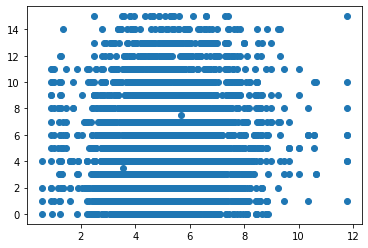

In [1557]:
plt.plot('RUN', 'RUN_TARGET', data=RUN, linestyle='none', marker='o')

In [1558]:
RUN.loc[(RUN['wOBA']<=0.15), 'wOBA'] = 0.1
RUN.loc[(RUN['wOBA']>0.15)&(RUN['wOBA']<=0.2), 'wOBA'] = 0.15
RUN.loc[(RUN['wOBA']>0.2)&(RUN['wOBA']<=0.25), 'wOBA'] = 0.2
RUN.loc[(RUN['wOBA']>0.25)&(RUN['wOBA']<=0.3), 'wOBA'] = 0.25
RUN.loc[RUN['wOBA']>0.3, 'wOBA'] = 0.3

In [1559]:
RUN.loc[RUN['ERA']<=3, 'ERA'] = 2
RUN.loc[(RUN['ERA']>3)&(RUN['ERA']<=4), 'ERA'] = 3
RUN.loc[(RUN['ERA']>4)&(RUN['ERA']<=5), 'ERA'] = 4
RUN.loc[(RUN['ERA']>5)&(RUN['ERA']<=6), 'ERA'] = 5
RUN.loc[(RUN['ERA']>6)&(RUN['ERA']<=7), 'ERA'] = 6
RUN.loc[(RUN['ERA']>7)&(RUN['ERA']<=8), 'ERA'] = 7

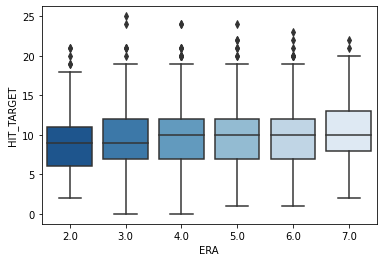

In [1560]:
sns.boxplot(x='ERA', y='HIT_TARGET', data=RUN, palette='Blues_r')

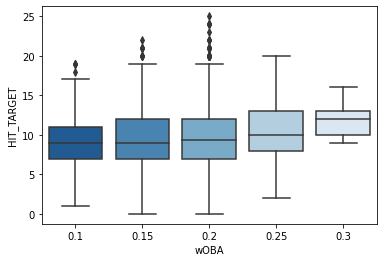

In [1565]:
sns.boxplot(x='wOBA', y='HIT_TARGET', data=RUN, palette='Blues_r')